In [307]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# display all the columns in the dataset in the output
pd.set_option('display.max_columns', 57)

df = pd.read_csv("Obfuscated-MalMem2022.csv")
df.head()

Category  pslist.nproc  pslist.nppid  pslist.avg_threads  \
0   Benign            45            17           10.555556   
1   Benign            47            19           11.531915   
2   Benign            40            14           14.725000   
3   Benign            32            13           13.500000   
4   Benign            42            16           11.452381   

   pslist.nprocs64bit  pslist.avg_handlers  dlllist.ndlls  \
0                   0           202.844444           1694   
1                   0           242.234043           2074   
2                   0           288.225000           1932   
3                   0           264.281250           1445   
4                   0           281.333333           2067   

   dlllist.avg_dlls_per_proc  handles.nhandles  handles.avg_handles_per_proc  \
0                  38.500000              9129                    212.302326   
1                  44.127660             11385                    242.234043   
2                  48.300000             11529                    288.225000   
3                  45.156250              8457                    264.281250   
4                  49.214286             11816                    281.333333   

   handles.nport  handles.nfile  handles.nevent  handles.ndesktop  \
0              0            670            3161                46   
1              0            840            3761                51   
2              0           1050            3996                45   
3              0            630            2961                36   
4              0            908            3834                45   

   handles.nkey  handles.nthread  handles.ndirectory  handles.nsemaphore  \
0           716              887                 104                 671   
1          1011             1030                 117                 766   
2           784             1241                 100                 645   
3           654              792                  83                 567   
4          1252              942                 103                 825   

   handles.ntimer  handles.nsection  handles.nmutant  ldrmodules.not_in_load  \
0             125               184              257                      53   
1             148               337              394                      77   
2             138               369              338                      51   
3             127               186              242                      31   
4             135               375              429                     102   

   ldrmodules.not_in_init  ldrmodules.not_in_mem  ldrmodules.not_in_load_avg  \
0                      95                     53                    0.030372   
1                     123                     77                    0.036167   
2                      89                     51                    0.026114   
3                      62                     31                    0.021483   
4                     143                    102                    0.047820   

   ldrmodules.not_in_init_avg  ldrmodules.not_in_mem_avg  malfind.ninjections  \
0                    0.054441                   0.030372                    5   
1                    0.057774                   0.036167                   12   
2                    0.045571                   0.026114                    5   
3                    0.042966                   0.021483                    2   
4                    0.067042                   0.047820                   12   

   malfind.commitCharge  malfind.protection  malfind.uniqueInjections  \
0                    21                  30                  1.250000   
1                    77                  72                  1.714286   
2                     6                  30                  1.250000   
3                     2                  12                  1.000000   
4                    77                  72                  2.000000   

   psxview.not_in_psl

# Part 1 - Data Wrangling

In this section, I will assess the quality and tidiness of the data. I will also clean the data.

### Assess Data

In [308]:
# Check for missing values
df.isnull().sum()

Category                                  0
pslist.nproc                              0
pslist.nppid                              0
pslist.avg_threads                        0
pslist.nprocs64bit                        0
pslist.avg_handlers                       0
dlllist.ndlls                             0
dlllist.avg_dlls_per_proc                 0
handles.nhandles                          0
handles.avg_handles_per_proc              0
handles.nport                             0
handles.nfile                             0
handles.nevent                            0
handles.ndesktop                          0
handles.nkey                              0
handles.nthread                           0
handles.ndirectory                        0
handles.nsemaphore                        0
handles.ntimer                            0
handles.nsection                          0
handles.nmutant                           0
ldrmodules.not_in_load                    0
ldrmodules.not_in_init          

There are no missing values in the data.

In [309]:
# check the data type of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58596 entries, 0 to 58595
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Category                                58596 non-null  object 
 1   pslist.nproc                            58596 non-null  int64  
 2   pslist.nppid                            58596 non-null  int64  
 3   pslist.avg_threads                      58596 non-null  float64
 4   pslist.nprocs64bit                      58596 non-null  int64  
 5   pslist.avg_handlers                     58596 non-null  float64
 6   dlllist.ndlls                           58596 non-null  int64  
 7   dlllist.avg_dlls_per_proc               58596 non-null  float64
 8   handles.nhandles                        58596 non-null  int64  
 9   handles.avg_handles_per_proc            58596 non-null  float64
 10  handles.nport                           58596 non-null  in

In [310]:
# check for duplicates duplicates
df.duplicated().sum()

534

In [311]:
# preview dataset
df.sample(10)

Category  pslist.nproc  \
29494  Ransomware-Ako-0a62d31ae0a427c21a98e63a02d3054...            39   
47968  Trojan-Reconyc-3bb90b3c415741956e87cb874294d1c...            39   
24393                                             Benign            41   
47343  Trojan-Emotet-2c678a0d56e69a42b8aa0915a69b1356...            37   
21076                                             Benign            39   
41908  Spyware-TIBS-4754c35288a9488036c211c68f36f8649...            41   
39373  Spyware-CWS-0e4d1a3efcd58fefb23268c4835e57a05c...            40   
5333                                              Benign            43   
32354  Ransomware-Maze-432dd08b8c8a695fc45398d408261e...            29   
23893                                             Benign            40   

       pslist.nppid  pslist.avg_threads  pslist.nprocs64bit  \
29494            15            9.923077                   0   
47968            15           10.717949                   0   
24393            12           12.880693                   0   
47343            14            9.918919                   0   
21076            12           13.049393                   0   
41908            15           10.121951                   0   
39373            16            9.900000                   0   
5333             12           12.840386                   0   
32354            10           12.482759                   0   
23893            13           12.961253                   0   

       pslist.avg_handlers  dlllist.ndlls  dlllist.avg_dlls_per_proc  \
29494           210.717949           1528                  39.179487   
47968           217.333333           1552                  39.794872   
24393           294.016987           2028                  49.485690   
47343           194.783784           1366                  36.918919   
21076           293.502833           1941                  49.769231   
41908           211.682927           1589                  38.756098   
39373           208.800000           1557                  38.925000   
5333            293.370916           2121                  49.325581   
32354           254.931035           1308                  45.103448   
23893           293.454379           2021                  50.529379   

       handles.nhandles  handles.avg_handles_per_proc  handles.nport  \
29494              8218                    210.717949              0   
47968              8476                    217.333333              0   
24393             12054                    294.016987              0   
47343              7207                    194.783784              0   
21076             11446                    293.502833              0   
41908              8680                    217.000000              0   
39373              8352                    208.800000              0   
5333              12614                    293.370916              0   
32354              7393                    254.931035              0   
23893             11738                    293.454379              0   

       handles.nfile  handles.nevent  handles.ndesktop  handles.nkey  \
29494            644            2886                42           659   
47968            640            2968                42           656   
24393           1127            4333                45           804   
47343            601            2493                39           592   
21076           1032            4058                43           801   
41908            854            2904                43           736   
39373            642            2926                43           665   
5333            1122            4700                47           794   
32354            545            2599                32           560   
23893           1044            4099                44           843   

       handles.nthread  handles.ndirectory  handles.nsemaphore  \
29494              689                 100                 598   
47968              778      

In [312]:
# check the Category variable
df.Category.unique()

array(['Benign',
       'Ransomware-Ako-00a2c6bab1e53f679cdd4fdc772cd291928c109b9b747652639a1700d844f719-1.raw',
       'Ransomware-Ako-00a2c6bab1e53f679cdd4fdc772cd291928c109b9b747652639a1700d844f719-10.raw',
       ...,
       'Ransomware-Shade-faddeea111a25da4d0888f3044ae9555f0c55517f6226b30e521008fceda6bbf-7.raw',
       'Ransomware-Shade-f866c086af2e1d8ebaa6f2c8631578896768285120b57ddd43453bdebb217ab1-10.raw',
       'Ransomware-Shade-955d9af38346c1755527bd196668edfad6d3f001d217b04d2380eb99e0760585-8.raw'],
      dtype=object)

In [313]:
# check the Category variable
df.Category.unique().shape

(28346,)

In [314]:
# check the Class variable
df.Class.unique()

array(['Benign', 'Malware'], dtype=object)

In [315]:
# check the numeric columns
df.describe()

pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.nprocs64bit  \
count  58596.000000  58596.000000        58596.000000             58596.0   
mean      41.394771     14.713837           11.341655                 0.0   
std        5.777249      2.656748            1.588231                 0.0   
min       21.000000      8.000000            1.650000                 0.0   
25%       40.000000     12.000000            9.972973                 0.0   
50%       41.000000     15.000000           11.000000                 0.0   
75%       43.000000     16.000000           12.861955                 0.0   
max      240.000000     72.000000           16.818182                 0.0   

       pslist.avg_handlers  dlllist.ndlls  dlllist.avg_dlls_per_proc  \
count         58596.000000   58596.000000               58596.000000   
mean            247.509819    1810.805447                  43.707806   
std             111.857790     329.782639                   5.742023   
min              34.962500     670.000000                   7.333333   
25%             208.725000    1556.000000                  38.833333   
50%             243.963710    1735.000000                  42.781524   
75%             289.974322    2087.000000                  49.605280   
max           24845.951220    3443.000000                  53.170732   

       handles.nhandles  handles.avg_handles_per_proc  handles.nport  \
count      5.859600e+04                  58596.000000        58596.0   
mean       1.025858e+04                    249.560958            0.0   
std        4.866864e+03                    145.999866            0.0   
min        3.514000e+03                     71.139241            0.0   
25%        8.393000e+03                    209.648228            0.0   
50%        9.287500e+03                    247.208951            0.0   
75%        1.219300e+04                    291.355050            0.0   
max        1.047310e+06                  33784.193550            0.0   

       handles.nfile  handles.nevent  handles.ndesktop  handles.nkey  \
count   58596.000000    58596.000000      58596.000000  58596.000000   
mean      899.119513     3572.409960         44.529166    774.280668   
std      3432.351200      805.460522          5.161254    150.407075   
min       266.000000      966.000000         22.000000    284.000000   
25%       646.000000     2923.000000         43.000000    675.000000   
50%       839.000000     3151.000000         45.000000    753.000000   
75%      1080.000000     4321.000000         46.000000    859.000000   
max    807008.000000     7892.000000        159.000000   2668.000000   

       handles.nthread  handles.ndirectory  handles.nsemaphore  \
count     58596.000000        58596.000000        58596.000000   
mean        928.510086          102.398338          683.339324   
std         237.817566            9.782695           94.531078   
min         388.000000           57.000000          296.000000   
25%         708.000000           99.000000          614.000000   
50%         848.000000          103.000000          684.000000   
75%        1169.000000          107.000000          750.000000   
max        5637.000000          498.000000         4268.000000   

       handles.ntimer  handles.nsection  handles.nmutant  \
count    58596.000000      58596.000000     58596.000000   
mean       130.327855        290.127466       312.588829   
std         14.965266        144.278832        73.173189   
min         69.000000         50.000000       118.000000   
25%        120.000000        177.000000       258.000000   
50%        131.000000        224.000000       289.000000   
75%        142.000000        415.000000       366.000000   
max        382.000000      14687.000000       583.000000   

       ldrmodules.not_in_load  ldrmodules.not_in_init  ldrmodules.not_in_mem  \
count            58596.000000            58596.000000           58596.000000   
mean                60.830347               99.946413              60.

In [316]:
# Check the 'pslist.nprocs64bit' variable
df['pslist.nprocs64bit'].unique()

array([0], dtype=int64)

In [317]:
# Check the svcscan.interactive_process_services variable
df['svcscan.interactive_process_services'].unique()

array([0], dtype=int64)

In [318]:
# check the handles.nport variable
df['handles.nport'].unique()

array([0], dtype=int64)

In [319]:
# check the svcscan.interactive_process_services variable
df['svcscan.interactive_process_services'].unique()

array([0], dtype=int64)

## Assessing
1. There are no missing values.
2. There are 534 duplicate records in the dataset.
3. The `Class` and `Category` variables are of the `object` data type.
4. Some values in the `Category` variable have strange characters like `-00a2c6bab1e53f679cdd4fdc772cd291928c109b9b747652639a1700d844f719-1.raw`.
5. Structural issue in the Category variable. Both category of attack and type included in the same column. For example `Spyware-Gator` and `Ransomware-Ako`
6. All the values in the `pslist.nprocs64bit`, `svcscan.interactive_process_services`, `handles.nport`, `svcscan.interactive_process_services` variables are zeros.
7. Possible outliers in the `pslist.nppid`, `pslist.avg_handlers`, `handles.avg_handles_per_proc`, `handles.nfile`, `handles.ndesktop`, `handles.nkey`, `handles.nthread`, `handles.nsemaphore`, `handles.nsection`, `malfind.ninjections`,	`malfind.commitCharge`,	`malfind.protection`, `malfind.uniqueInjections`, `psxview.not_in_pslist`, `psxview.not_in_ethread_pool`, `psxview.not_in_pspcid_list`, `psxview.not_in_csrss_handles`, `psxview.not_in_session`, `psxview.not_in_deskthrd`



## Cleaning
1. Remove duplicate records.
2. Remove strange characters in the `Category` variable.
3. Fix structural issue in the `Categorical` column. Create a new column called `type`.
4. Convert the `Class` and `Category` to `categorical` data type.
5. Remove the `pslist.nprocs64bit`, `svcscan.interactive_process_services`, `handles.nport`, `svcscan.interactive_process_services` variables.

### Data Cleaning

__Remove duplicate records__

In [320]:
print("Shape of dataset before dropping duplicates", df.shape)
df.drop_duplicates(inplace=True)
print("Shape of dataset after dropping duplicates", df.shape)

Shape of dataset before dropping duplicates (58596, 57)
Shape of dataset after dropping duplicates (58062, 57)


__Remove strange characters from the Category column__

In [321]:
df.Category.unique().shape

(28346,)

There are 28346 unique values in the `Category` column. Let's fix this.

In [322]:
df.Category.sample(10)

35772    Spyware-180solutions-0ac65ef522fce501a7328c546...
44542    Spyware-Transponder-0e935fed1f79f7db015cbd9a33...
47348    Trojan-Emotet-2c6bcb4afe3701160c2116a2428b44a6...
50963    Trojan-Scar-03640062ca1c74ece6ad672c157fbad0-7...
33373    Ransomware-Maze-9f1e4a67e8192a576fb5f2049ca0af...
13167                                               Benign
9263                                                Benign
40143    Spyware-Gator-0fa2c16047771ef7cc0e98da3fc260dc...
14896                                               Benign
966                                                 Benign
Name: Category, dtype: object

In [323]:
df['category_new'] = df.Category.apply(lambda x: x.split('-')[0])
df['category_new'].sample(10)

14357        Benign
53247        Trojan
51814        Trojan
14484        Benign
39589       Spyware
33411    Ransomware
1374         Benign
52831        Trojan
48405        Trojan
5544         Benign
Name: category_new, dtype: object

__Create a new column for `type` of attack__

In [324]:
def attack_type(value):
    '''Function to get the different attack type'''
    if value == 'Benign':
        output = 'None'
    else:
        output = value.split('-')[1]
    return output

df['type'] = df.Category.apply(attack_type)
df['type'].sample(10)

29990      Conti
47701    Reconyc
31818       Maze
5425        None
27314       None
30077      Conti
16209       None
34569       Pysa
30586      Conti
42459       TIBS
Name: type, dtype: object

In [325]:
# check the unique values in the type column
print(df['type'].unique())
# check the unique categories in the new column
print(df['category_new'].unique())
df.head()

['None' 'Ako' 'Conti' 'Maze' 'Pysa' 'Shade' '180solutions' 'CWS' 'Gator'
 'TIBS' 'Transponder' 'Emotet' 'Reconyc' 'Refroso' 'Scar' 'Zeus']
['Benign' 'Ransomware' 'Spyware' 'Trojan']


Category  pslist.nproc  pslist.nppid  pslist.avg_threads  \
0   Benign            45            17           10.555556   
1   Benign            47            19           11.531915   
2   Benign            40            14           14.725000   
3   Benign            32            13           13.500000   
4   Benign            42            16           11.452381   

   pslist.nprocs64bit  pslist.avg_handlers  dlllist.ndlls  \
0                   0           202.844444           1694   
1                   0           242.234043           2074   
2                   0           288.225000           1932   
3                   0           264.281250           1445   
4                   0           281.333333           2067   

   dlllist.avg_dlls_per_proc  handles.nhandles  handles.avg_handles_per_proc  \
0                  38.500000              9129                    212.302326   
1                  44.127660             11385                    242.234043   
2                  48.300000             11529                    288.225000   
3                  45.156250              8457                    264.281250   
4                  49.214286             11816                    281.333333   

   handles.nport  handles.nfile  handles.nevent  handles.ndesktop  \
0              0            670            3161                46   
1              0            840            3761                51   
2              0           1050            3996                45   
3              0            630            2961                36   
4              0            908            3834                45   

   handles.nkey  handles.nthread  handles.ndirectory  handles.nsemaphore  \
0           716              887                 104                 671   
1          1011             1030                 117                 766   
2           784             1241                 100                 645   
3           654              792                  83                 567   
4          1252              942                 103                 825   

   handles.ntimer  handles.nsection  handles.nmutant  ldrmodules.not_in_load  \
0             125               184              257                      53   
1             148               337              394                      77   
2             138               369              338                      51   
3             127               186              242                      31   
4             135               375              429                     102   

   ldrmodules.not_in_init  ldrmodules.not_in_mem  ldrmodules.not_in_load_avg  \
0                      95                     53                    0.030372   
1                     123                     77                    0.036167   
2                      89                     51                    0.026114   
3                      62                     31                    0.021483   
4                     143                    102                    0.047820   

   ldrmodules.not_in_init_avg  ldrmodules.not_in_mem_avg  malfind.ninjections  \
0                    0.054441                   0.030372                    5   
1                    0.057774                   0.036167                   12   
2                    0.045571                   0.026114                    5   
3                    0.042966                   0.021483                    2   
4                    0.067042                   0.047820                   12   

   ...  psxview.not_in_pslist  psxview.not_in_eprocess_pool  \
0  ...                      2                             0   
1  ...                      0                             0   
2  ...                      0                             0   
3  ...                      0                             0   
4  ...                      4                             0   

   psxview.not_in_ethread_pool  psxview.not_in_pspcid_list  \
0                  

__Convert the Class and Category to `categorical` data type.__

In [326]:
# df.Class = df.Class.astype('category')
# df.category_new = df.category_new.astype('category')
# df.type = df.type.astype('category')

# # test
# print(df.Class.dtype)
# print(df.category_new.dtype)
# print(df.type.dtype)

__Remove the *pslist.nprocs64bit, svcscan.interactive_process_services, handles.nport, svcscan.interactive_process_services* variables.__

In [327]:
df.drop(columns=['pslist.nprocs64bit', 'svcscan.interactive_process_services',
                 'handles.nport', 'svcscan.interactive_process_services', 'Category'],
        inplace=True)

# test
print('Category' in df.columns)
print('handles.nport' in df.columns)

False
False


In [328]:
df.head()

pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.avg_handlers  \
0            45            17           10.555556           202.844444   
1            47            19           11.531915           242.234043   
2            40            14           14.725000           288.225000   
3            32            13           13.500000           264.281250   
4            42            16           11.452381           281.333333   

   dlllist.ndlls  dlllist.avg_dlls_per_proc  handles.nhandles  \
0           1694                  38.500000              9129   
1           2074                  44.127660             11385   
2           1932                  48.300000             11529   
3           1445                  45.156250              8457   
4           2067                  49.214286             11816   

   handles.avg_handles_per_proc  handles.nfile  handles.nevent  \
0                    212.302326            670            3161   
1                    242.234043            840            3761   
2                    288.225000           1050            3996   
3                    264.281250            630            2961   
4                    281.333333            908            3834   

   handles.ndesktop  handles.nkey  handles.nthread  handles.ndirectory  \
0                46           716              887                 104   
1                51          1011             1030                 117   
2                45           784             1241                 100   
3                36           654              792                  83   
4                45          1252              942                 103   

   handles.nsemaphore  handles.ntimer  handles.nsection  handles.nmutant  \
0                 671             125               184              257   
1                 766             148               337              394   
2                 645             138               369              338   
3                 567             127               186              242   
4                 825             135               375              429   

   ldrmodules.not_in_load  ldrmodules.not_in_init  ldrmodules.not_in_mem  \
0                      53                      95                     53   
1                      77                     123                     77   
2                      51                      89                     51   
3                      31                      62                     31   
4                     102                     143                    102   

   ldrmodules.not_in_load_avg  ldrmodules.not_in_init_avg  \
0                    0.030372                    0.054441   
1                    0.036167                    0.057774   
2                    0.026114                    0.045571   
3                    0.021483                    0.042966   
4                    0.047820                    0.067042   

   ldrmodules.not_in_mem_avg  malfind.ninjections  malfind.commitCharge  \
0                   0.030372                    5                    21   
1                   0.036167                   12                    77   
2                   0.026114                    5                     6   
3                   0.021483                    2                     2   
4                   0.047820                   12                    77   

   malfind.protection  malfind.uniqueInjections  psxview.not_in_pslist  \
0                  30                  1.250000                      2   
1                  72                  1.714286                      0   
2                  30                  1.250000                      0   
3                  12                  1.000000                      0   
4                  72                  2.000000                      4   

   psxview.not_in_eprocess_pool  psxview.not_in_ethread_pool  \
0                             0                            3   
1                   

In [329]:
# save cleaned dataset to a file
df.to_csv('Cleaned_Obfuscated-MalMem2022.csv')

# Part 2 - Descriptive Analysis

__Summary Statistics__

In [330]:
df.describe()

pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.avg_handlers  \
count  58062.000000  58062.000000        58062.000000         58062.000000   
mean      41.407547     14.709552           11.350512           247.802426   
std        5.777920      2.661196            1.587684           112.285446   
min       21.000000      8.000000            1.650000            34.962500   
25%       40.000000     12.000000            9.973684           208.775000   
50%       41.000000     15.000000           11.022727           244.783765   
75%       43.000000     16.000000           12.867817           290.087324   
max      240.000000     72.000000           16.818182         24845.951220   

       dlllist.ndlls  dlllist.avg_dlls_per_proc  handles.nhandles  \
count   58062.000000               58062.000000      5.806200e+04   
mean     1812.960439                  43.745115      1.027415e+04   
std       329.856293                   5.738297      4.884605e+03   
min       670.000000                   7.333333      3.514000e+03   
25%      1556.000000                  38.850000      8.402000e+03   
50%      1739.000000                  42.977048      9.439500e+03   
75%      2088.000000                  49.625000      1.219600e+04   
max      3443.000000                  53.170732      1.047310e+06   

       handles.avg_handles_per_proc  handles.nfile  handles.nevent  \
count                  58062.000000   58062.000000    58062.000000   
mean                     249.853387     901.060625     3577.857669   
std                      146.609930    3448.012733      805.490759   
min                       71.139241     266.000000      966.000000   
25%                      209.745640     646.000000     2923.000000   
50%                      248.307436     840.000000     3176.000000   
75%                      291.438689    1081.000000     4328.000000   
max                    33784.193550  807008.000000     7892.000000   

       handles.ndesktop  handles.nkey  handles.nthread  handles.ndirectory  \
count      58062.000000  58062.000000     58062.000000        58062.000000   
mean          44.549309    775.187661       930.107902          102.433140   
std            5.163729    150.528890       237.881254            9.783108   
min           22.000000    284.000000       388.000000           57.000000   
25%           43.000000    675.000000       709.000000           99.000000   
50%           45.000000    760.000000       852.000000          103.000000   
75%           46.000000    860.000000      1170.000000          107.000000   
max          159.000000   2668.000000      5637.000000          498.000000   

       handles.nsemaphore  handles.ntimer  handles.nsection  handles.nmutant  \
count        58062.000000    58062.000000      58062.000000     58062.000000   
mean           683.968275      130.423409        291.019221       313.088991   
std             94.434616       14.956545        144.427593        73.200894   
min            296.000000       69.000000         50.000000       118.000000   
25%            614.000000      120.000000        177.000000       259.000000   
50%            690.000000      131.000000        231.000000       293.000000   
75%            750.000000      142.000000        415.000000       367.000000   
max           4268.000000      382.000000      14687.000000       583.000000   

       ldrmodules.not_in_load  ldrmodules.not_in_init  ldrmodules.not_in_mem  \
count            58062.000000            58062.000000           58062.000000   
mean                60.941373              100.067996              60.943646   
std                 18.780382               21.460897              18.778881   
min                  6.000000               16.000000               6.000000   
25%                 46.000000               85.000000              46.000000   
50%                 57.000000               97.000000              57.000000   
75%                 75.000000              116.000000              

__What is the Proportion of the `Class` Variable?__

Benign     29231
Malware    28831
Name: Class, dtype: int64


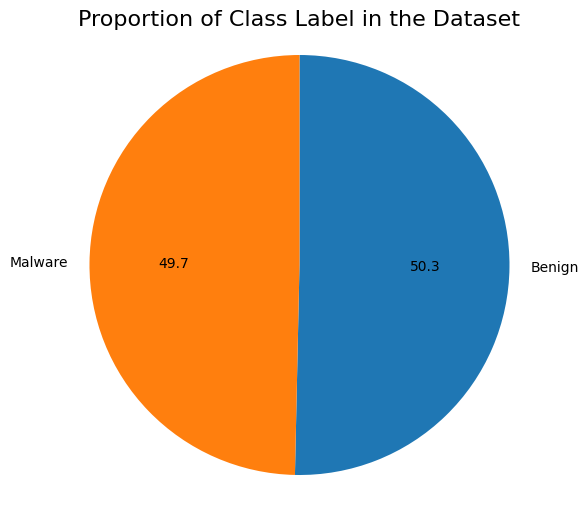

In [331]:
plt.figure(figsize=[8,6])
sorted_counts = df.Class.value_counts()
print(sorted_counts)
plt.pie(sorted_counts, labels=sorted_counts.index,
        startangle=90, counterclock=False, autopct='%.1f')
plt.axis('square')
plt.title('Proportion of Class Label in the Dataset', fontsize=16);

49.7% of the data in the dataset are records of `malware` attacks. While 50.3% of the data are `benign` connections. The classes in the dataset are balanced.

__What is the proportion of the `category_new` variable?__

In [332]:
# set base color for visualization
base_color = sns.color_palette()[0]

Benign        29231
Spyware        9815
Ransomware     9529
Trojan         9487
Name: category_new, dtype: int64

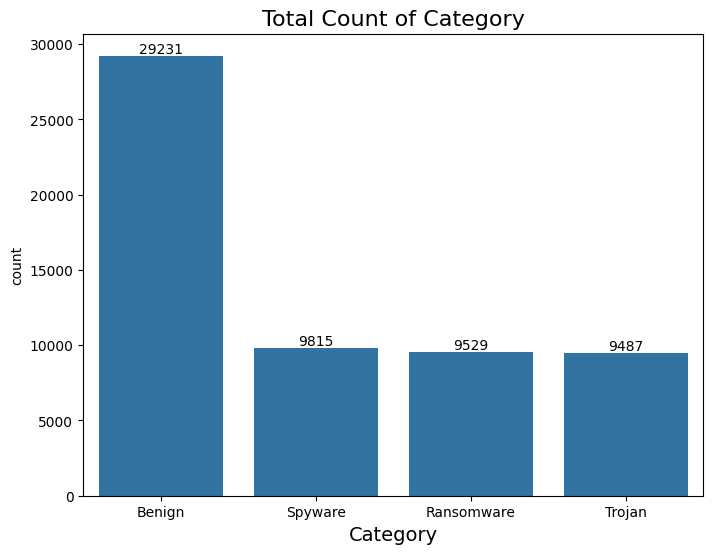

In [333]:
category_count = df.category_new.value_counts()
display(category_count)

plt.figure(figsize=[8,6])
order = category_count.index

def plot_bar(df, x, color, order, title, xlabel, text_height, category_count):
    '''Customized function to plot a bar chart.
    
    Parameters
    -----------
    df: Pandas DataFrame. DataFrame with data of interest
    x: str. Variable to be plotted
    order: list. List containing the values in the order they should be plotted.
    title: str. Title of the plot.
    xlabel: str. Label for the x-axis.
    text_height: int. Number to adjust the text on each bar in the plot.  
    category_count: Pandas Series. Series containing the count of each 
                    unique value in the variable x.
    '''
    sns.countplot(data=df, x=x, color=color, order=order)
    plt.xlabel(xlabel, fontsize=14)
    plt.title(title, fontsize=16)
    for i in range(len(category_count)):
        count = category_count.values[i]
        plt.text(i, count+text_height, count, ha='center', va='top');

# invoke function
plot_bar(df=df, x='category_new', color=base_color, 
         category_count=category_count, order=order, 
         title='Total Count of Category',
         xlabel='Category', text_height=900)

There are __29,231__ records of benign connections, __9,815__ records of spyware attacks, __9529__ records of ransomware attacks and __9487__ records of trojan attacks.      

__What are the different types of ransomware attacks in the dataset?__

Shade    2128
Ako      2000
Conti    1988
Maze     1754
Pysa     1659
Name: type, dtype: int64

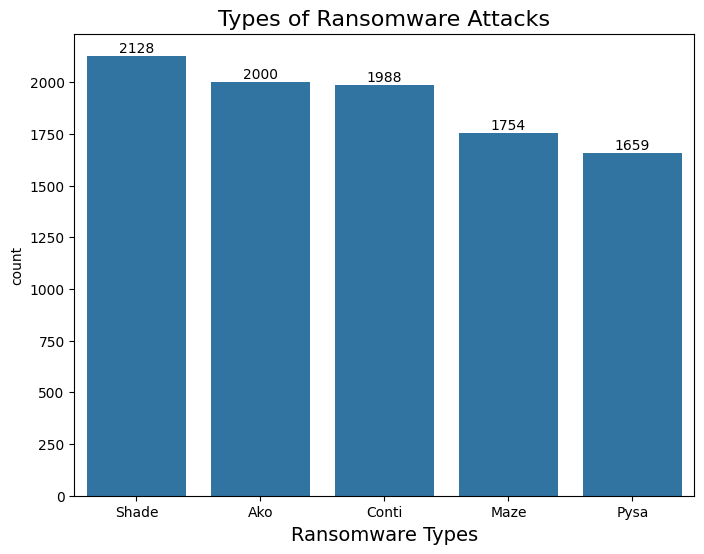

In [334]:
ransom_df = df.query('category_new == "Ransomware"').copy()

category_count = ransom_df.type.value_counts()
display(category_count)

plt.figure(figsize=[8,6])
order = category_count.index
   
plot_bar(df=ransom_df, x='type', color=base_color,
         category_count=category_count,
         order=order, title='Types of Ransomware Attacks',
         xlabel='Ransomware Types', text_height=70)

There are five types of ransomware attack in the dataset: `shade`, `ako`, `conti`, `maze`, `pysa`. 

There are 2128 shade ransomware attacks, 2000 ako ransomware attacks, 1988 conti ransomware attacks, 1754 maze ransomware attacks and 1659 pysa ransomware attacks.

__What are the different types of spyware attacks in the dataset?__

Transponder     2410
180solutions    2000
CWS             2000
Gator           1995
TIBS            1410
Name: type, dtype: int64

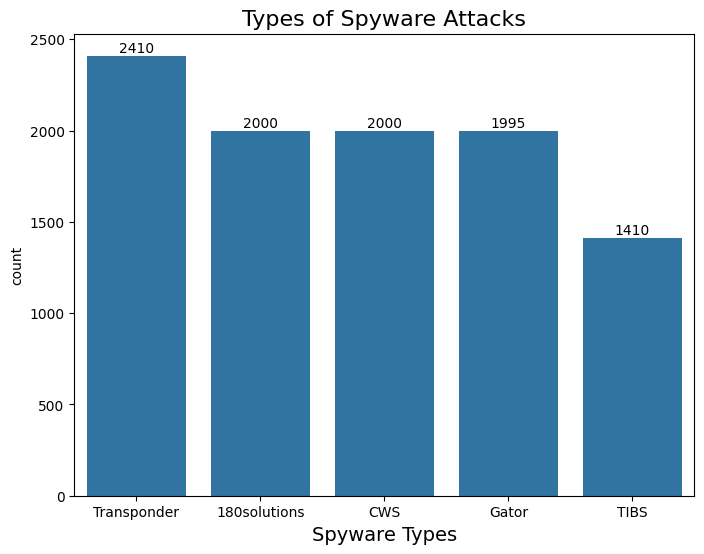

In [335]:
spy_df = df.query('category_new == "Spyware"').copy()

category_count = spy_df.type.value_counts()
display(category_count)

plt.figure(figsize=[8,6])
order = category_count.index
   
plot_bar(df=spy_df, x='type', color=base_color,
         category_count=category_count,
         order=order, title='Types of Spyware Attacks',
         xlabel='Spyware Types', text_height=80)

There are five types of spyware attack in the dataset: `Transponder`, `180solutions`, `CWS`, `Gator`, `TIBS`. 

There are __2410__ Transponder spyware attacks, __2000__ 180solutions spyware attacks, __2000__ CWS spyware attacks, __1995__ Gator spyware attacks and __1410__ TIBS spyware attacks.


__What are the different types of trojan attacks in the dataset?__

Refroso    2000
Scar       2000
Emotet     1967
Zeus       1950
Reconyc    1570
Name: type, dtype: int64

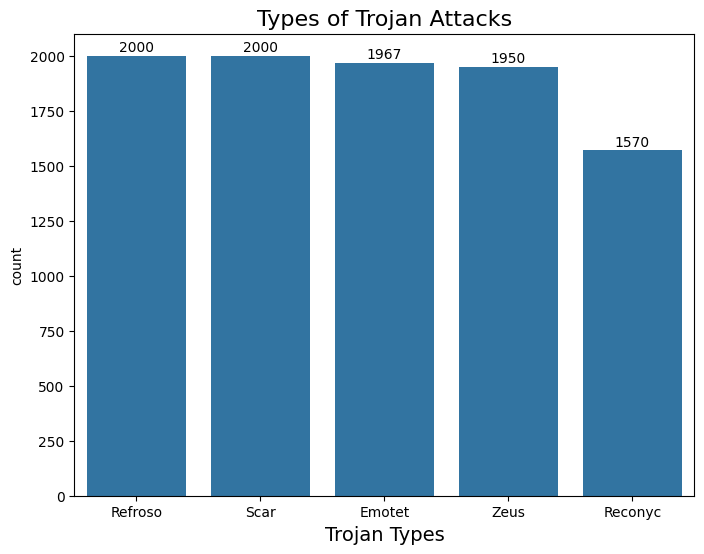

In [336]:
trojan_df = df.query('category_new == "Trojan"').copy()

category_count = trojan_df.type.value_counts()
display(category_count)

plt.figure(figsize=[8,6])
order = category_count.index
   
plot_bar(df=trojan_df, x='type', color=base_color,
         category_count=category_count,
         order=order, title='Types of Trojan Attacks',
         xlabel='Trojan Types', text_height=70)

There are five types of trojan attack in the dataset: `Refroso`, `Scar`, `Emotet`, `Zeus`, `Reconyc`. 

There are __2000__ Refroso trojan attacks, __2000__ Scar trojan attacks, __1967__ Emotet trojan attacks, __1950__ Zeus trojan attacks and __1570__ Reconyc trojan attacks.

## Histograms: Check Data Distribution of some Variables

__Distribution of the 'handles.nkey' variable__

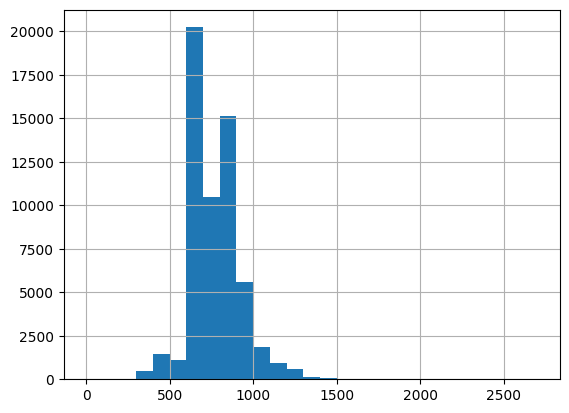

In [337]:
binsize = np.arange(0, df['handles.nkey'].max()+100, 100)
df['handles.nkey'].hist(bins=binsize);

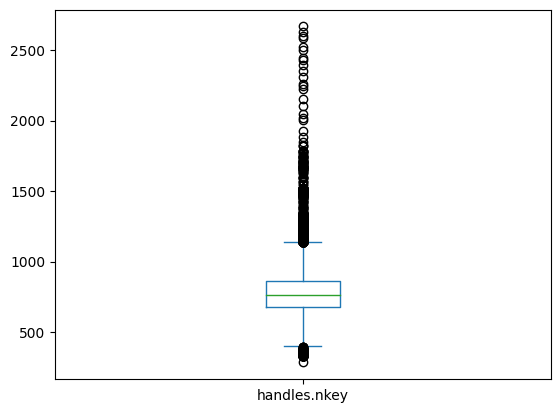

In [338]:
df['handles.nkey'].plot(kind='box');

__Distribution of the 'pslist.nproc' variable__

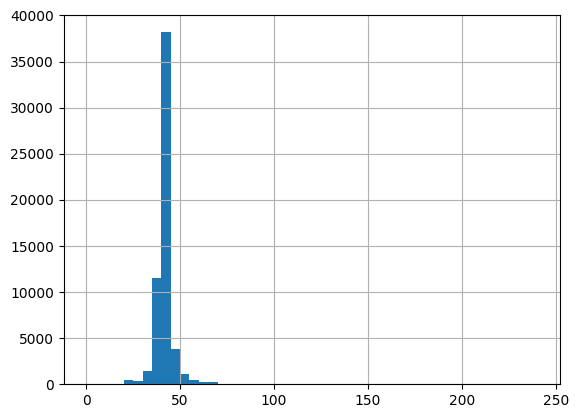

In [339]:
binsize = np.arange(0, df['pslist.nproc'].max()+5, 5)
df['pslist.nproc'].hist(bins=binsize);

__Distribution of the 'svcscan.shared_process_services' variable__

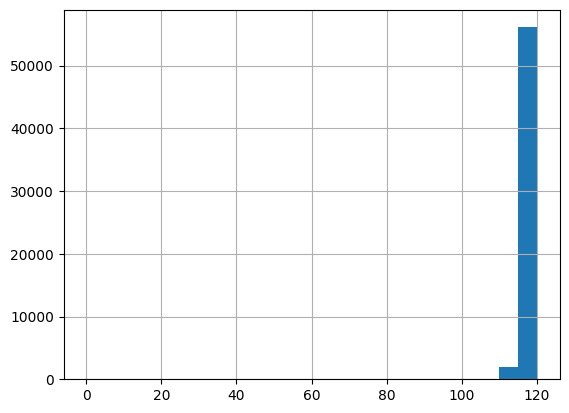

In [340]:
binsize = np.arange(0, df['svcscan.shared_process_services'].max()+5, 5)
df['svcscan.shared_process_services'].hist(bins=binsize);

The svcscan.shared_process_services is left skewed.

__Distribution of the 'svcscan.kernel_drivers' variable__

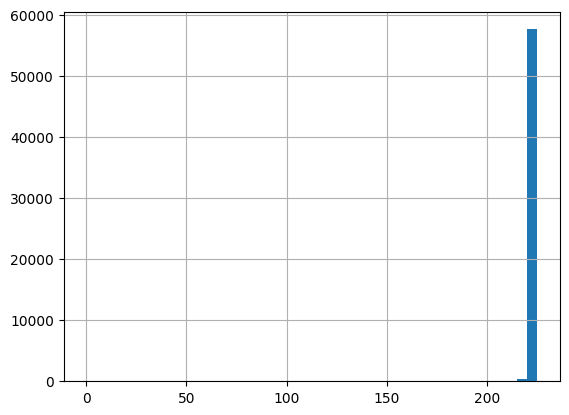

In [341]:
binsize = np.arange(0, df['svcscan.kernel_drivers'].max()+5, 5)
df['svcscan.kernel_drivers'].hist(bins=binsize);

The svcscan.kernel_drivers is left skewed.

__Distribution of the 'handles.nmutant' variable__

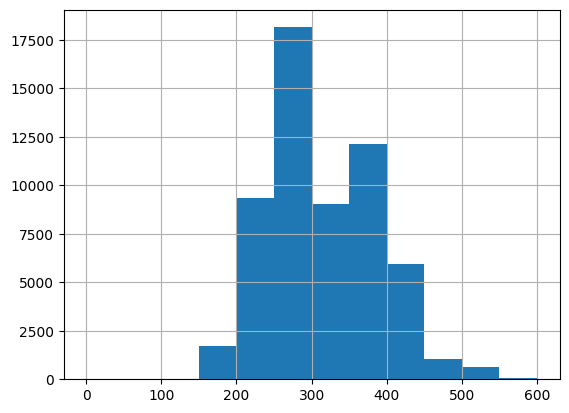

In [342]:
binsize = np.arange(0, df['handles.nmutant'].max()+50, 50)
df['handles.nmutant'].hist(bins=binsize);

Most of the values fall within 250-300

__Distribution of the 'handles.nevent' variable__

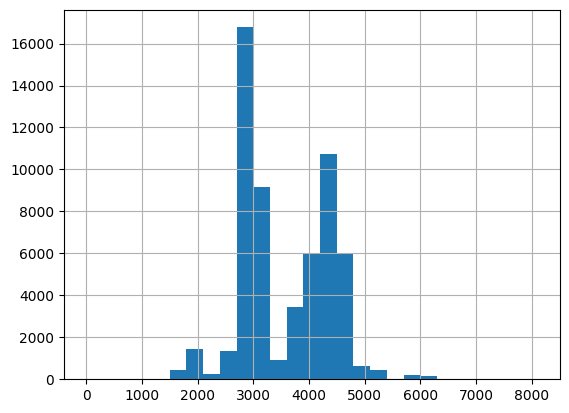

In [343]:
binsize = np.arange(0, df['handles.nevent'].max()+300, 300)
df['handles.nevent'].hist(bins=binsize);

__Distribution of the 'malfind.ninjections' variable__

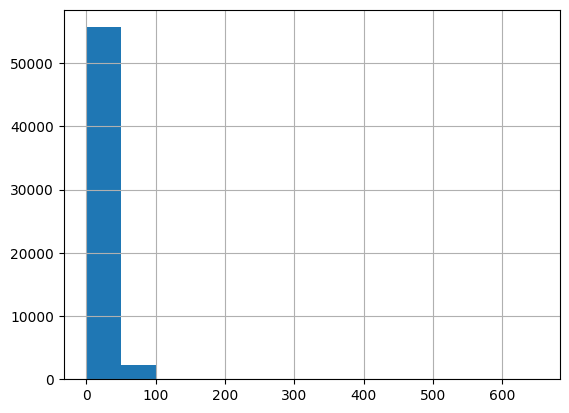

In [344]:
binsize = np.arange(0, df['malfind.ninjections'].max()+50, 50)
df['malfind.ninjections'].hist(bins=binsize);

The malfind.ninjections variable is right-skewed.

# Part 2 - Diagnostic Analysis

In this section, I will take a deep dive into the data to extract some insights from it.

## Why are some memory records malware attacks?

__Analysis of the svcscan.kernel_drivers variable__

In [345]:
def viobox(df, x, y, suptitle):
    '''
    df: DataFrame, Dataset
    x: str, categorical variable on the x-axis
    y: str, numeric variable on the y-axis
    suptitle: str, title of the plot
    color: str, color of the plot [default is base_color]
    '''
    base_color = sns.color_palette()[0]
    plt.figure(figsize=[20,5])
    plt.suptitle(suptitle, fontsize=15)
    plt.subplot(1,2,1)
    sns.boxplot(data=df, x=x, y=y, color=base_color);
    plt.subplot(1,2,2)
    sns.violinplot(data=df, x=x, y=y, color=base_color);

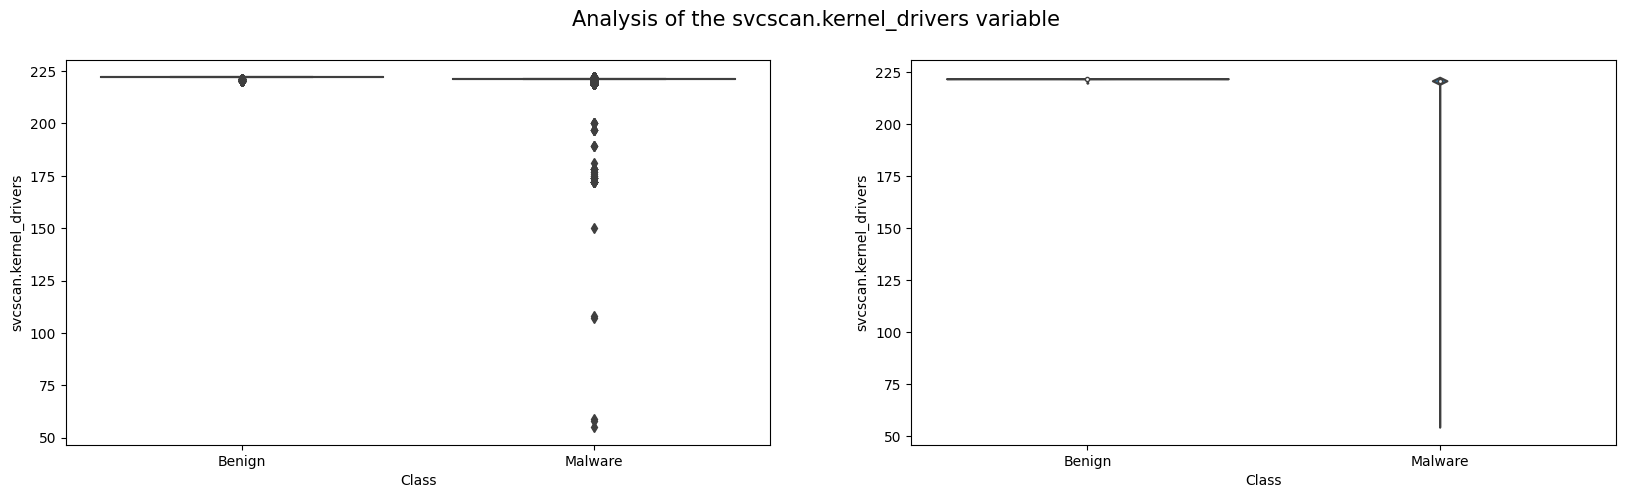

In [346]:
viobox(df=df, x='Class', y='svcscan.kernel_drivers',
       suptitle='Analysis of the svcscan.kernel_drivers variable')

The plot above on the left is a box plot, while the plot on the right is a violin plot.
The svcscan.kernel_drivers variable of malware attacks have values less than 200. If the value of the svcscan.kernel_drivers variable is below 200, there is a high chance that it is a malware attack.

In [347]:
# Separate benign and malware records into two separate dataframes
df_benign = df.query("Class=='Benign'")
df_malicious = df.query("Class=='Malware'")

In [348]:
df_benign['svcscan.kernel_drivers'].describe()

count    29231.000000
mean       221.990524
std          0.127124
min        220.000000
25%        222.000000
50%        222.000000
75%        222.000000
max        222.000000
Name: svcscan.kernel_drivers, dtype: float64

In [349]:
df_malicious['svcscan.kernel_drivers'].describe()

count    28831.000000
mean       220.821581
std          2.710280
min         55.000000
25%        221.000000
50%        221.000000
75%        221.000000
max        222.000000
Name: svcscan.kernel_drivers, dtype: float64

__Analysis of the svcscan.nservices variable__

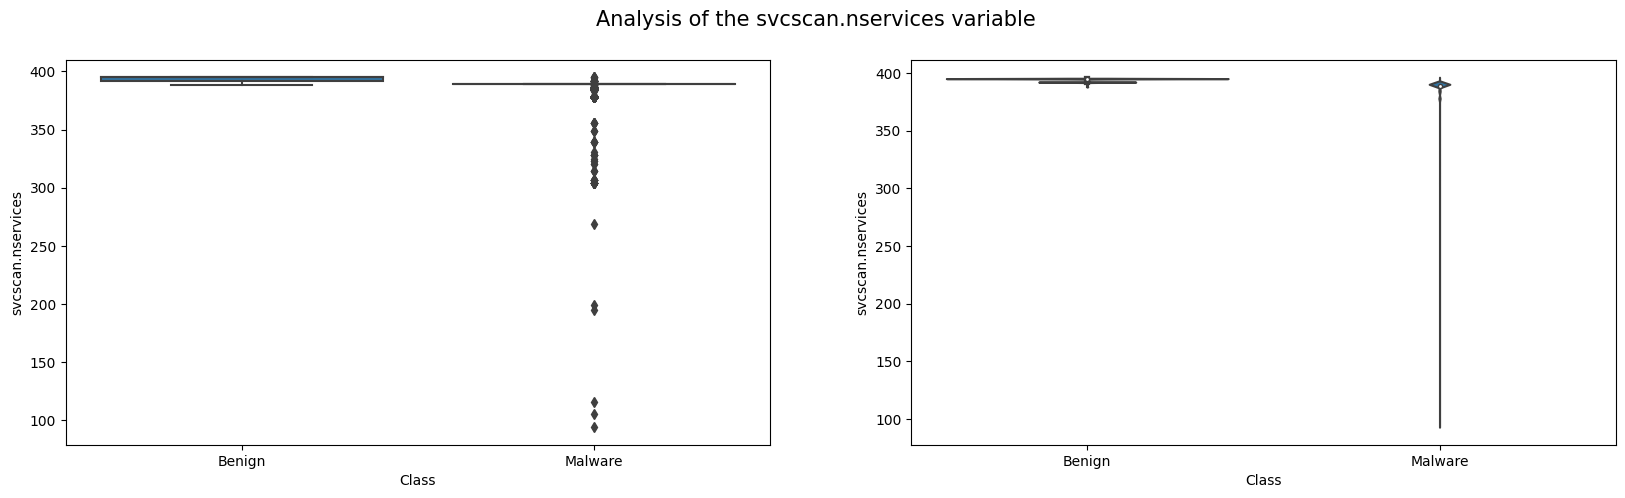

In [350]:
viobox(df=df, x='Class', y='svcscan.nservices',
       suptitle='Analysis of the svcscan.nservices variable')

The svcscan.nservices variable of malware attacks have values less than 350. If the value of the svcscan.nservices variable is below 350, there is a high chance that it is a malware attack.

In [351]:
df_benign['svcscan.nservices'].describe()

count    29231.000000
mean       394.205433
std          1.352629
min        388.000000
25%        392.000000
50%        395.000000
75%        395.000000
max        395.000000
Name: svcscan.nservices, dtype: float64

In [352]:
df_malicious['svcscan.nservices'].describe()

count    28831.000000
mean       388.489057
std          4.814831
min         94.000000
25%        389.000000
50%        389.000000
75%        389.000000
max        395.000000
Name: svcscan.nservices, dtype: float64

__Analysis of the svcscan.shared_process_services variable__

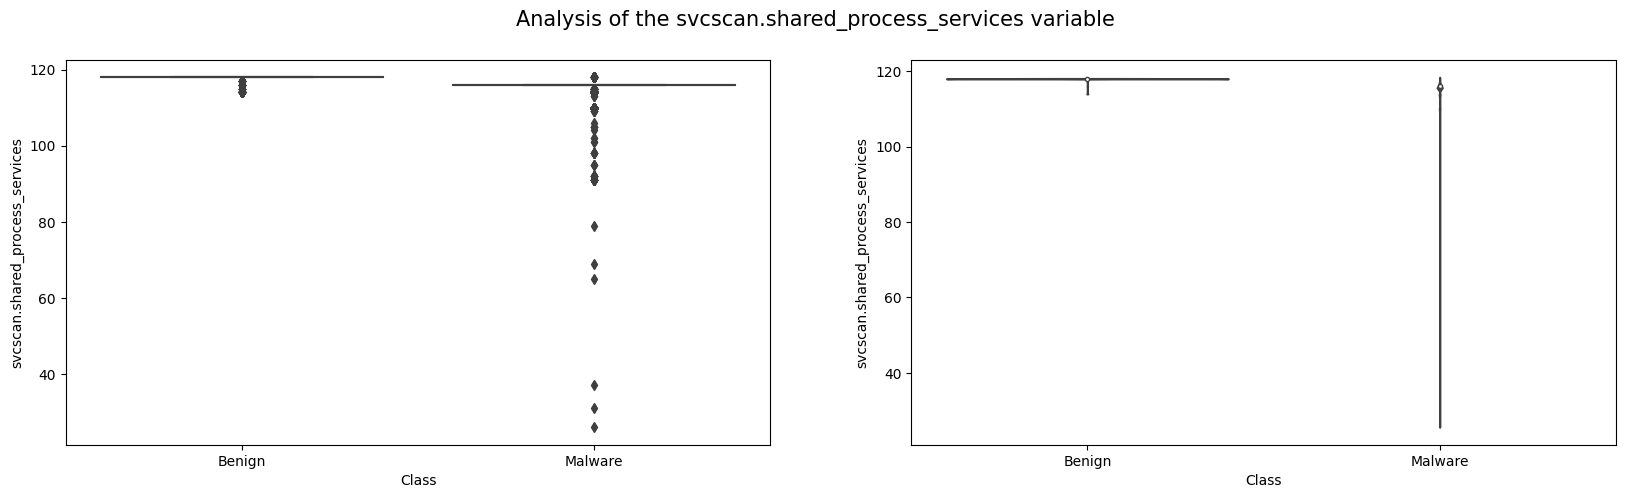

In [353]:
viobox(df=df, x='Class', y='svcscan.shared_process_services',
       suptitle='Analysis of the svcscan.shared_process_services variable')

The svcscan.shared_process_services variable of malware attacks have values less than 100. If the value of the svcscan.shared_process_services variable is below 100, there is a high chance that it is a malware attack.

In [354]:
df_benign['svcscan.shared_process_services'].describe()

count    29231.000000
mean       117.981766
std          0.251528
min        114.000000
25%        118.000000
50%        118.000000
75%        118.000000
max        118.000000
Name: svcscan.shared_process_services, dtype: float64

In [355]:
df_malicious['svcscan.shared_process_services'].describe()

count    28831.000000
mean       115.777947
std          1.528642
min         26.000000
25%        116.000000
50%        116.000000
75%        116.000000
max        118.000000
Name: svcscan.shared_process_services, dtype: float64

__Analysis of the handles.nevent variable__

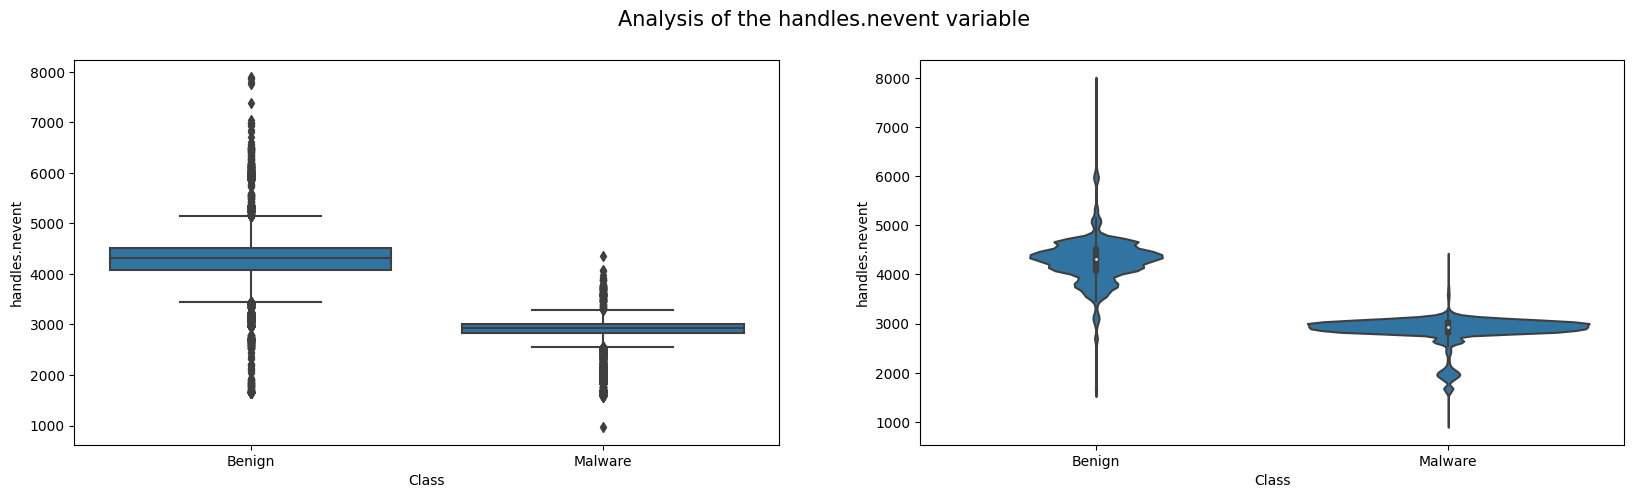

In [356]:
viobox(df=df, x='Class', y='handles.nevent',
       suptitle='Analysis of the handles.nevent variable')

For the variable `handles.nevent`, most of the malware attacks have a value of 3000 as indicated in the violin plot above. Most benign records are within the range of 3500-5000. Values below 3000 could be malicious attacks.

In [357]:
df_benign['handles.nevent'].describe()

count    29231.000000
mean      4278.939722
std        465.809494
min       1636.000000
25%       4083.000000
50%       4322.000000
75%       4506.000000
max       7892.000000
Name: handles.nevent, dtype: float64

In [358]:
df_malicious['handles.nevent'].describe()

count    28831.000000
mean      2867.048836
std        288.178616
min        966.000000
25%       2828.000000
50%       2925.000000
75%       3012.000000
max       4357.000000
Name: handles.nevent, dtype: float64

__Analysis of the 'dlllist.avg_dlls_per_proc variable__

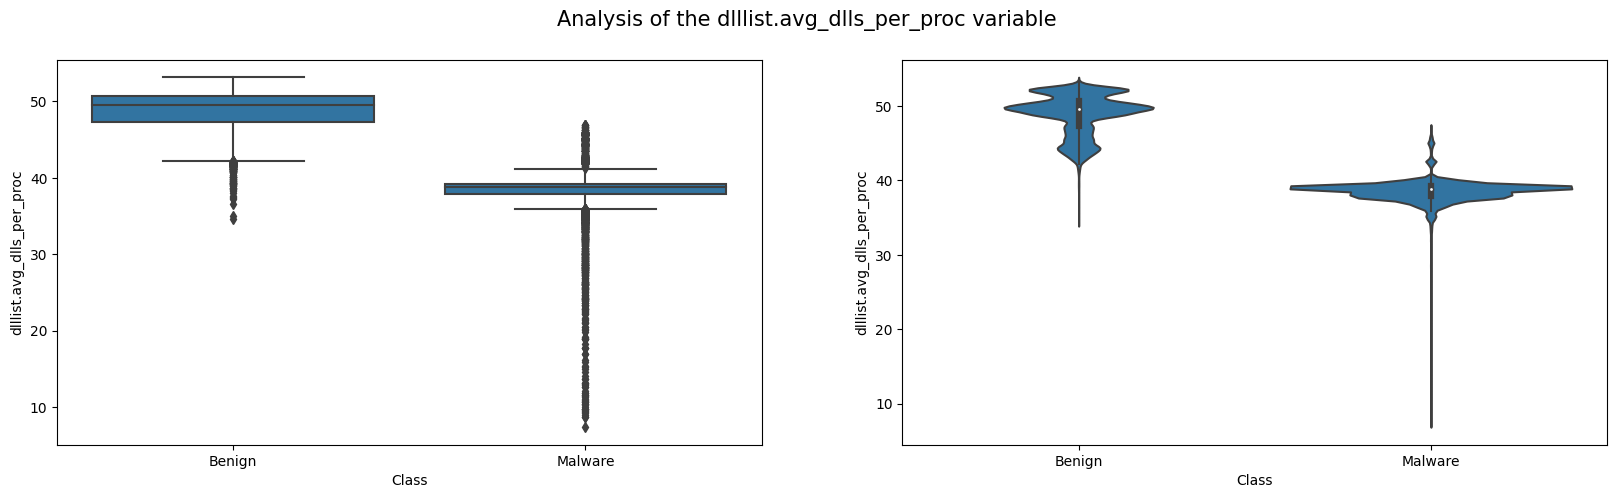

In [359]:
viobox(df=df, x='Class', y='dlllist.avg_dlls_per_proc',
       suptitle='Analysis of the dlllist.avg_dlls_per_proc variable')

For the variable `dlllist.avg_dlls_per_proc`, most of the malware attacks have values ranging from 35 - 40 as indicated in the violin plot above. Most benign records are above the value 40. If the value of `dlllist.avg_dlls_per_proc` is below 40, there is a high chance that it is a malicious attacks.

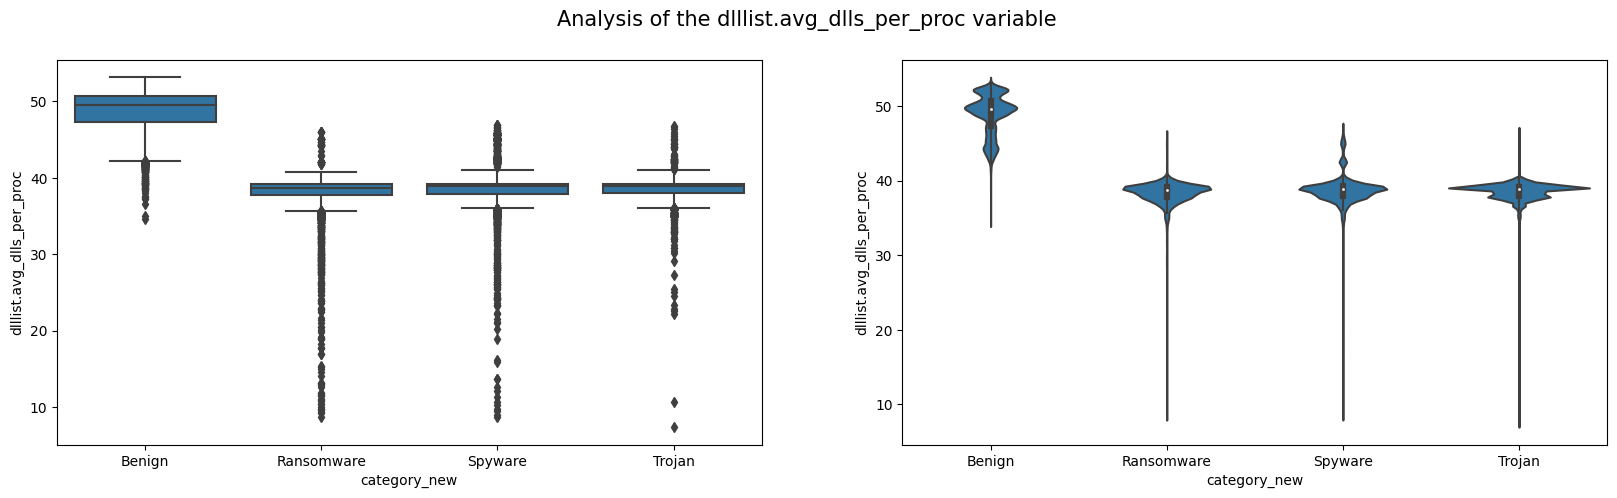

In [360]:
viobox(df=df, x='category_new', y='dlllist.avg_dlls_per_proc',
       suptitle='Analysis of the dlllist.avg_dlls_per_proc variable')

In [361]:
df_benign['dlllist.avg_dlls_per_proc'].describe()

count    29231.000000
mean        48.923975
std          2.711583
min         34.538462
25%         47.309795
50%         49.597260
75%         50.727273
max         53.170732
Name: dlllist.avg_dlls_per_proc, dtype: float64

In [362]:
df_malicious['dlllist.avg_dlls_per_proc'].describe()

count    28831.000000
mean        38.494404
std          2.023574
min          7.333333
25%         37.863636
50%         38.840909
75%         39.184211
max         46.968254
Name: dlllist.avg_dlls_per_proc, dtype: float64

__Analysis of the 'dlllist.ndlls' variable__

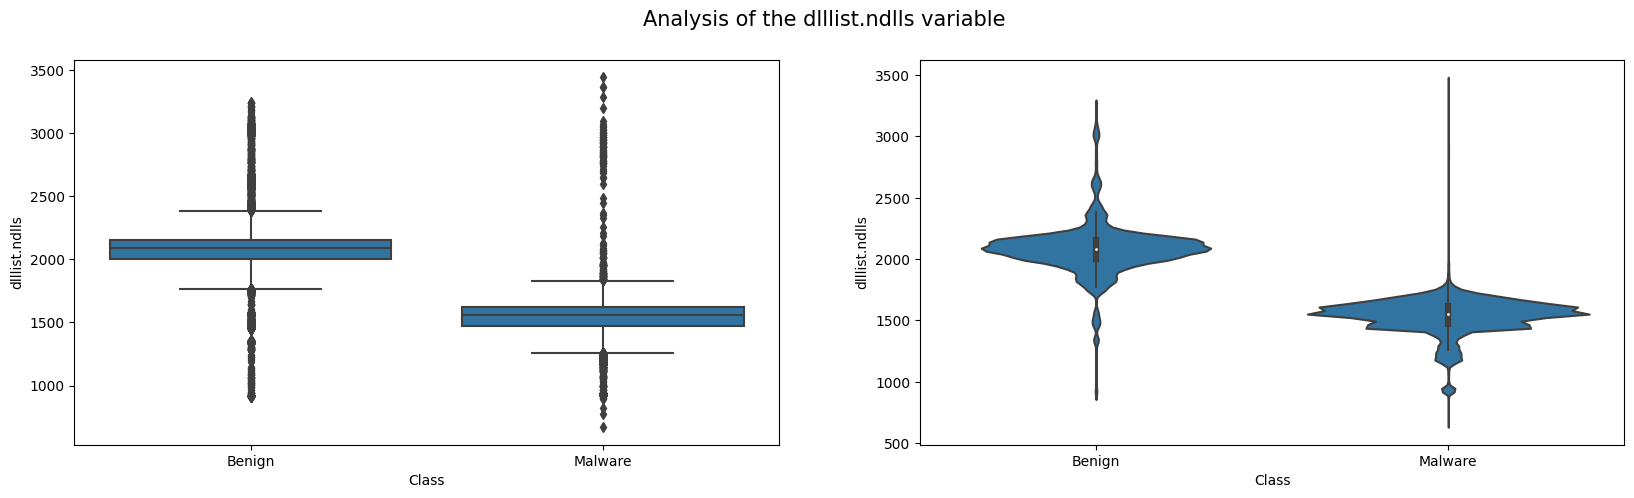

In [363]:
viobox(df=df, x='Class', y='dlllist.ndlls',
       suptitle='Analysis of the dlllist.ndlls variable')

For the variable `dlllist.ndlls`, most of the malware attacks have values ranging from 1400 - 1700 as indicated in the violin plot above. Most benign records are within the range of 2000-2300. If the value of `dlllist.ndlls` is below 1500, there is a high chance that it is a malicious attacks.

In [364]:
df_benign['dlllist.ndlls'].describe()

count    29231.000000
mean      2082.665253
std        213.655439
min        911.000000
25%       2000.000000
50%       2086.000000
75%       2154.000000
max       3243.000000
Name: dlllist.ndlls, dtype: float64

In [365]:
df_malicious['dlllist.ndlls'].describe()

count    28831.000000
mean      1539.513753
std        155.928212
min        670.000000
25%       1474.500000
50%       1557.000000
75%       1619.000000
max       3443.000000
Name: dlllist.ndlls, dtype: float64

__Analysis of the ''handles.nkey'' variable__

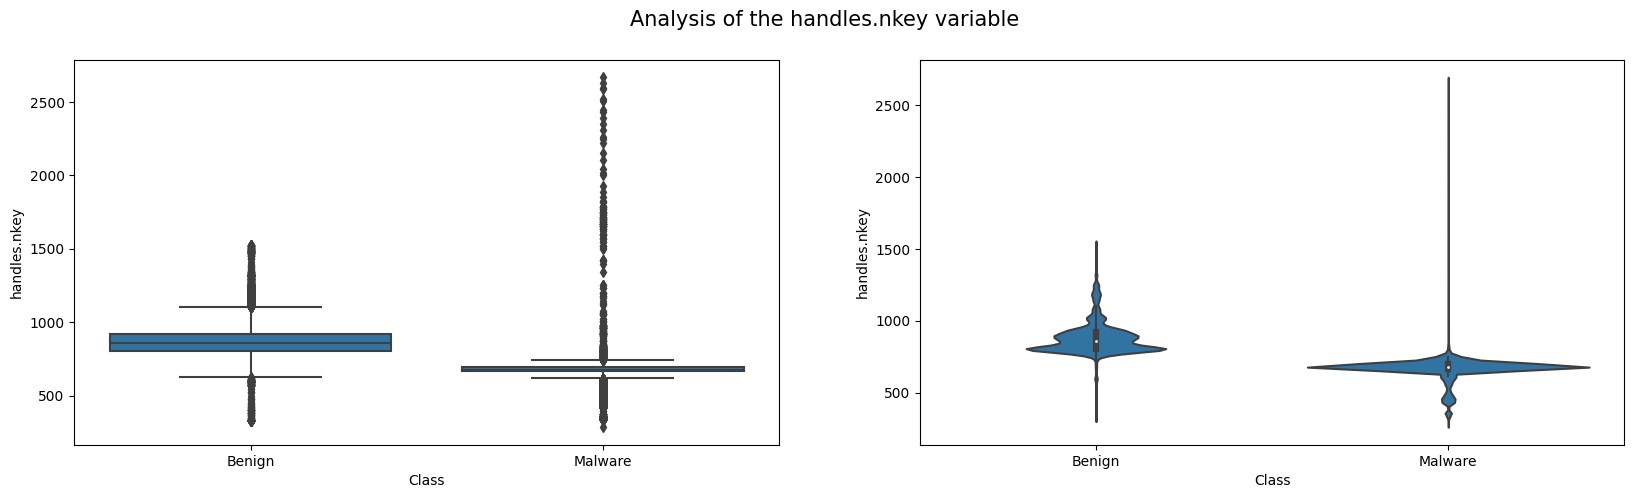

In [366]:
viobox(df=df, x='Class', y='handles.nkey',
       suptitle='Analysis of the handles.nkey variable')

Most of the malware values of the handles.nkey variable are within the range of 500 - 800. While most of the benign values of the handles.nkey variable are within the range of 800-1000. Also, the values of the handles.nkey variable that are above 1500 are malware attacks.

In [367]:
df_benign['handles.nkey'].describe()

count    29231.000000
mean       879.413773
std        115.842483
min        327.000000
25%        803.000000
50%        857.000000
75%        922.000000
max       1525.000000
Name: handles.nkey, dtype: float64

In [368]:
df_malicious['handles.nkey'].describe()

count    28831.000000
mean       669.515521
std         99.228141
min        284.000000
25%        664.000000
50%        676.000000
75%        696.000000
max       2668.000000
Name: handles.nkey, dtype: float64

__Analysis of the pslist.avg_handlers variable__

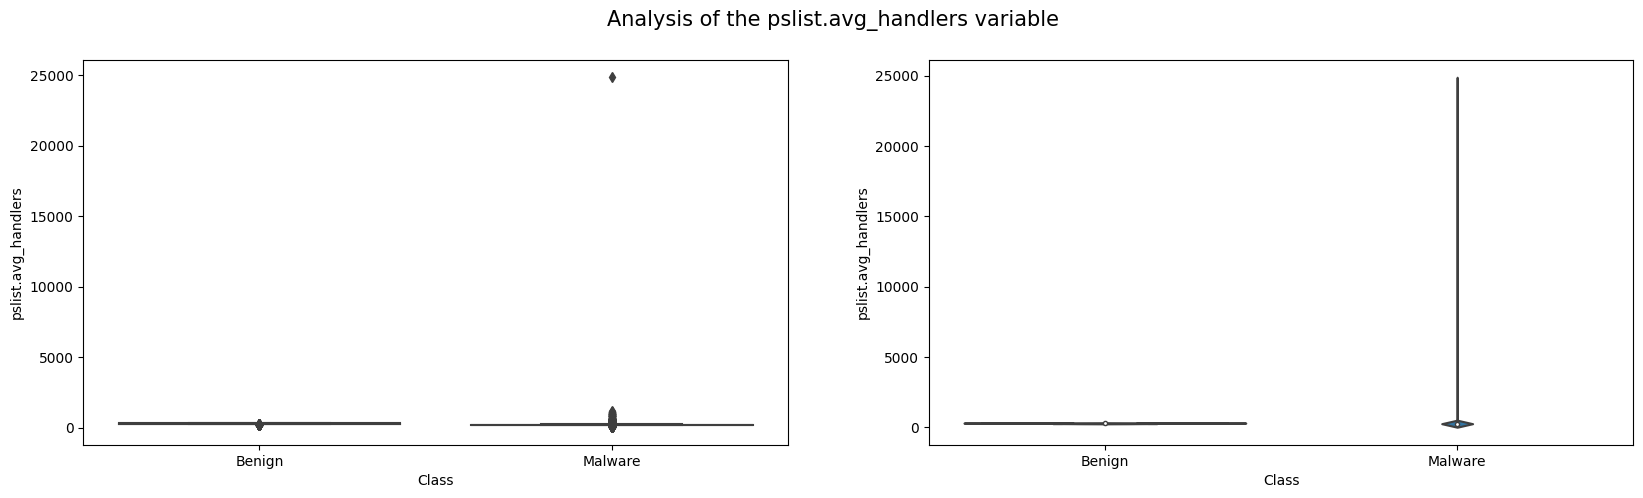

In [369]:
viobox(df=df, x='Class', y='pslist.avg_handlers',
       suptitle='Analysis of the pslist.avg_handlers variable')

__Analysis of the handles.avg_handles_per_proc variable__

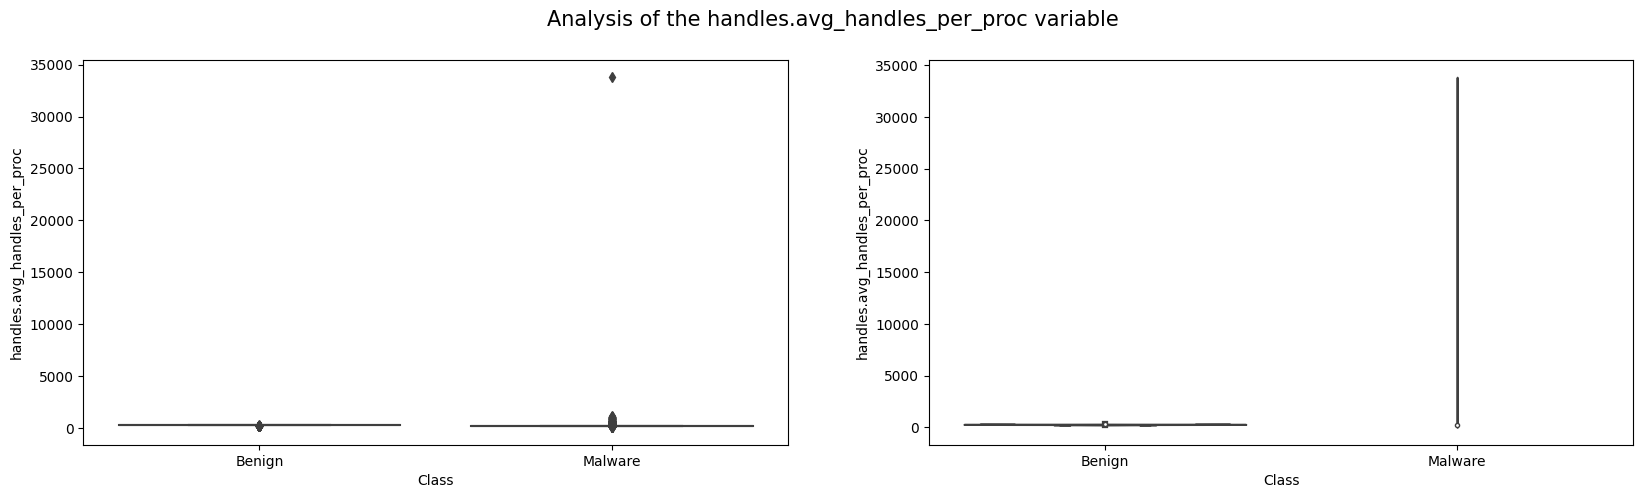

In [370]:
viobox(df=df, x='Class', y='handles.avg_handles_per_proc',
       suptitle='Analysis of the handles.avg_handles_per_proc variable');

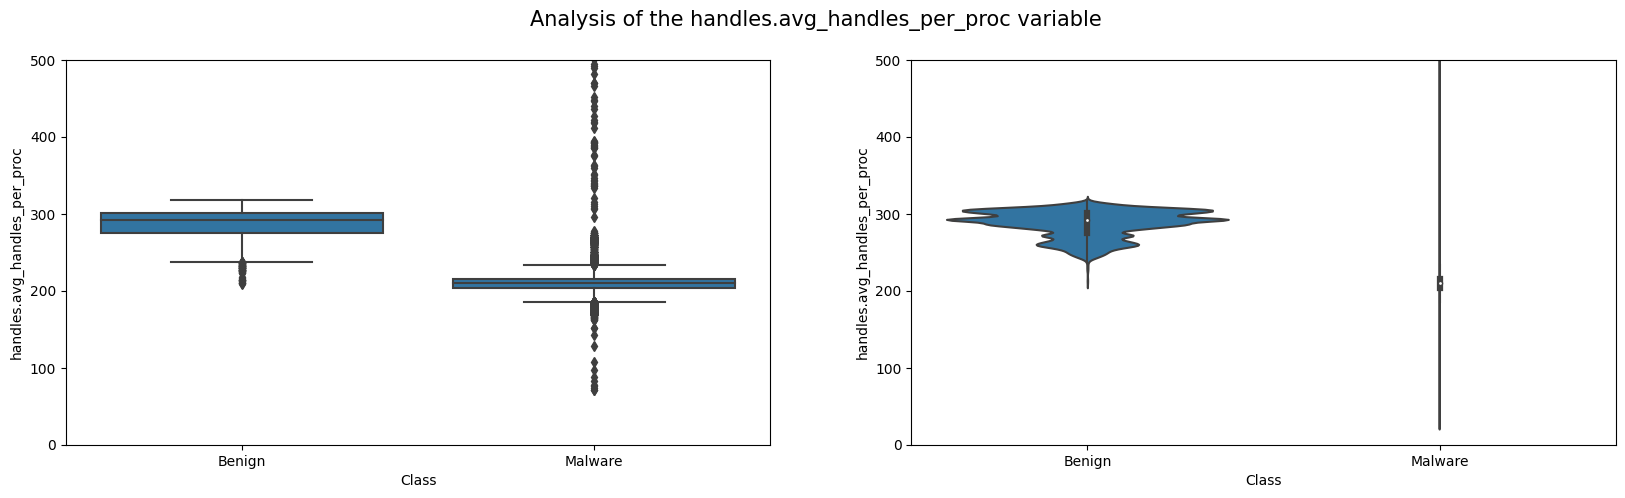

In [371]:
# Zooming In
plt.figure(figsize=[20,5])
plt.suptitle('Analysis of the handles.avg_handles_per_proc variable', fontsize=15)
plt.subplot(1,2,1)
sns.boxplot(data=df, x='Class', y='handles.avg_handles_per_proc', color=base_color)
plt.ylim(0,500);
plt.subplot(1,2,2)
sns.violinplot(data=df, x='Class', y='handles.avg_handles_per_proc', color=base_color)
plt.ylim(0,500);

Most benign values of the handles.avg_handles_per_proc variable are within the range of 200-350. If the value is below 200 or above 350, it could be a malware attack.

In [372]:
df_benign['handles.avg_handles_per_proc'].describe()

count    29231.000000
mean       286.780925
std         17.466239
min        208.270833
25%        275.509461
50%        291.257965
75%        301.048507
max        318.162791
Name: handles.avg_handles_per_proc, dtype: float64

In [373]:
df_malicious['handles.avg_handles_per_proc'].describe()

count    28831.000000
mean       212.413518
std        200.484932
min         71.139241
25%        203.136364
50%        209.674419
75%        215.054054
max      33784.193550
Name: handles.avg_handles_per_proc, dtype: float64

__Analysis of the svcscan.process_services variable__

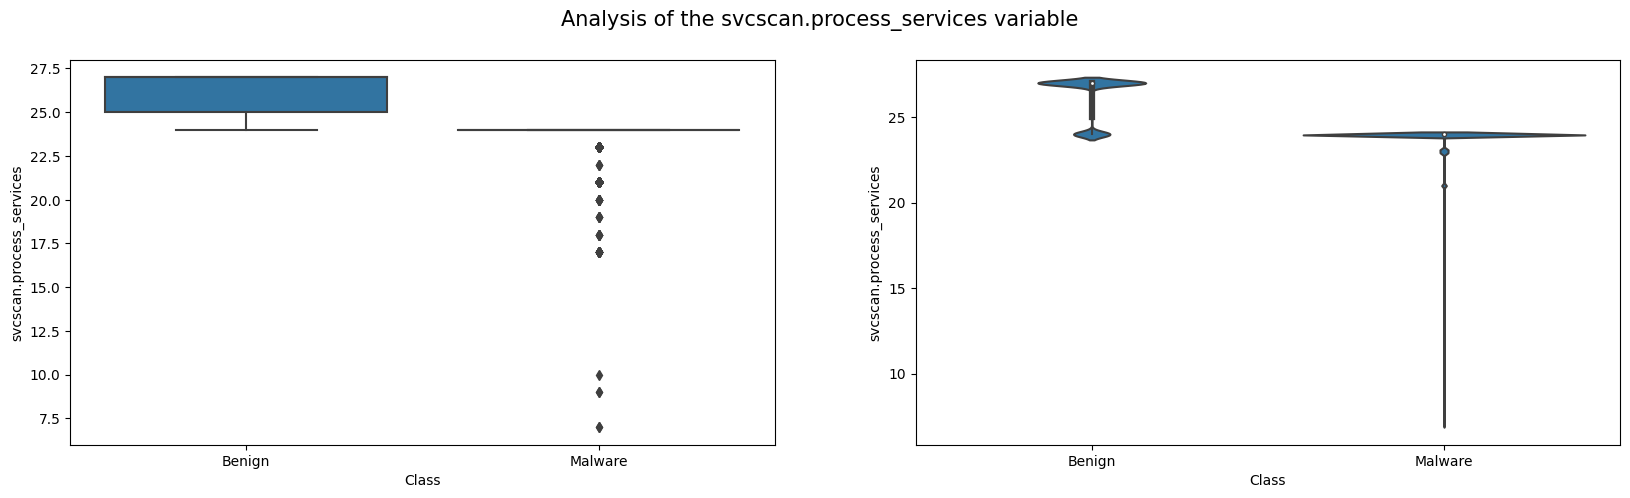

In [374]:
viobox(df=df, x='Class', y='svcscan.process_services',
       suptitle='Analysis of the svcscan.process_services variable')

The svcscan.process_services variable of malware attacks have values less than 25. If the value of the svcscan.process_services variable is below 25, there is a high chance that it is a malware attack. If it is above 25, then it is benign. From the violin plot, most of the benign values of the svcscan.process_services variable are within the range of 25-27. While most of the malware values of the svcscan.process_services variable are 24. From the summary statistic, the maximum value of the malware class of the svcscan.process_services variable is 24, while the minimum is 7. The maximum value of the benign class of the svcscan.process_services variable is 27, while the minimum is 24. 

In [375]:
df_benign['svcscan.process_services'].describe()

count    29231.000000
mean        26.230885
std          1.297103
min         24.000000
25%         25.000000
50%         27.000000
75%         27.000000
max         27.000000
Name: svcscan.process_services, dtype: float64

In [376]:
df_malicious['svcscan.process_services'].describe()

count    28831.000000
mean        23.895807
std          0.519178
min          7.000000
25%         24.000000
50%         24.000000
75%         24.000000
max         24.000000
Name: svcscan.process_services, dtype: float64

__Correlation Analysis__

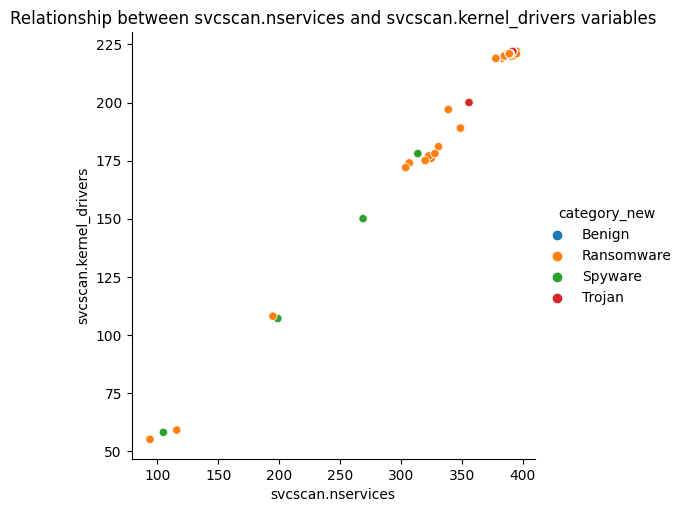

In [377]:
sns.relplot(data=df, x='svcscan.nservices', y='svcscan.kernel_drivers', hue='category_new')
plt.title('Relationship between svcscan.nservices and svcscan.kernel_drivers variables');

There is a high positive correlation between `svcscan.nservices` and `svcscan.kernel_drivers`. The only points showing are the malware.

**Plot Matrices**

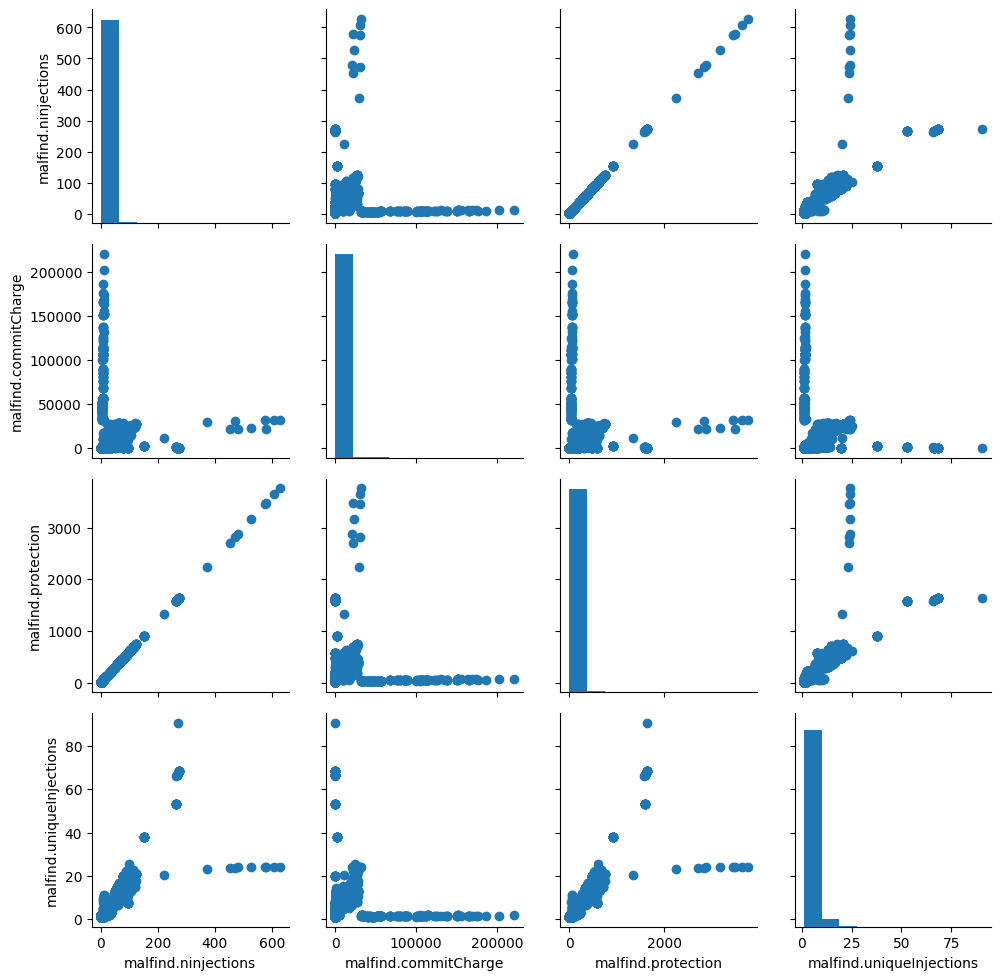

In [378]:
g = sns.PairGrid(data=df, vars=['malfind.ninjections', 'malfind.commitCharge',
                                'malfind.protection', 'malfind.uniqueInjections'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

There is a high correlation between `mlfind.ninjections` and `malfind.protection`.

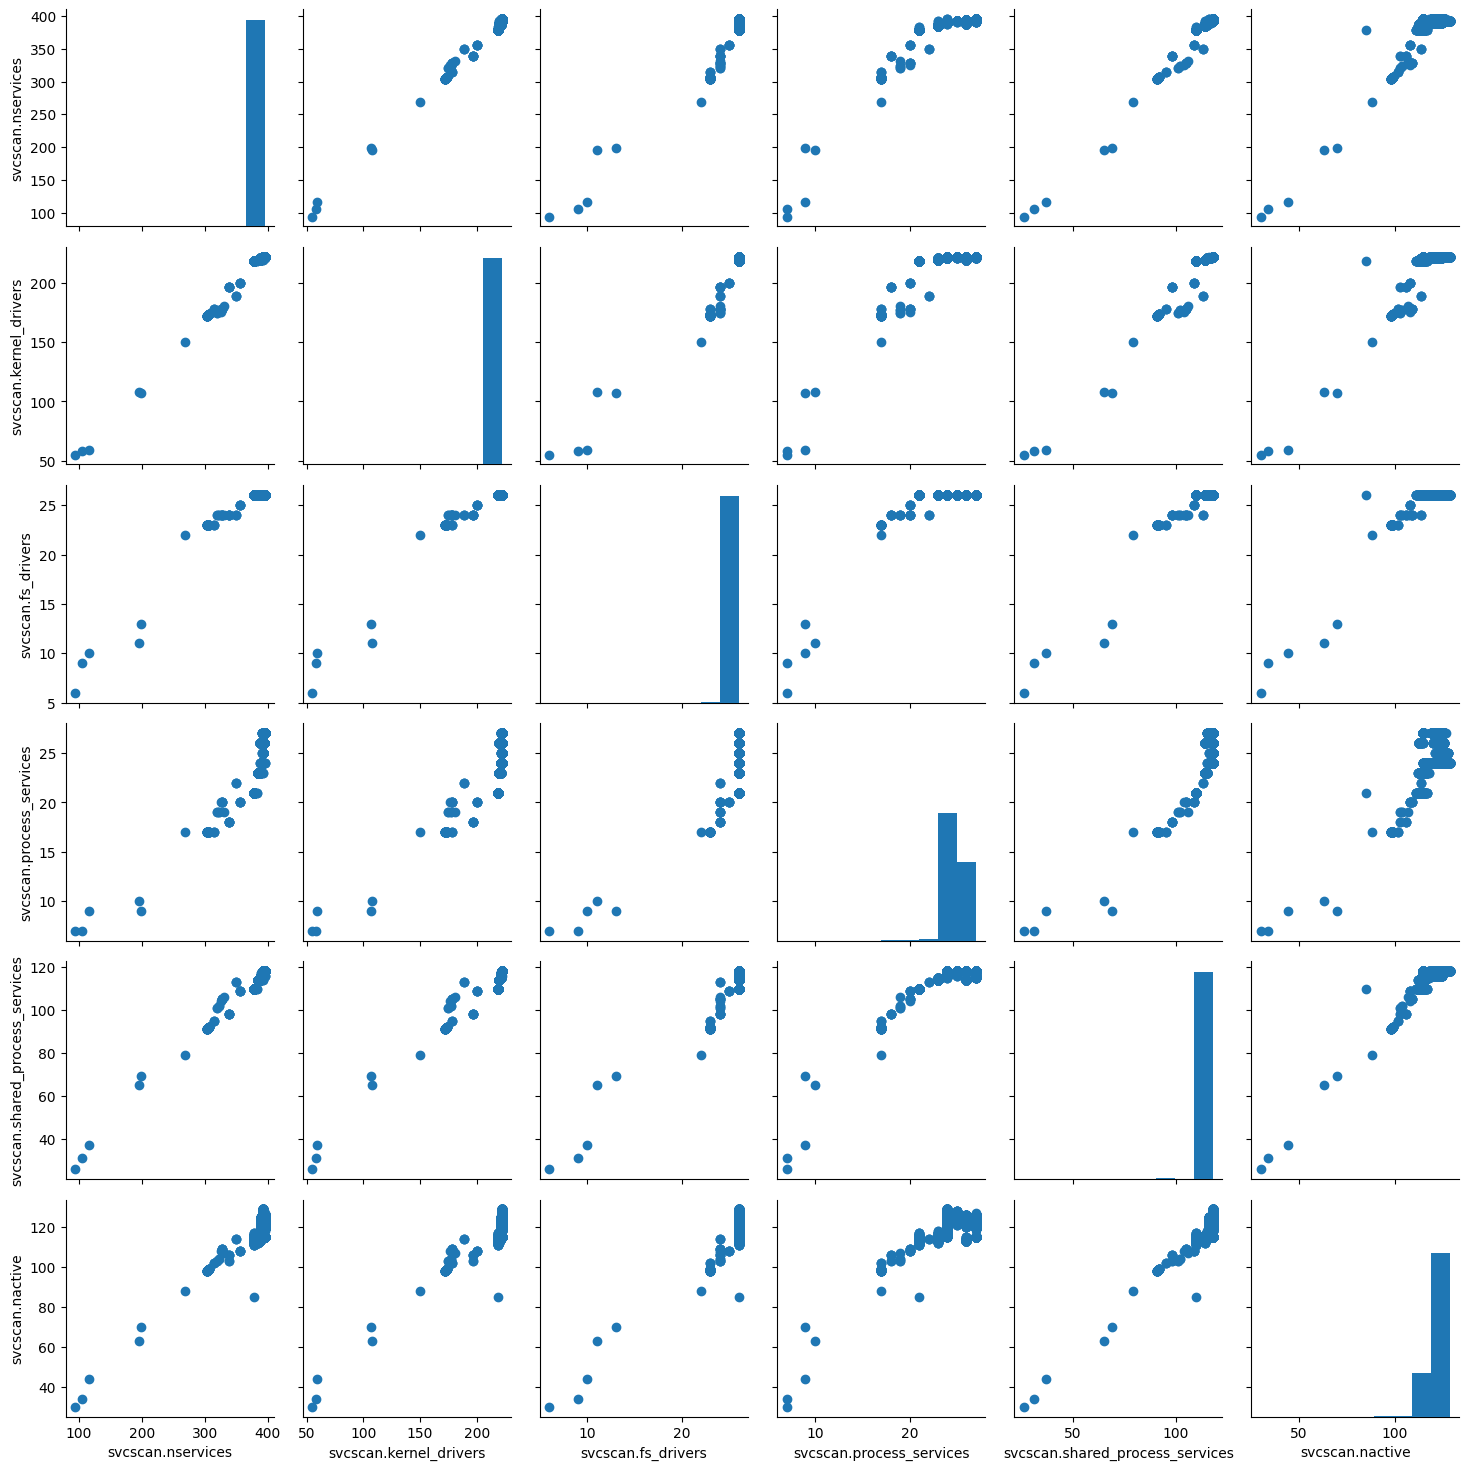

In [379]:
g = sns.PairGrid(data=df, vars=['svcscan.nservices', 'svcscan.kernel_drivers',
                                'svcscan.fs_drivers', 'svcscan.process_services',
                                'svcscan.shared_process_services', 'svcscan.nactive'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

__Relationship between svcscan.process_services and svcscan.nactive variables__

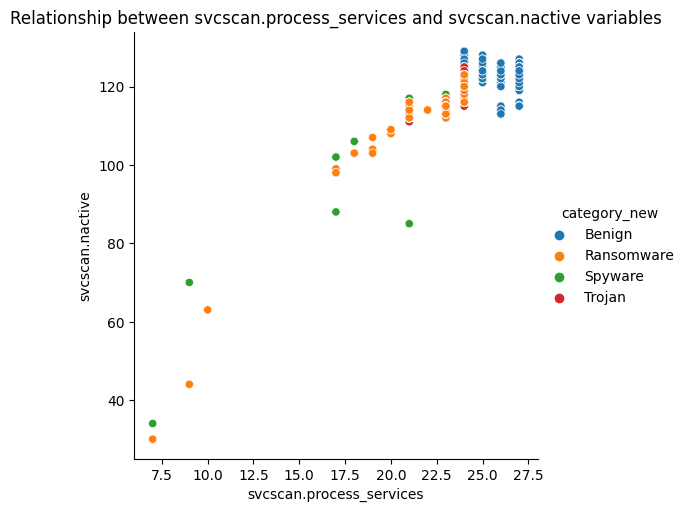

In [380]:
sns.relplot(data=df, x='svcscan.process_services', y='svcscan.nactive', hue='category_new')
plt.title('Relationship between svcscan.process_services and svcscan.nactive variables');

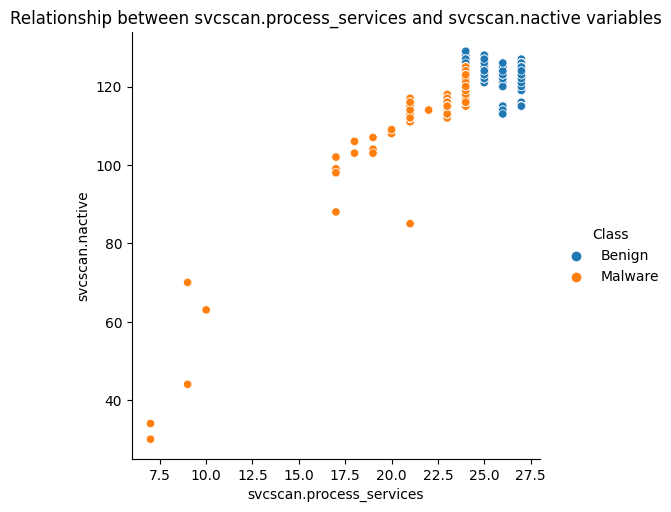

In [381]:
sns.relplot(data=df, x='svcscan.process_services', y='svcscan.nactive', hue='Class')
plt.title('Relationship between svcscan.process_services and svcscan.nactive variables');

Most of the benign records have values greater than 22.5 of the svcscan.process_services and 110 of the svcscan.nactive variable. Most of the ransomware attacks are within 17.5 - 25 value of the svcscan.process_services variable and 90 - 120 of the svcscan.nactive variable. From the scatter plot, it is easy to identify the clusters.

__Relationship between svcscan.shared_process_services and svcscan.process_services__

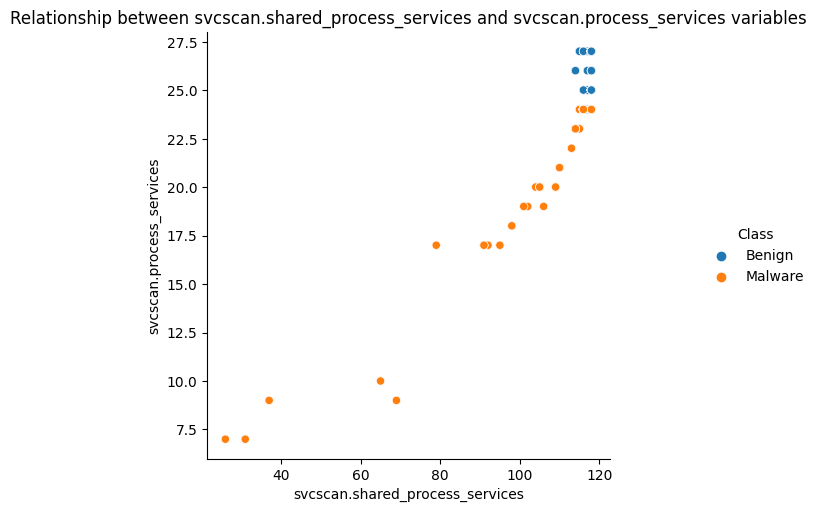

In [382]:
sns.relplot(data=df, x='svcscan.shared_process_services', y='svcscan.process_services', hue='Class')
plt.title('Relationship between svcscan.shared_process_services and svcscan.process_services variables');

From the scatter plot between the svcscan.shared_process_services and svcscan.process_services variables, we see that values below 24 (of the svcscan.process_services variable) are malware attacks. While values above 24 are benign. Also, the benign records are also above 110 (of svcscan.shared_process_services variable).

__Relationship between handles.nkey and svcscan.process_services__

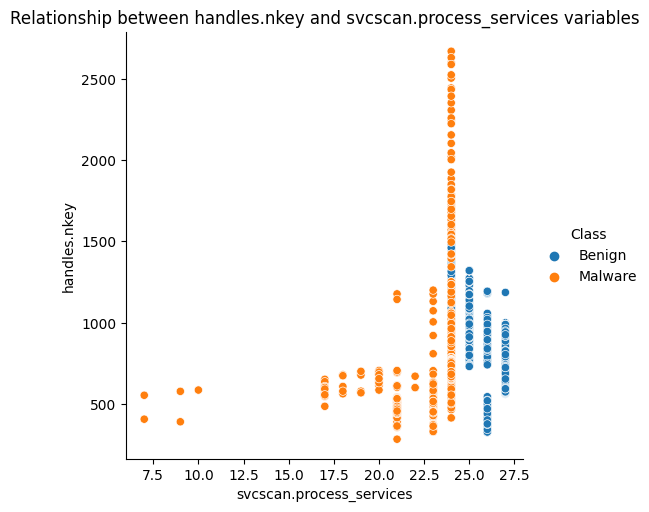

In [383]:
sns.relplot(data=df, y='handles.nkey', x='svcscan.process_services', hue='Class')
plt.title('Relationship between handles.nkey and svcscan.process_services variables');

Most of the benign records are above 24 (of the svcscan.process_services variable) but below 1500 of the handles.nkey.

__Relationship between handles.nkey and svcscan.shared_process_services__

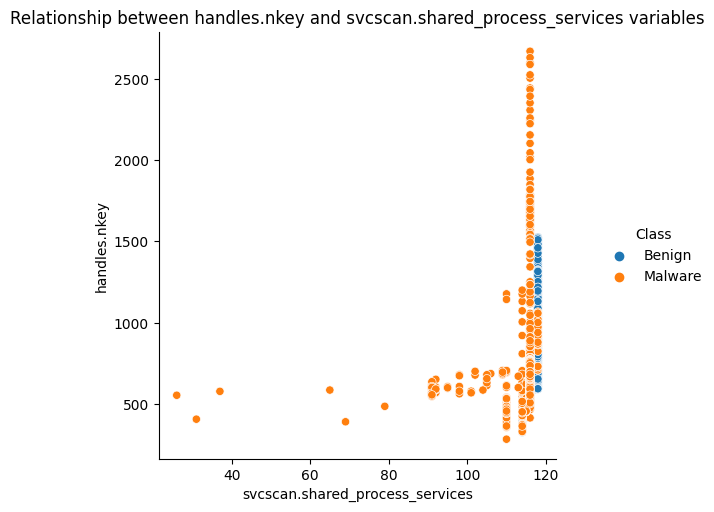

In [384]:
sns.relplot(data=df, y='handles.nkey', x='svcscan.shared_process_services', hue='Class')
plt.title('Relationship between handles.nkey and svcscan.shared_process_services variables');

The values above 118 of the svcscan.shared_process_services variable but below 700 of the handles.nkey variable are benign. Also, the values above 118 of the svcscan.shared_process_services variable but above 1200 of the handles.nkey variable are benign. Most of the values below 118 of the svcscan.shared_process_services variable are malware attacks.

__Relationship between dlllist.avg_dlls_per_proc and svcscan.kernel_drivers__

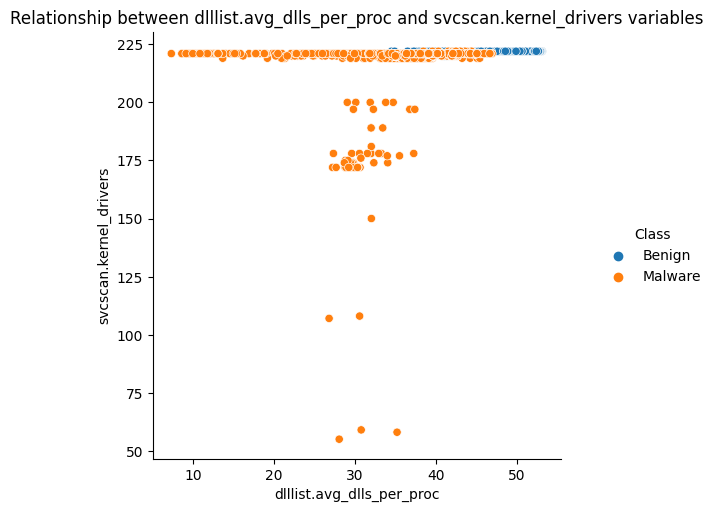

In [385]:
sns.relplot(data=df, x='dlllist.avg_dlls_per_proc', y='svcscan.kernel_drivers', hue='Class')
plt.title('Relationship between dlllist.avg_dlls_per_proc and svcscan.kernel_drivers variables');

Most of the benign values are above 45 (of the dlllist.avg_dlls_per_proc) and above 200 of the svcscan.kernel_drivers variable.

__Relationship between handles.nevent and handles.nkey__

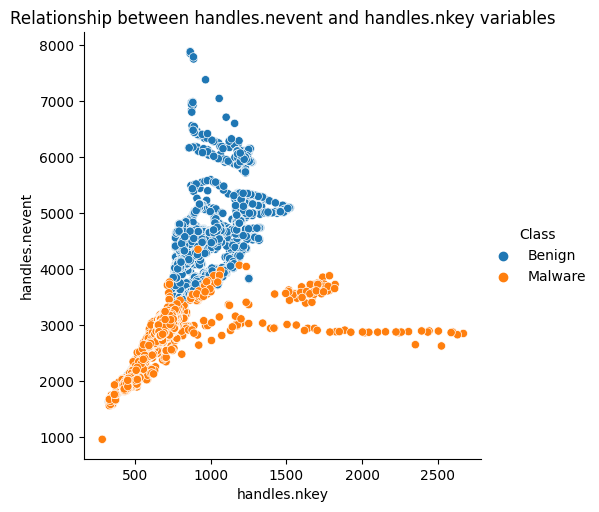

In [386]:
sns.relplot(data=df, y='handles.nevent', x='handles.nkey', hue='Class')
plt.title('Relationship between handles.nevent and handles.nkey variables');

The benign values are above 3500 of the handles.nevent variable but between the range of 600 - 1600 of handles.nkey variable. Malware attacks are below 4000 of the handles.nevent variable.

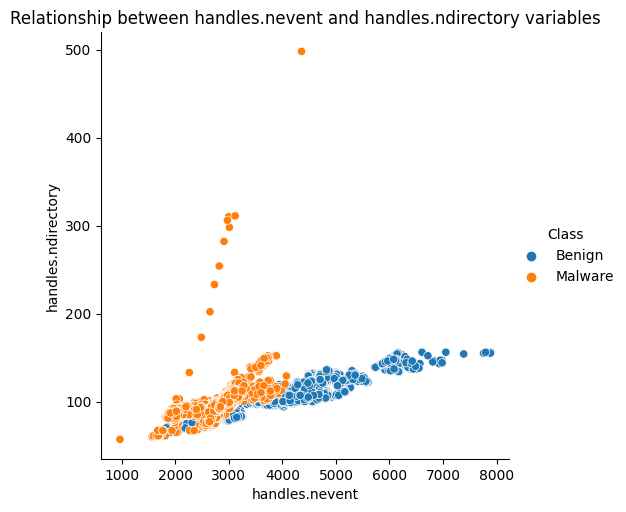

In [387]:
sns.relplot(data=df, x='handles.nevent', y='handles.ndirectory', hue='Class')
plt.title('Relationship between handles.nevent and handles.ndirectory variables');

Most of the benign class are below 200 of the handles.ndirectory variable, but above 4000 of the handles.nevent variable. All the values above 200 of the handles.ndirectory variable belong to the malware class.

__Relationship between ldrmodules.not_in_load_avg and dlllist.avg_dlls_per_proc variables__

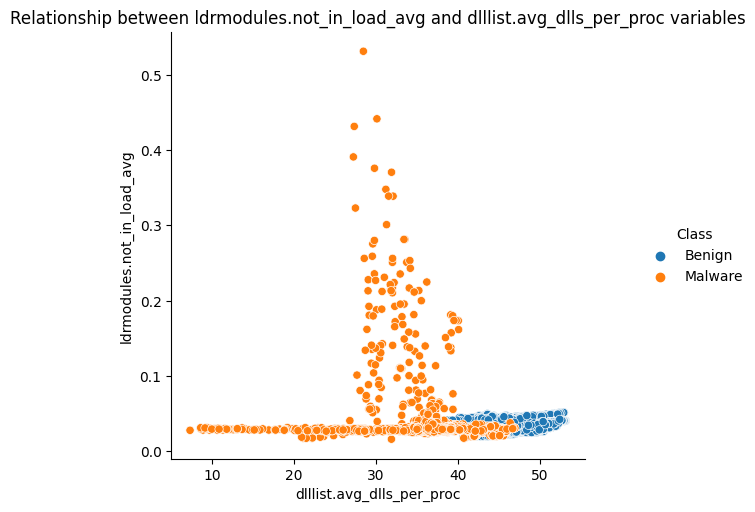

In [388]:
sns.relplot(data=df, y='ldrmodules.not_in_load_avg', x='dlllist.avg_dlls_per_proc', hue='Class')
plt.title('Relationship between ldrmodules.not_in_load_avg and dlllist.avg_dlls_per_proc variables');

Most of the records in the benign class have values above 40 for the dlllist.avg_dlls_per_proc but below 0.1 (ldrmodules.not_in_load_avg). All values above 0.1 of the ldrmodules.not_in_load_avg variable are malware attacks. Also, values below 30 of the dlllist.avg_dlls_per_proc variable are malware attacks.

__Relationship between handles.nevent and handles.nmutant__

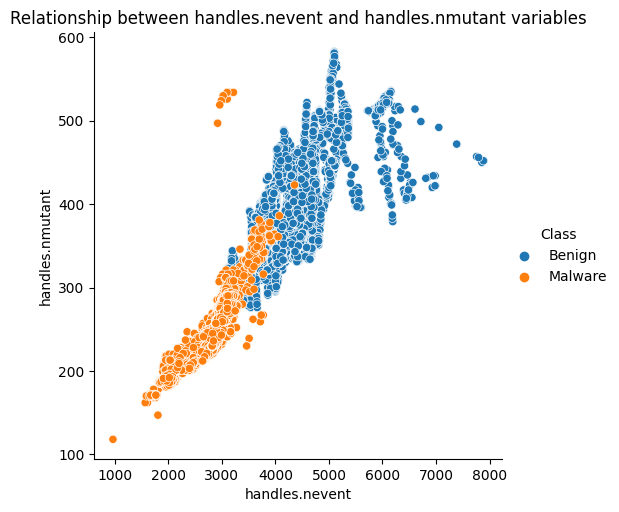

In [389]:
sns.relplot(data=df, x='handles.nevent', y='handles.nmutant', hue='Class')
plt.title('Relationship between handles.nevent and handles.nmutant variables');

The benign class have values greater than 3000 (of the handles.nevent) and greater than 300 of the handles.nmutant variable. All the records that have values greater than 4500 (of the handles.nevent) are benign. All values that are less than 3000 of the (of the handles.nevent) are malware. There is a small cluster of malware class between 500 - 600 of the handles.nmutant variable and 2500 - 3500 of the handles.nevent variable.

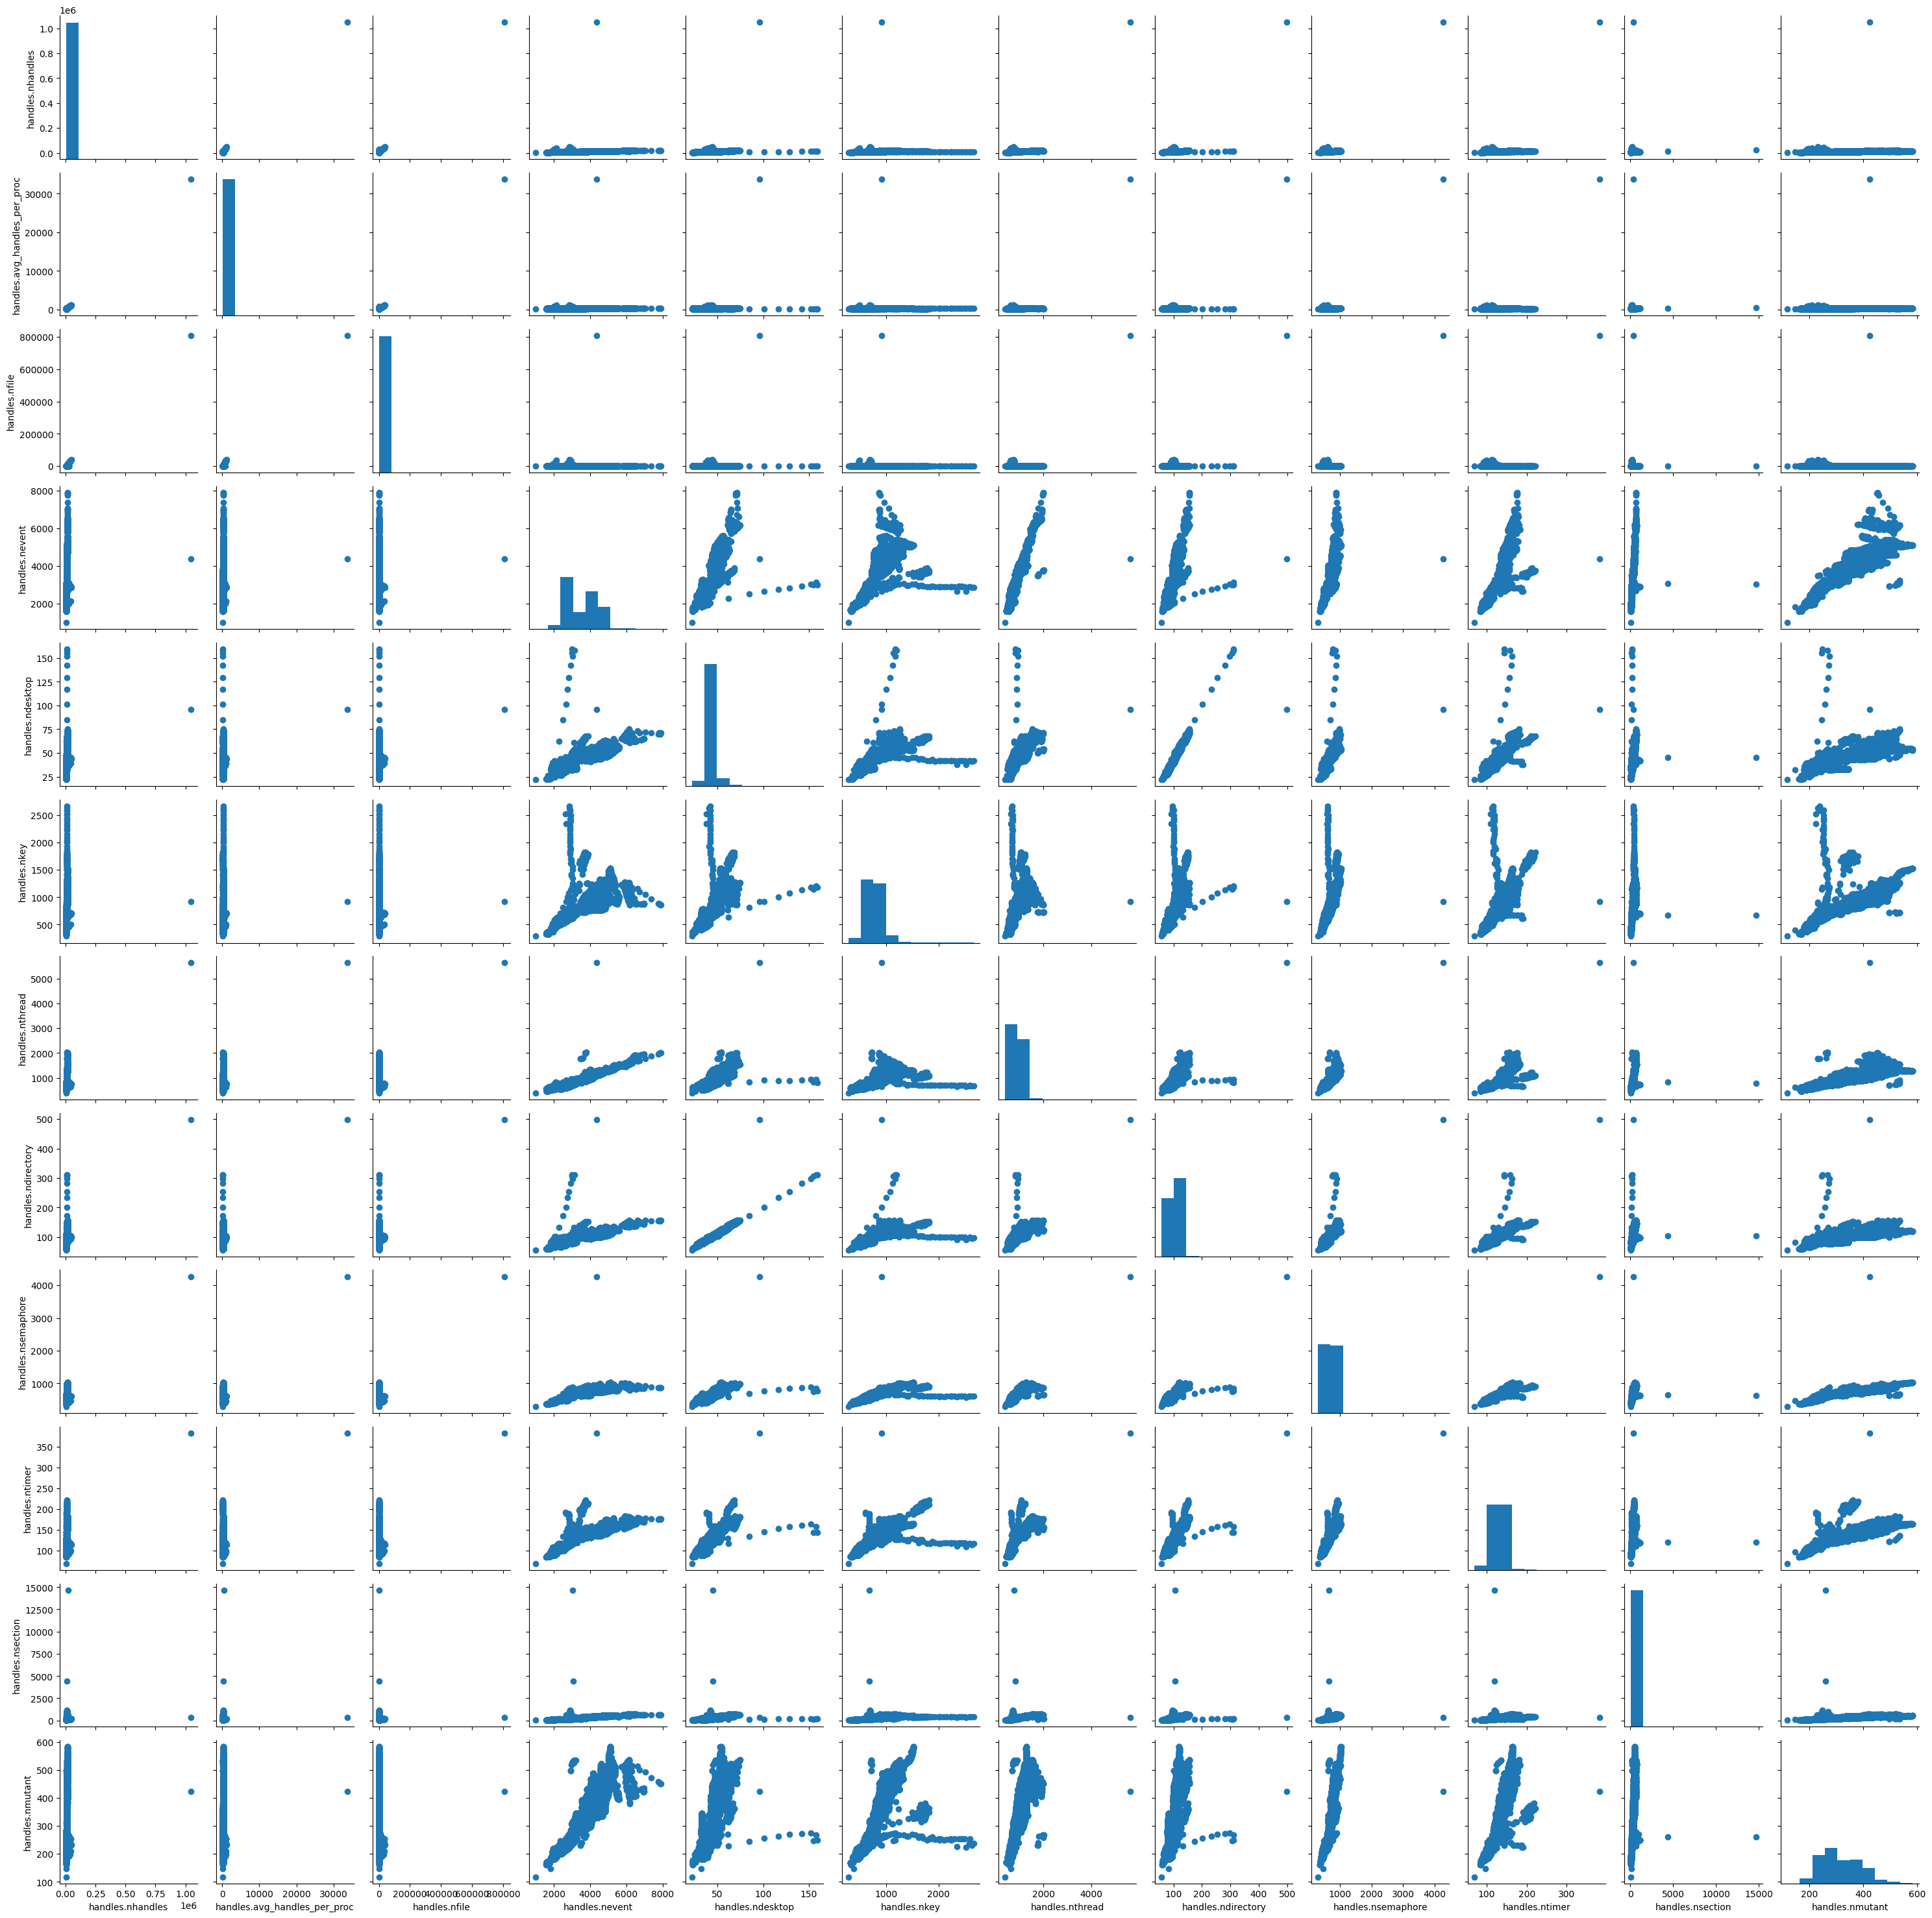

In [390]:
g = sns.PairGrid(data=df, vars=['handles.nhandles', 'handles.avg_handles_per_proc', 'handles.nfile',
                                'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread',
                                'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
                                'handles.nsection', 'handles.nmutant' ])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

**Correlation Heatmap**

In [391]:
# Break columns into subset for the correlation heatmap
subset_1 = df.columns[:25]
subset_2 = df.columns[25:]
print(subset_1)
print(subset_2)

Index(['pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.avg_handlers', 'dlllist.ndlls', 'dlllist.avg_dlls_per_proc',
       'handles.nhandles', 'handles.avg_handles_per_proc', 'handles.nfile',
       'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread',
       'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
       'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_mem',
       'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg',
       'ldrmodules.not_in_mem_avg', 'malfind.ninjections'],
      dtype='object')
Index(['malfind.commitCharge', 'malfind.protection',
       'malfind.uniqueInjections', 'psxview.not_in_pslist',
       'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool',
       'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles',
       'psxview.not_in_session', 'psxview.not_in_deskthrd',
       'psxview.not_in_pslist_false_avg',
     

C:\Users\Atilim\AppData\Local\Temp\ipykernel_22256\2148088144.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson'), annot=True, linewidths=.5, ax=ax);


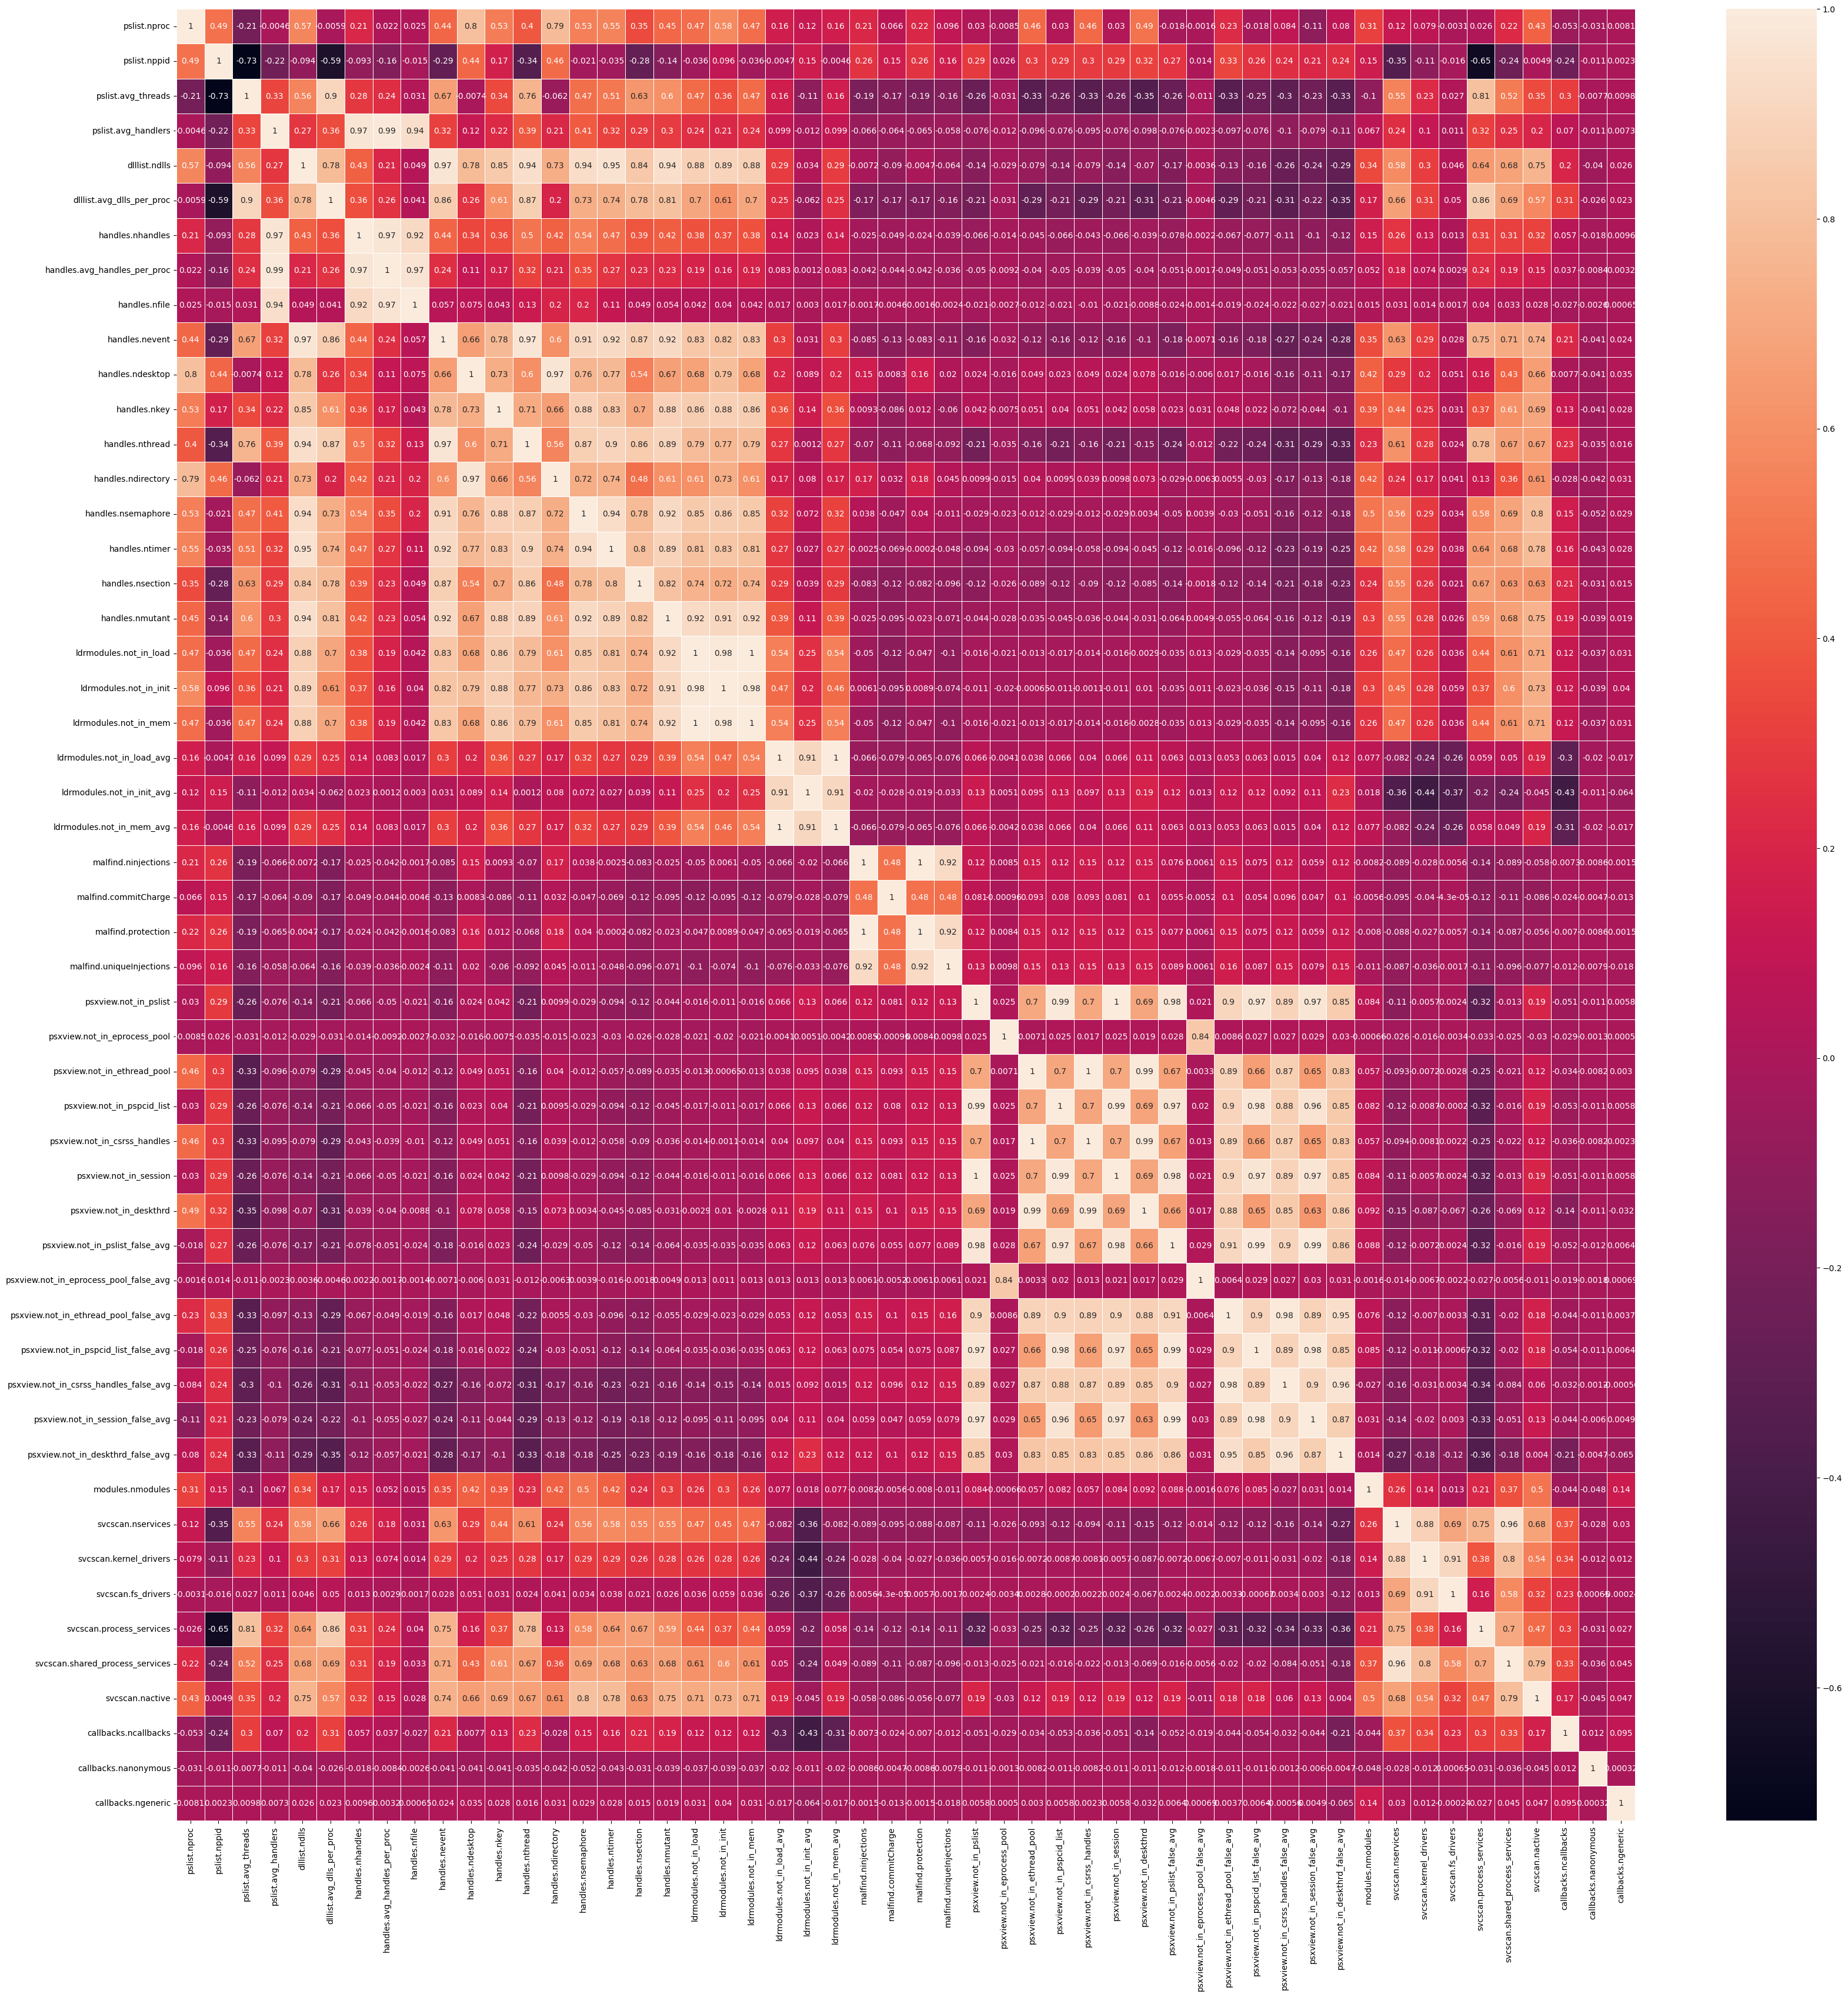

In [392]:
# Pearson's Corrrelation Plot with Seaborn
fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(df.corr(method='pearson'), annot=True, linewidths=.5, ax=ax);

Zoom In

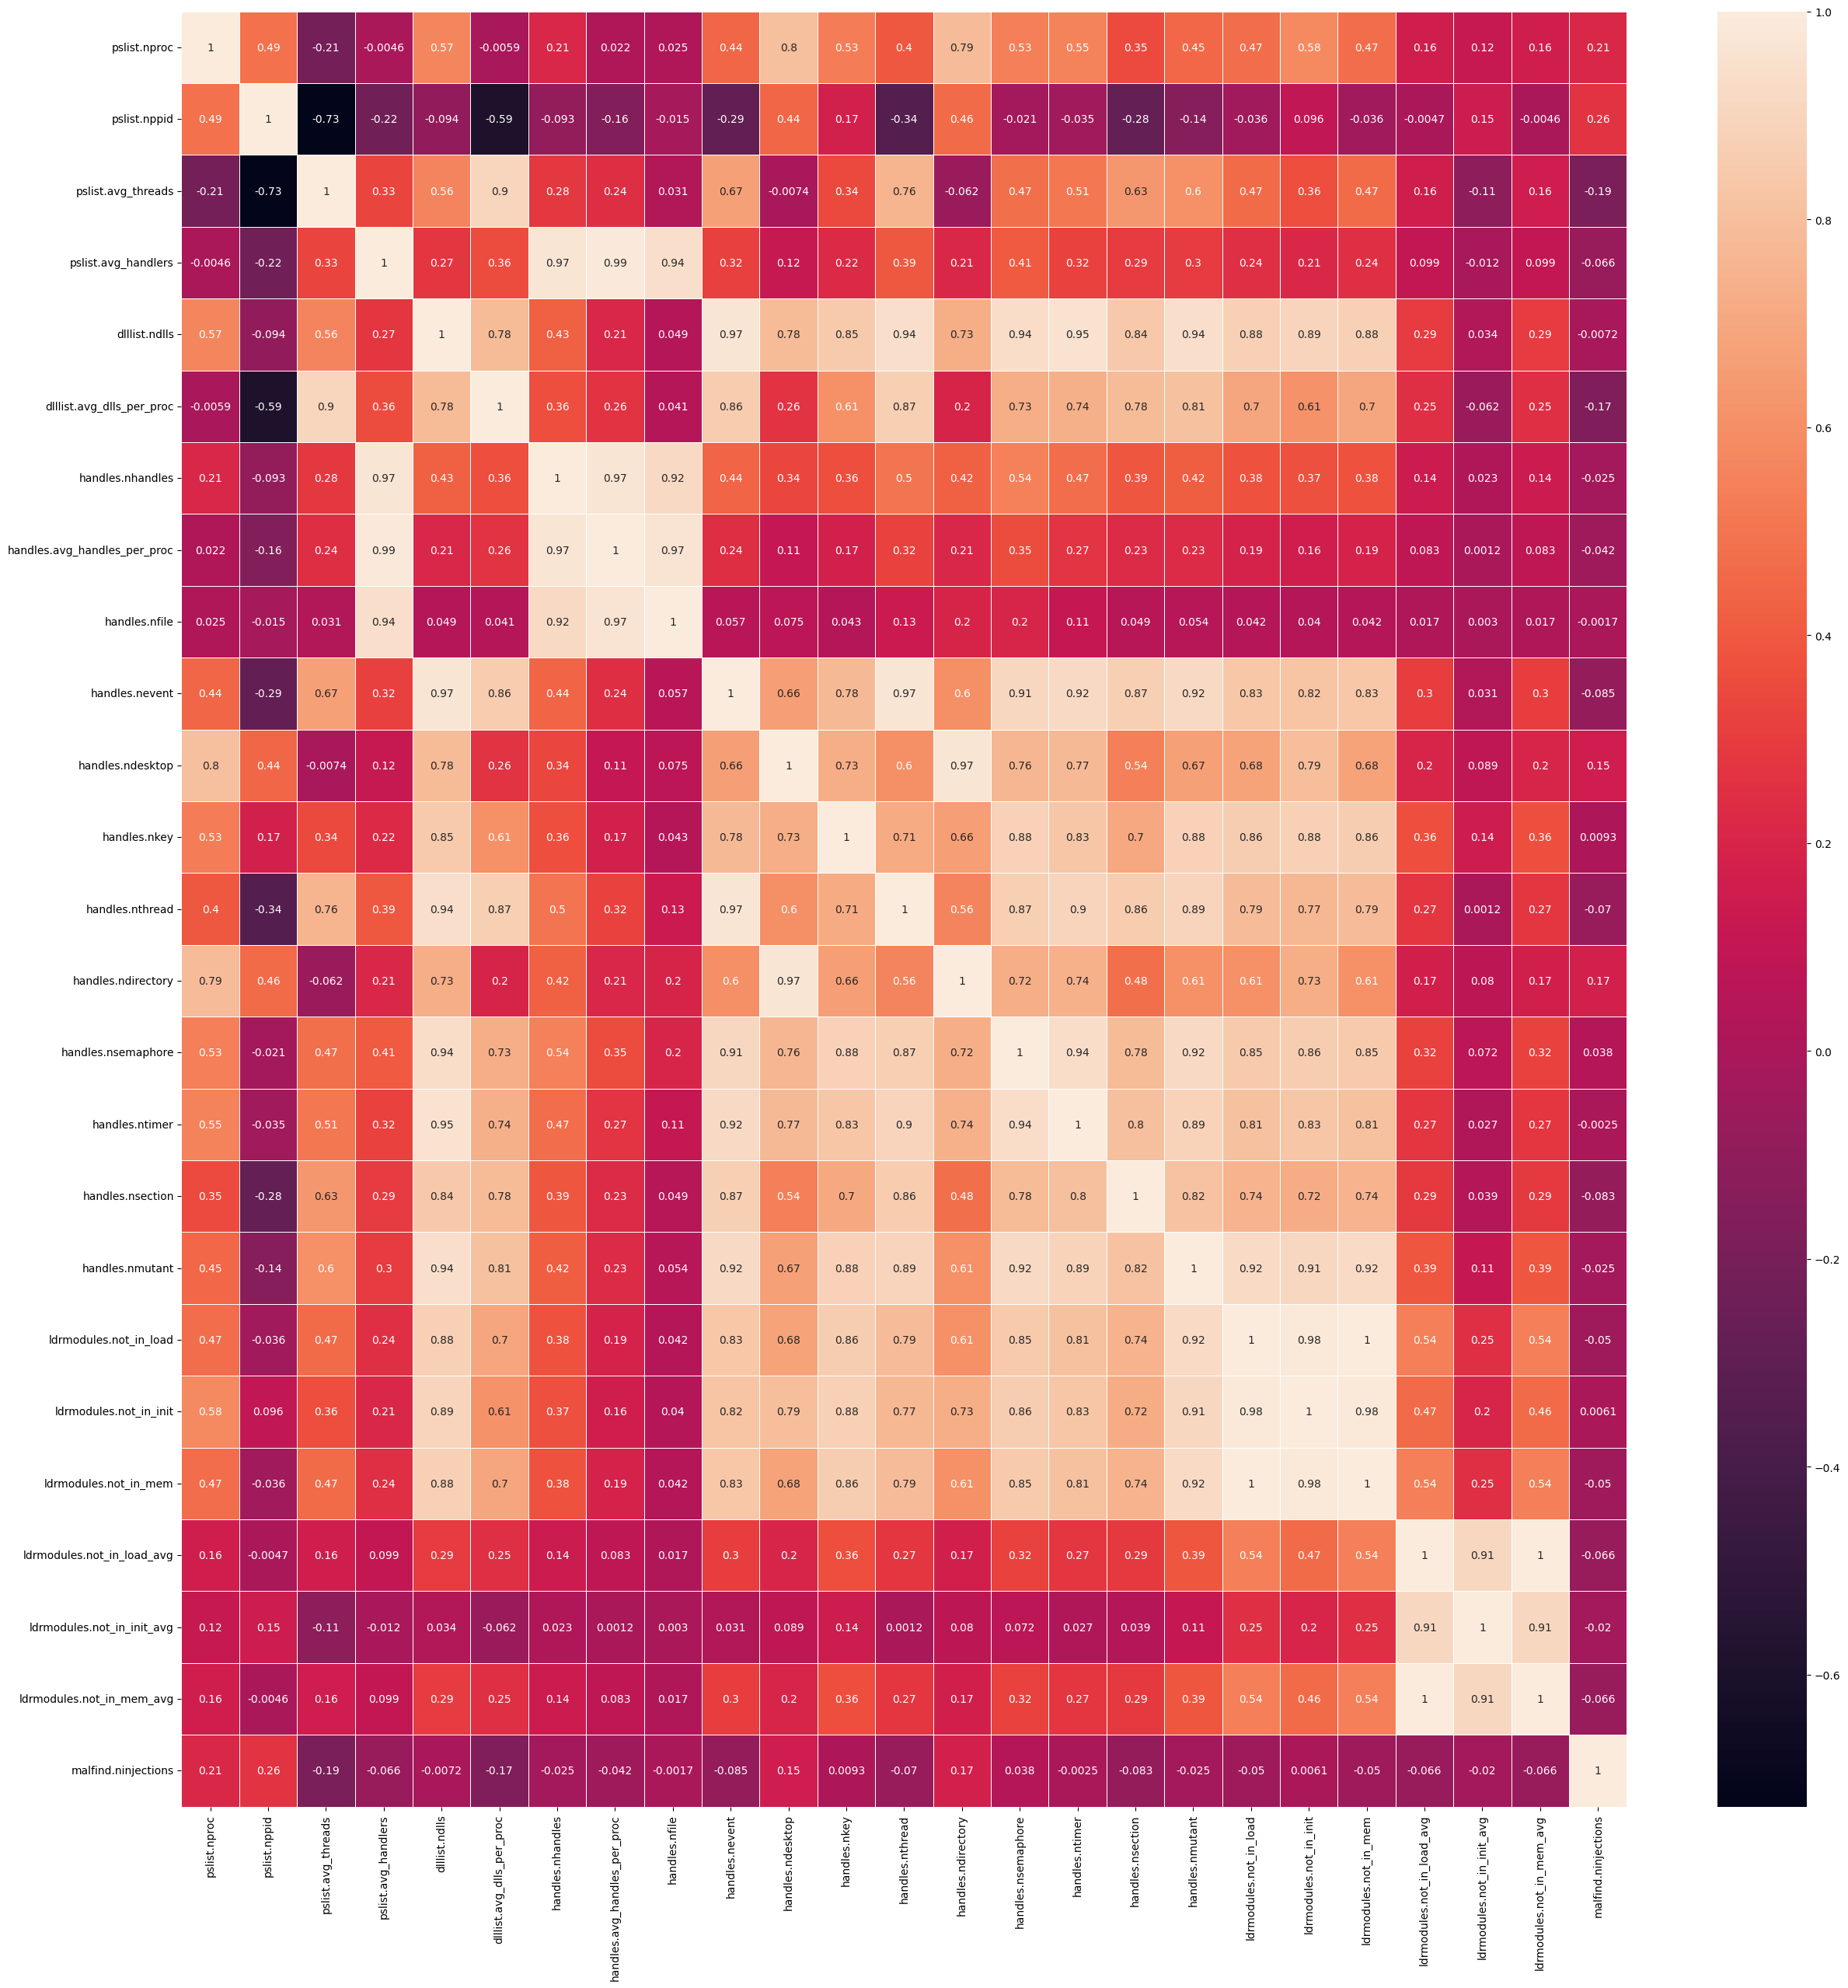

In [393]:
# Pearson's Corrrelation Plot with Seaborn
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(df[subset_1].corr(method='pearson'), annot=True, linewidths=.5, ax=ax);

C:\Users\Atilim\AppData\Local\Temp\ipykernel_22256\1560249997.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[subset_2].corr(method='pearson'), annot=True, linewidths=.5, ax=ax);


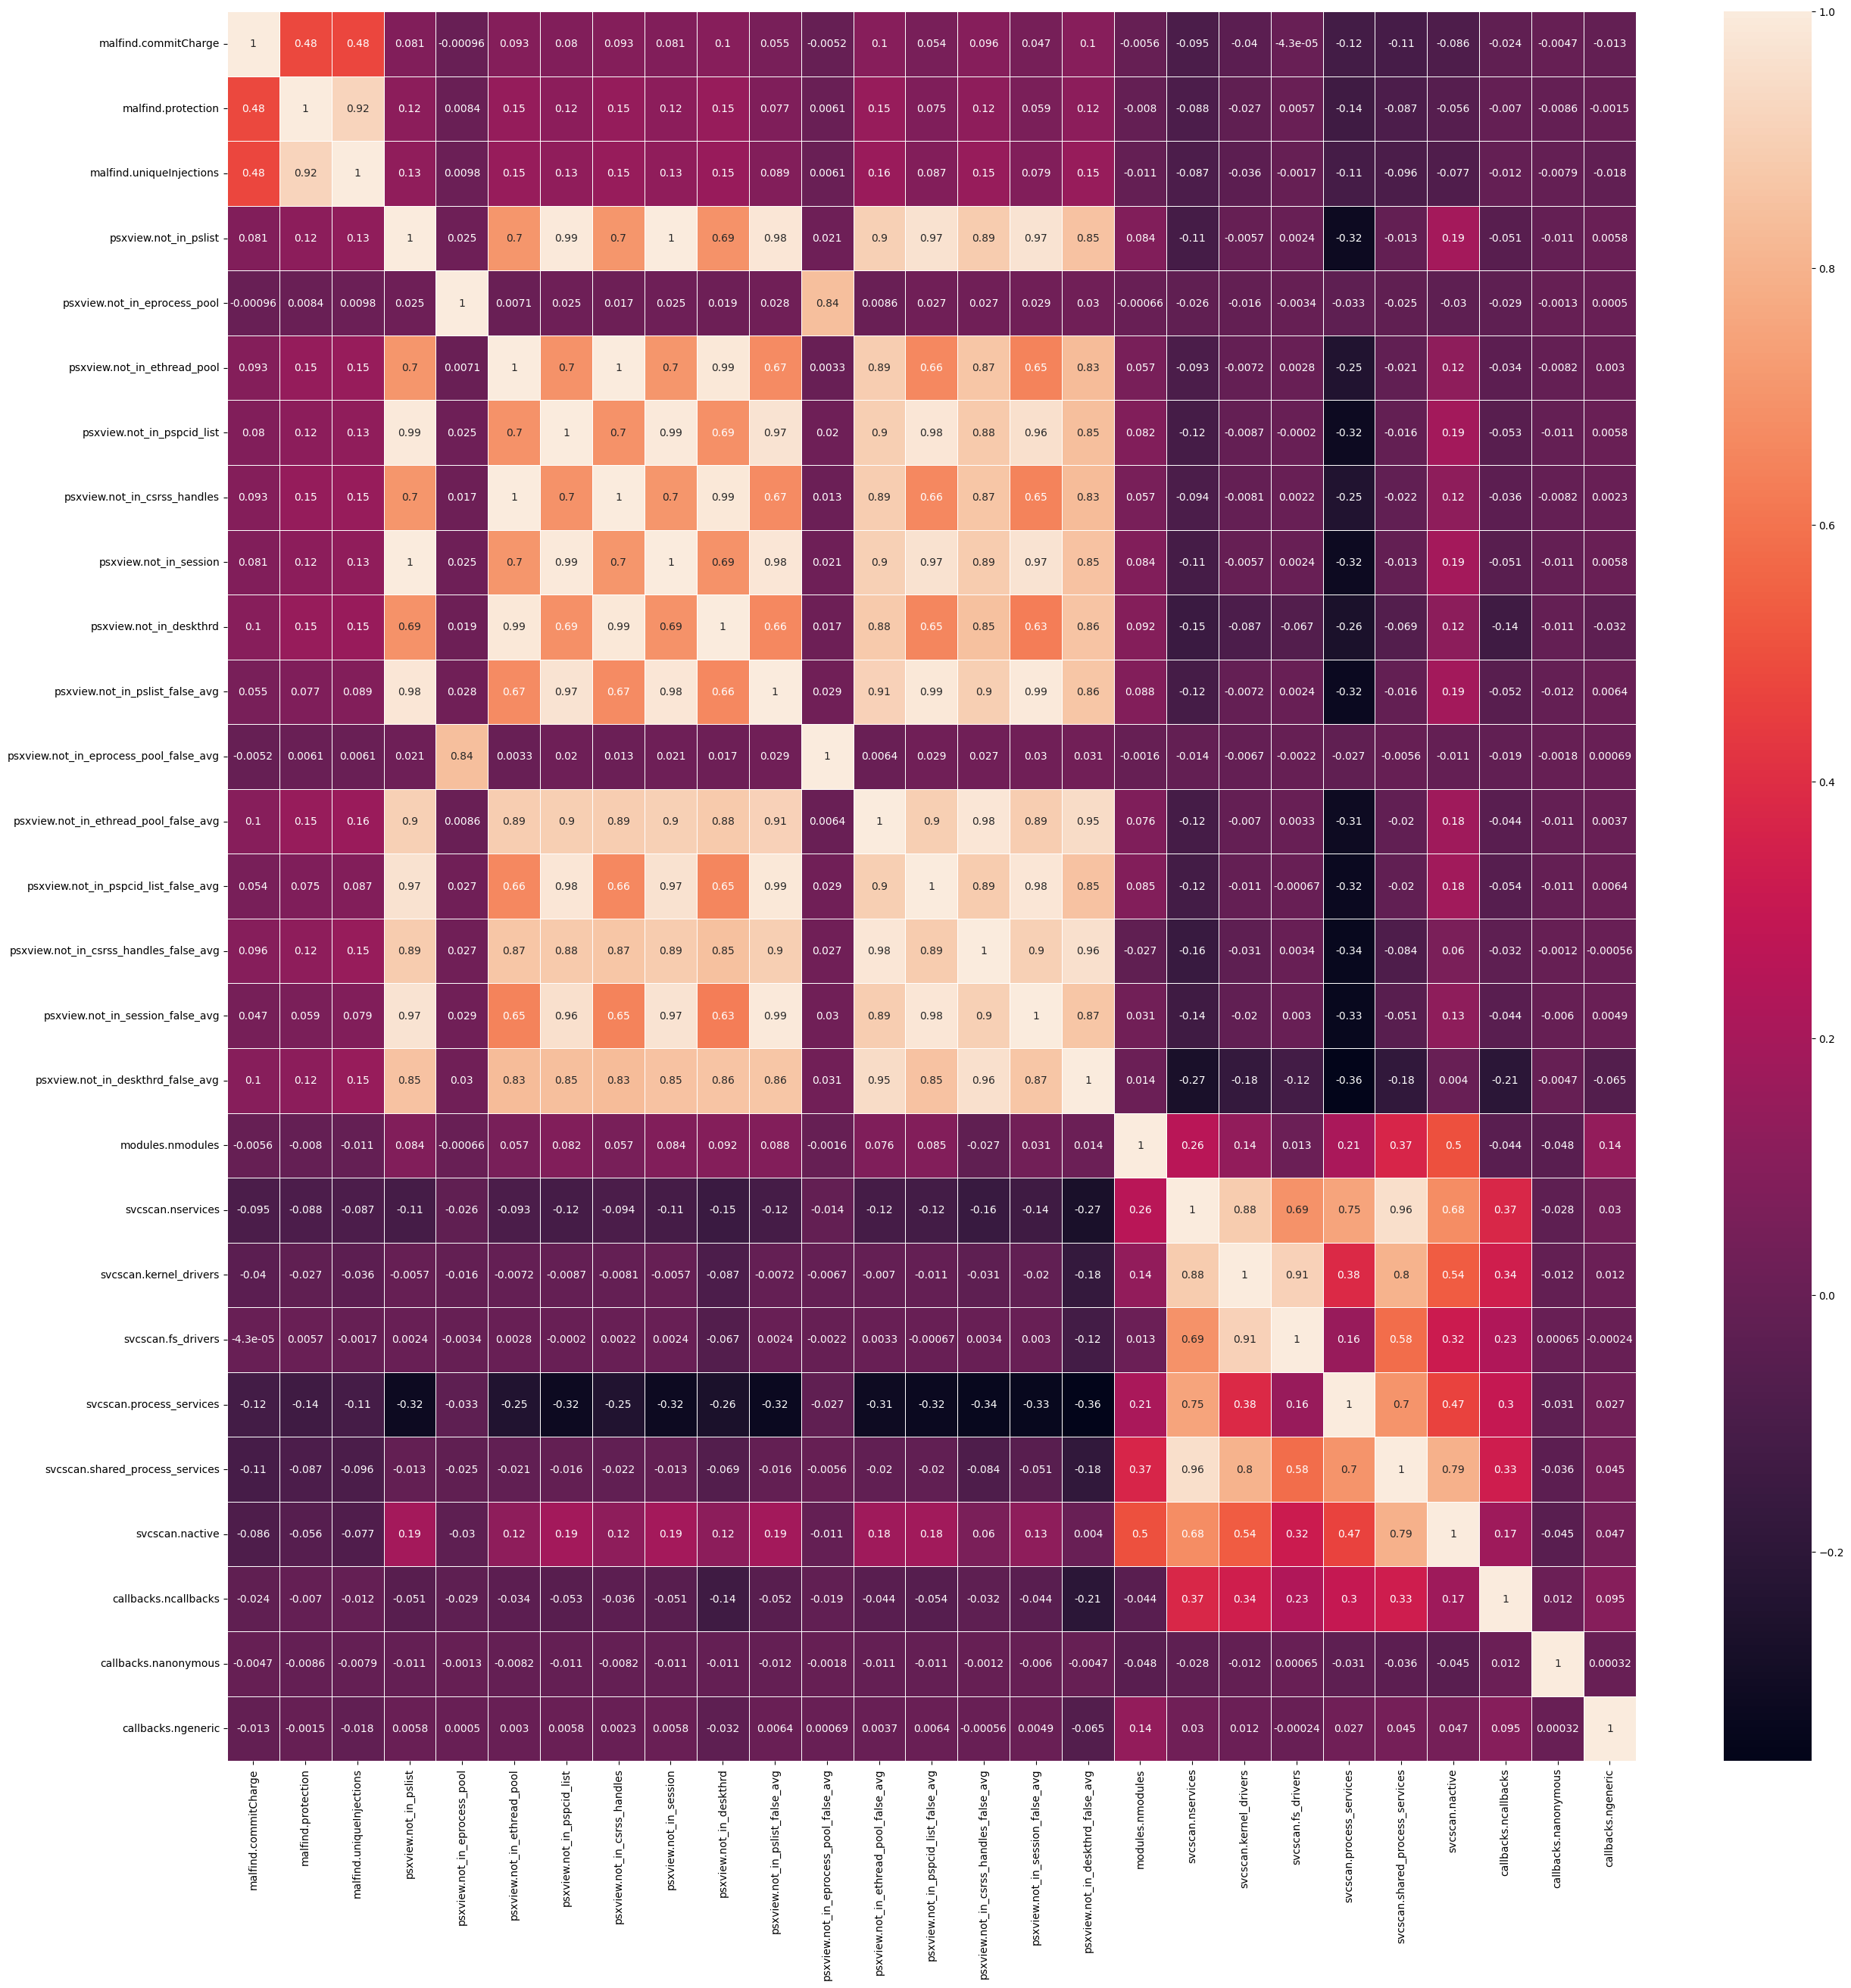

In [394]:
# Pearson's Corrrelation Plot with Seaborn
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(df[subset_2].corr(method='pearson'), annot=True, linewidths=.5, ax=ax);

There is a high positive correlation between:
* pslist.nproc and handles.ndesktop [0.8]
* pslist.nproc and handles.ndirectory [0.79]
* pslist.avg_threads and dlllist.avg_dlls_per_proc [0.9]
* pslist.avg_threads and svcscan.process_services [0.81]
* pslist.avg_handlers and handles.nhandles [0.97]
* pslist.avg_handlers and handles.avg_handles_per_proc [0.99]
* pslist.avg_handlers and handles.nfile [0.94]
* dlllist.ndlls and dlllist.avg_dlls_per_proc [0.78]
* ...

# Part 4 - Predictive Analysis

In this section, I will train a linear classifier and a non-linear classifier to detect malicious and benign connections.

## Experiment 1: Train Models with all the features

__Label Encoding__

Convert the 'Benign' class to 0 and the 'Malware' class to 1

In [395]:
mapping = {'Benign':0,
           'Malware':1}
df.Class = df.Class.map(mapping)
df.Class.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [396]:
# create a copy of the dataframe for the second experiment
df2 = df.copy()

In [397]:
df.to_csv('CleanedDataBeforeTraining.csv')

In [398]:
df.columns

Index(['pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.avg_handlers', 'dlllist.ndlls', 'dlllist.avg_dlls_per_proc',
       'handles.nhandles', 'handles.avg_handles_per_proc', 'handles.nfile',
       'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread',
       'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
       'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_mem',
       'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg',
       'ldrmodules.not_in_mem_avg', 'malfind.ninjections',
       'malfind.commitCharge', 'malfind.protection',
       'malfind.uniqueInjections', 'psxview.not_in_pslist',
       'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool',
       'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles',
       'psxview.not_in_session', 'psxview.not_in_deskthrd',
       'psxview.not_in_pslist_false_avg',
       'psxview.not_in_eproc

__Separate the features and target variable__

The target variable is the `Class` variable.

In [417]:
X = df.copy().drop(['category_new', 'type', 'Class'], axis=1)
z=df['category_new'].values
y = df.Class.values

display(X)
y
z
z[35000]

pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.avg_handlers  \
0                45            17           10.555556           202.844444   
1                47            19           11.531915           242.234043   
2                40            14           14.725000           288.225000   
3                32            13           13.500000           264.281250   
4                42            16           11.452381           281.333333   
...             ...           ...                 ...                  ...   
58591            37            15           10.108108           215.486487   
58592            37            14            9.945946           190.216216   
58593            38            15            9.842105           210.026316   
58594            37            15           10.243243           215.513513   
58595            38            15            9.868421           213.026316   

       dlllist.ndlls  dlllist.avg_dlls_per_proc  handles.nhandles  \
0               1694                  38.500000              9129   
1               2074                  44.127660             11385   
2               1932                  48.300000             11529   
3               1445                  45.156250              8457   
4               2067                  49.214286             11816   
...              ...                        ...               ...   
58591           1453                  39.270270              7973   
58592           1347                  36.405405              7038   
58593           1448                  38.105263              7982   
58594           1452                  39.243243              7974   
58595           1487                  39.131579              8095   

       handles.avg_handles_per_proc  handles.nfile  handles.nevent  \
0                        212.302326            670            3161   
1                        242.234043            840            3761   
2                        288.225000           1050            3996   
3                        264.281250            630            2961   
4                        281.333333            908            3834   
...                             ...            ...             ...   
58591                    215.486487            630            2819   
58592                    190.216216            603            2394   
58593                    215.729730            624            2816   
58594                    215.513513            632            2819   
58595                    213.026316            637            2843   

       handles.ndesktop  handles.nkey  handles.nthread  handles.ndirectory  \
0                    46           716              887                 104   
1                    51          1011             1030                 117   
2                    45           784             1241                 100   
3                    36           654              792                  83   
4                    45          1252              942                 103   
...                 ...           ...              ...                 ...   
58591                40           668              664                  92   
58592                39           555              624                  91   
58593                40           673              661                  92   
58594                40           668              667                  92   
58595                41           683              669                  94   

       handles.nsemaphore  handles.ntimer  handles.nsection  handles.nmutant  \
0                     671             125               184              257   
1                     766             148               337              394   
2                     645             138               369              338   
3                     567             127               186              242   
4                     825             135               375    

'Ransomware'

__Split Data into the training set and test set__

70% of the data will be used for training the models. While 30% will be used to evaluate the models.

In [400]:
from sklearn.model_selection import train_test_split

SEED = 20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=SEED, stratify=y)

# Check
print("Training set")
print("Training set size", X_train.shape)
display(X_train)
display(y_train)


print("Testing set")
print("Testing set size", X_test.shape)
display(X_test)
display(y_test)

Training set
Training set size (40643, 52)


pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.avg_handlers  \
36982            44            17            9.636364           200.931818   
48875            28            10           12.964286           260.107143   
53467            35            14           10.400000           215.400000   
57183            39            15           10.743590           217.384615   
55768            37            15           10.243243           215.054054   
...             ...           ...                 ...                  ...   
2764             42            12           13.316530           301.911126   
22016            50            18           11.985931           271.454189   
49923            38            15            9.815789           209.447368   
57132            44            17            9.795455           200.659091   
15985            42            12           13.297032           302.387573   

       dlllist.ndlls  dlllist.avg_dlls_per_proc  handles.nhandles  \
36982           1674                  38.045455              8841   
48875           1258                  44.928571              7283   
53467           1384                  39.542857              7539   
57183           1558                  39.948718              8478   
55768           1446                  39.081081              7957   
...              ...                        ...               ...   
2764            2194                  52.107325             12714   
22016           2375                  47.500000             13572   
49923           1446                  38.052632              7960   
57132           1630                  37.045455              8786   
15985           2177                  51.855969             12700   

       handles.avg_handles_per_proc  handles.nfile  handles.nevent  \
36982                    200.931818            671            3076   
48875                    260.107143            533            2606   
53467                    215.400000            627            2633   
57183                    217.384615            643            2968   
55768                    215.054054            631            2813   
...                             ...            ...             ...   
2764                     302.717002           1093            4469   
22016                    271.454189           1146            4749   
49923                    215.135135            624            2813   
57132                    204.325581            668            3078   
15985                    302.387573           1140            4506   

       handles.ndesktop  handles.nkey  handles.nthread  handles.ndirectory  \
36982                47           699              784                 109   
48875                31           549              646                  73   
53467                37           599              637                  88   
57183                42           655              776                  99   
55768                40           667              666                  92   
...                 ...           ...              ...                 ...   
2764                 46           941             1223                 105   
22016                56          1043             1264                 121   
49923                40           667              660                  92   
57132                47           682              784                 107   
15985                46           877             1224                 105   

       handles.nsemaphore  handles.ntimer  handles.nsection  handles.nmutant  \
36982                 653             126               182              269   
48875                 595             109               135              216   
53467                 572             107               138              223   
57183                 634             120               177              259   
55768                 596             113               161    

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

Testing set
Testing set size (17419, 52)


pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.avg_handlers  \
21543            31            11           13.703655           305.364025   
58064            41            16            9.853659           208.853658   
47128            40            15           10.650000           214.450000   
16592            40            12           13.308599           301.008599   
2763             42            17           11.608303           262.875666   
...             ...           ...                 ...                  ...   
560              40            12           13.725000           302.350000   
22204            66            18           10.938011           247.650504   
15933            40            12           12.700000           292.175287   
57302            44            17            9.590909           196.795455   
13364            40            12           12.731670           288.333983   

       dlllist.ndlls  dlllist.avg_dlls_per_proc  handles.nhandles  \
21543           1571                  50.677419              9467   
58064           1613                  39.341463              8563   
47128           1575                  39.375000              8578   
16592           2001                  50.025000             12040   
2763            1875                  44.390332             11104   
...              ...                        ...               ...   
560             2001                  50.025000             12094   
22204           2911                  44.394689             16274   
15933           1985                  49.625000             11687   
57302           1619                  36.795455              8589   
13364           1985                  49.038099             11674   

       handles.avg_handles_per_proc  handles.nfile  handles.nevent  \
21543                    315.576159            740            3196   
58064                    208.853658            649            2989   
47128                    214.450000            641            2987   
16592                    301.008599           1125            4340   
2763                     266.742647            898            3779   
...                             ...            ...             ...   
560                      302.350000           1126            4352   
22204                    264.126011           1440            5933   
15933                    292.175287           1106            4129   
57302                    204.500000            668            2996   
13364                    291.868663           1111            4090   

       handles.ndesktop  handles.nkey  handles.nthread  handles.ndirectory  \
21543                33           757              840                  82   
58064                44           675              727                 103   
47128                43           665              788                 102   
16592                44           795             1163                 101   
2763                 46           909              972                 103   
...                 ...           ...              ...                 ...   
560                  44           795             1195                 101   
22204                66          1116             1596                 141   
15933                44           803             1089                 101   
57302                46           686              755                 107   
13364                44           803             1109                 101   

       handles.nsemaphore  handles.ntimer  handles.nsection  handles.nmutant  \
21543                 685             123               262              344   
58064                 642             126               181              267   
47128                 638             123               179              260   
16592                 738             138               449              336   
2763                  736             131               370    

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

__Feature Scaling__

Apply normalization to the features to keep them on the same scale.

In [401]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
scaled_X_train = normalizer.fit_transform(X_train)
scaled_X_test = normalizer.transform(X_test)
display(scaled_X_train)
scaled_X_test

array([[0.10502283, 0.140625  , 0.52652083, ..., 0.91666667, 0.        ,
        1.        ],
       [0.03196347, 0.03125   , 0.74592234, ..., 0.97222222, 0.        ,
        1.        ],
       [0.06392694, 0.09375   , 0.57686545, ..., 0.94444444, 0.        ,
        1.        ],
       ...,
       [0.07762557, 0.109375  , 0.53834992, ..., 0.91666667, 0.        ,
        1.        ],
       [0.10502283, 0.140625  , 0.53700929, ..., 0.02777778, 0.        ,
        1.        ],
       [0.09589041, 0.0625    , 0.76785946, ..., 0.97222222, 0.        ,
        1.        ]])

array([[0.0456621 , 0.046875  , 0.79466708, ..., 0.97222222, 0.        ,
        1.        ],
       [0.0913242 , 0.125     , 0.54084653, ..., 0.91666667, 0.        ,
        1.        ],
       [0.08675799, 0.109375  , 0.59334732, ..., 0.94444444, 0.        ,
        1.        ],
       ...,
       [0.08675799, 0.0625    , 0.72849865, ..., 0.97222222, 0.        ,
        1.        ],
       [0.10502283, 0.140625  , 0.52352412, ..., 0.05555556, 0.        ,
        1.        ],
       [0.08675799, 0.0625    , 0.73058654, ..., 0.97222222, 0.        ,
        1.        ]])

__Define Custom Functions to Evaluate the Models__

In [402]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

def evaluate_model(y_val, y_pred):
    """Function to evaluate model and return the metric of the model
  
    It returns a dictionary with the classification metrics.
    """
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')
  
    result = {"accuracy_score": accuracy,
              "precision_score": precision,
              "recall_score": recall,
              "f1_score": f1}
    return result

def plot_confusion_matrix(y_val, y_pred, label):
    '''function to plot confusion matrix

    Args
    y_val: array. The validation set of the target variable.
    y_pred: array. Model's prediction.
    label: list. A list containing all the classes in the target variable

    Returns
    It returns a plot of the confusion matrix
    '''
    cm = confusion_matrix(y_val, y_pred)
    fig, ax = plt.subplots(figsize=(10,10))
    ConfusionMatrixDisplay(cm, display_labels=label).plot(ax=ax, values_format='', xticks_rotation='vertical')

# class labels
label = ['Benign', 'Malicious']

__Training Logistic Regression Model__

{'accuracy_score': 0.9963832596589931, 'precision_score': 0.9963834376844934, 'recall_score': 0.9963832596589931, 'f1_score': 0.9963832665728144}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8770
           1       1.00      1.00      1.00      8649

    accuracy                           1.00     17419
   macro avg       1.00      1.00      1.00     17419
weighted avg       1.00      1.00      1.00     17419



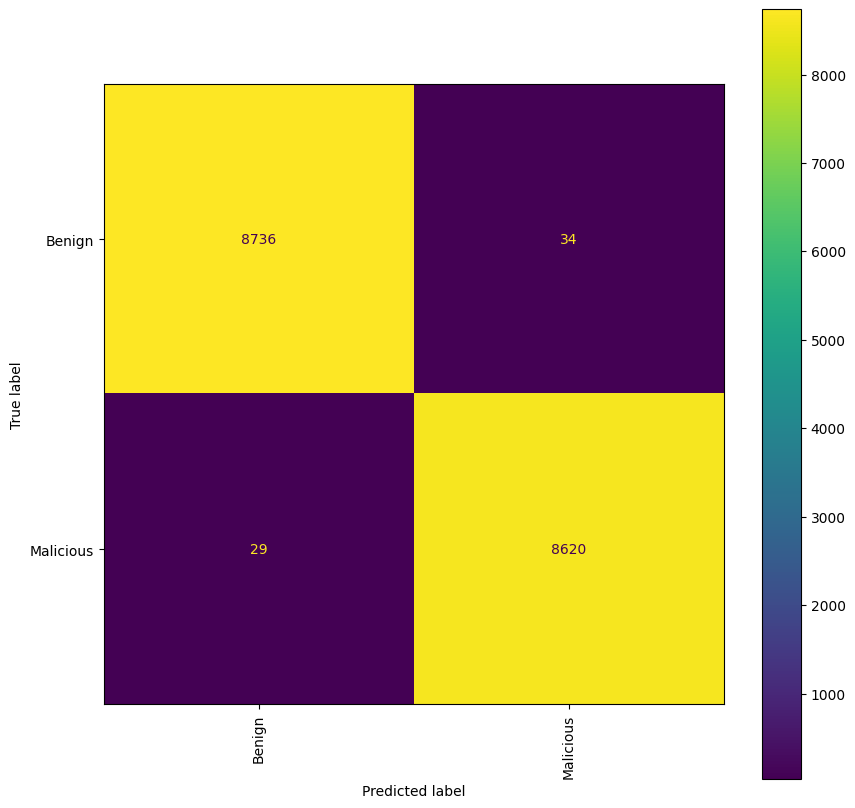

In [403]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(scaled_X_train, y_train)

# Evaluate model on the test set
lr_y_pred = lr_model.predict(scaled_X_test)

lr_test_result = evaluate_model(y_test, lr_y_pred)
print(lr_test_result)
print(classification_report(y_test, lr_y_pred))
plot_confusion_matrix(y_test, lr_y_pred, label)

__Training a Random Forest Model__

{'accuracy_score': 1.0, 'precision_score': 1.0, 'recall_score': 1.0, 'f1_score': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8770
           1       1.00      1.00      1.00      8649

    accuracy                           1.00     17419
   macro avg       1.00      1.00      1.00     17419
weighted avg       1.00      1.00      1.00     17419



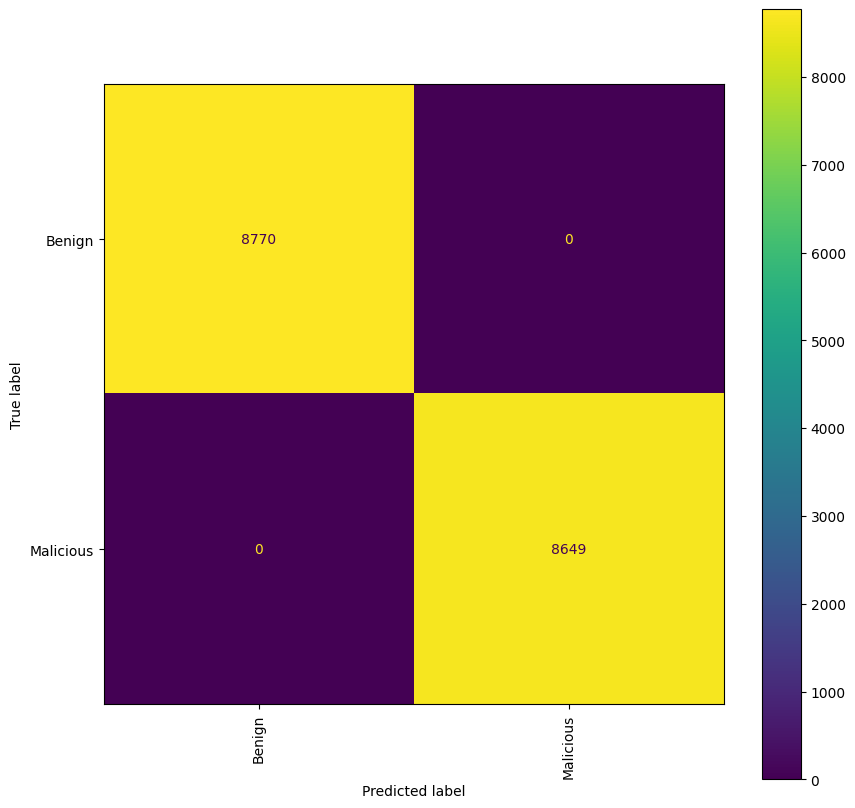

In [404]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=SEED)
rf_model.fit(scaled_X_train, y_train)

# Evaluate model on the test set
rf_y_pred = rf_model.predict(scaled_X_test)

rf_test_result = evaluate_model(y_test, rf_y_pred)
print(rf_test_result)
print(classification_report(y_test, rf_y_pred))
plot_confusion_matrix(y_test, rf_y_pred, label)

This model is overfitting. I will fine-tune the model using GridSearchCV to select the best hyperparameters for the random forest model.

Best accuracy score 99.99 %
Best Parameters: {'criterion': 'gini', 'n_estimators': 100}
{'accuracy_score': 1.0, 'precision_score': 1.0, 'recall_score': 1.0, 'f1_score': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8770
           1       1.00      1.00      1.00      8649

    accuracy                           1.00     17419
   macro avg       1.00      1.00      1.00     17419
weighted avg       1.00      1.00      1.00     17419



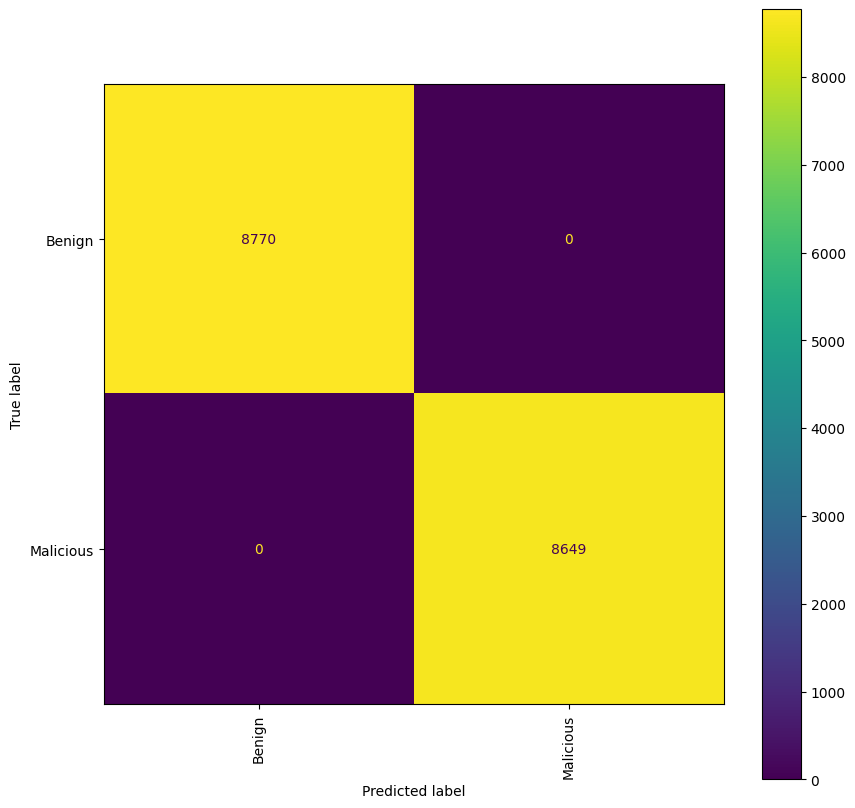

In [405]:
# Fine-Tune the Model
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestClassifier(random_state=SEED)

# setting different parameter combinations
parameters = [{'criterion': ['gini', 'entropy'],
               'n_estimators': np.arange(100,300,100)}
              ]
# n_jobs=-1 uses all the system's processors             
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(scaled_X_train, y_train)

# get the best accuracy score
best_acc = grid_search.best_score_

# get the parameters that gave the best score
best_parameters = grid_search.best_params_
rf_score = best_acc * 100
print("Best accuracy score {:.2f} %".format(rf_score))
print("Best Parameters:", best_parameters)
# extract the best random forest model
best_rf_model = grid_search.best_estimator_

# Evaluate model on the test set
rf_y_pred = best_rf_model.predict(scaled_X_test)

rf_test_result = evaluate_model(y_test, rf_y_pred)
print(rf_test_result)
print(classification_report(y_test, rf_y_pred))
plot_confusion_matrix(y_test, rf_y_pred, label)

{'accuracy_score': 1.0, 'precision_score': 1.0, 'recall_score': 1.0, 'f1_score': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8770
           1       1.00      1.00      1.00      8649

    accuracy                           1.00     17419
   macro avg       1.00      1.00      1.00     17419
weighted avg       1.00      1.00      1.00     17419



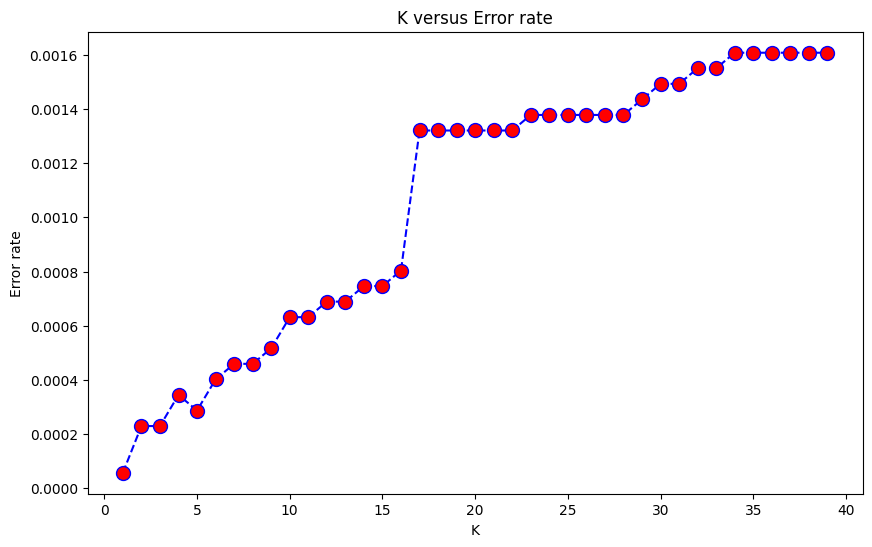

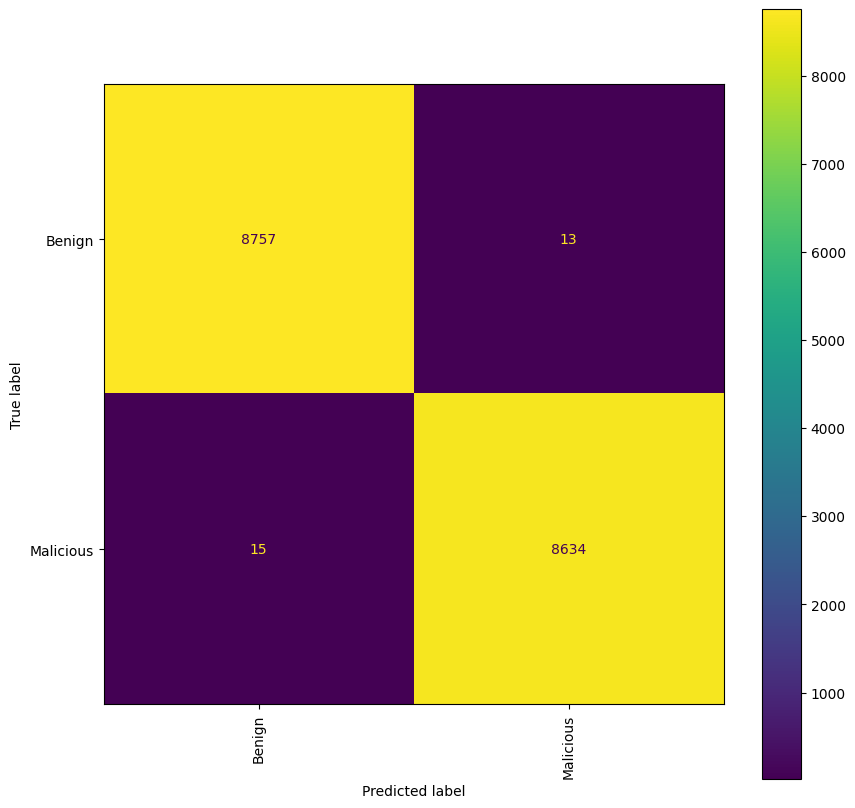

In [406]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train, y_train)
    pred_i = knn.predict(scaled_X_test)
    
    error_rate.append(np.mean(pred_i != y_test))
    
   
plt.figure(figsize=(10, 6))

plt.plot(range(1, 40), error_rate, color='blue', linestyle='--',
         markersize=10, markerfacecolor='red', marker='o')
plt.title('K versus Error rate')
plt.xlabel('K')
plt.ylabel('Error rate')
knn_y_pred = knn.predict(scaled_X_test)

knn_test_result = evaluate_model(y_test, knn_y_pred)
print(rf_test_result)
print(classification_report(y_test, knn_y_pred))
plot_confusion_matrix(y_test, knn_y_pred, label)

{'accuracy_score': 0.9998851828463172, 'precision_score': 0.9998852093905674, 'recall_score': 0.9998851828463172, 'f1_score': 0.9998851829363824}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8770
           1       1.00      1.00      1.00      8649

    accuracy                           1.00     17419
   macro avg       1.00      1.00      1.00     17419
weighted avg       1.00      1.00      1.00     17419



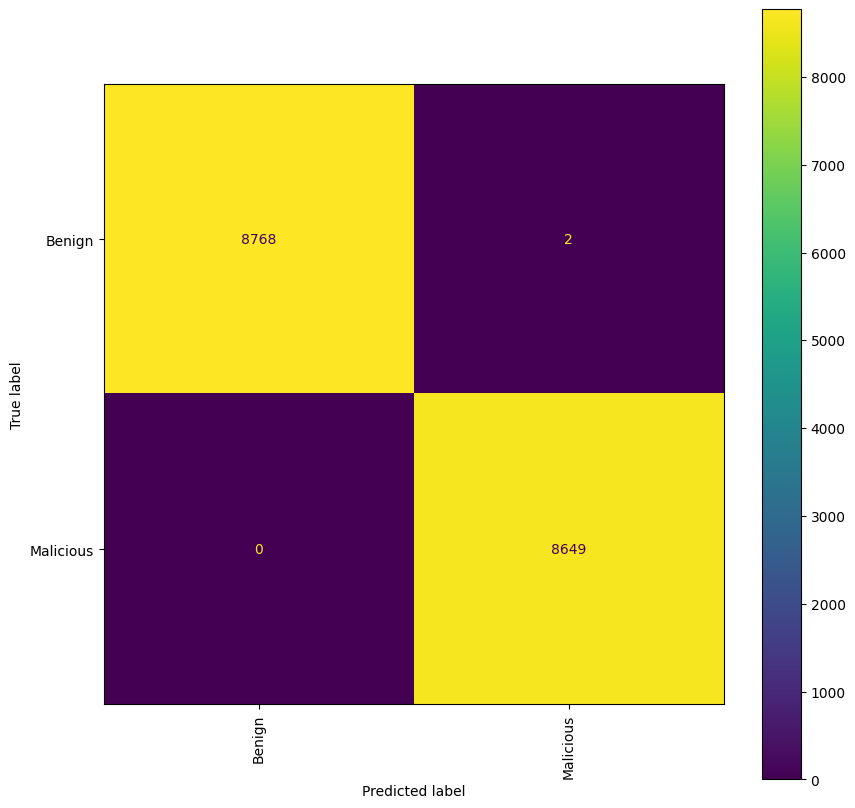

In [407]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(scaled_X_train, y_train)
clf_y_pred = clf.predict(scaled_X_test)

clf_test_result = evaluate_model(y_test, clf_y_pred)
print(clf_test_result)
print(classification_report(y_test, clf_y_pred))
plot_confusion_matrix(y_test, clf_y_pred, label)

{'accuracy_score': 0.9981055169642344, 'precision_score': 0.9981073891484383, 'recall_score': 0.9981055169642344, 'f1_score': 0.9981055023155188}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8770
           1       1.00      1.00      1.00      8649

    accuracy                           1.00     17419
   macro avg       1.00      1.00      1.00     17419
weighted avg       1.00      1.00      1.00     17419



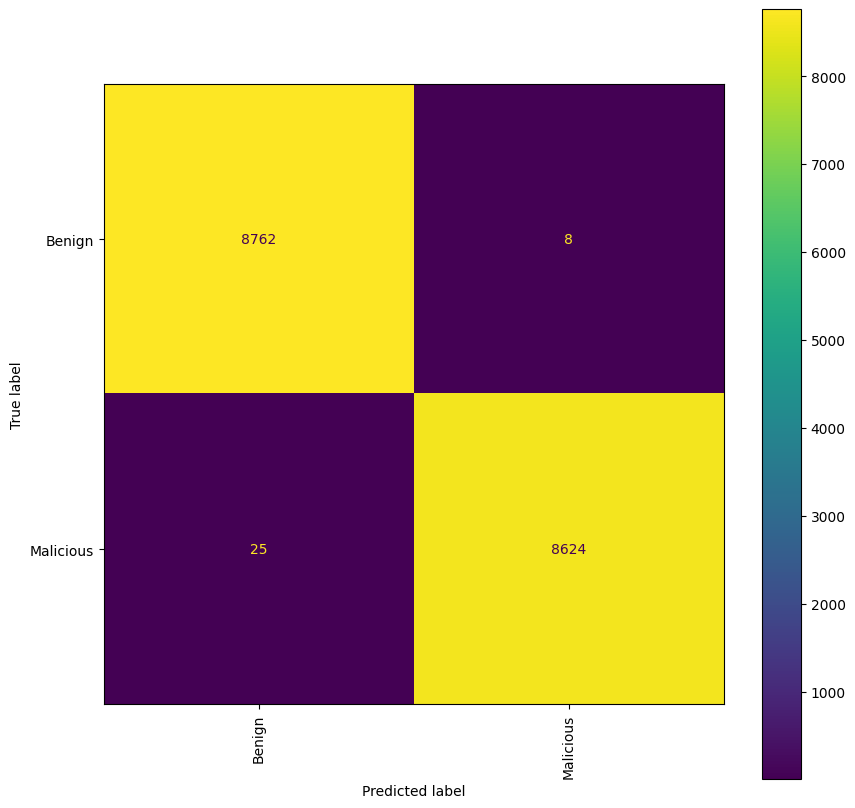

In [408]:
from sklearn import svm
svmtrain= svm.SVC(kernel='linear') 
# linear is the default kernel, you can use also rbf, poly and sigmoid

# training the classifier on the data
svmtrain.fit(scaled_X_train, y_train)
svm_y_pred = svmtrain.predict(scaled_X_test)
svm_test_result = evaluate_model(y_test, svm_y_pred)

print(svm_test_result)
print(classification_report(y_test, svm_y_pred))
plot_confusion_matrix(y_test, svm_y_pred, label)


[0 1 1 ... 0 1 0]
{'accuracy_score': 0.9927091107411448, 'precision_score': 0.9927352572264745, 'recall_score': 0.9927091107411448, 'f1_score': 0.9927091985437538}
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      8770
           1       0.99      1.00      0.99      8649

    accuracy                           0.99     17419
   macro avg       0.99      0.99      0.99     17419
weighted avg       0.99      0.99      0.99     17419



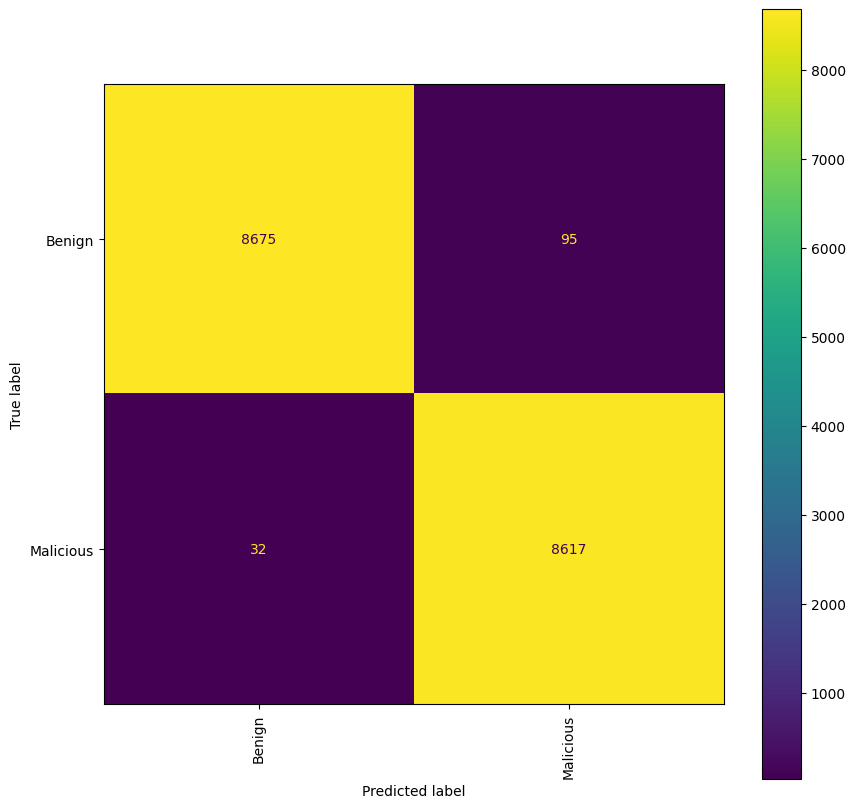

In [409]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# training the classifier on the data
gnb.fit(scaled_X_train, y_train)
gnb_y_pred = gnb.predict(scaled_X_test)
gnb_test_result = evaluate_model(y_test, gnb_y_pred)
print(gnb_y_pred)
print(gnb_test_result)
print(classification_report(y_test, gnb_y_pred))
plot_confusion_matrix(y_test, gnb_y_pred, label)


In [418]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
model = Sequential()
model.add(Dense(32, input_dim=23, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(scaled_X_train, y_train, epochs=2, batch_size=32)
ann_y_pred = model.predict(scaled_X_test).round()

np.round(abs(ann_y_pred))
print(ann_y_pred)
from sklearn.metrics import accuracy_score

# predict the labels of the test set

# calculate the accuracy
accuracy = accuracy_score(y_test, ann_y_pred)
print("Accuracy:", accuracy)
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix
# cm = confusion_matrix(y_test, ann_y_pred)
# print("Confusion Matrix:\n", cm)
# from sklearn.metrics import precision_score

# calculate the precision
# precision = precision_score(y_test, ann_y_pred, average='weighted')
# print("Precision:", precision)
# from sklearn.metrics import recall_score

# calculate the recall
# recall = recall_score(y_test, ann_y_pred, average='weighted')
# print("Recall:", recall)
ann_test_result = evaluate_model(y_test, ann_y_pred)

print(ann_test_result)
print(classification_report(y_test, ann_y_pred))
plot_confusion_matrix(y_test, ann_y_pred, label)


Epoch 1/2


ValueError: in user code:

    File "c:\Users\Atilim\miniconda3\envs\atilim\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Atilim\miniconda3\envs\atilim\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Atilim\miniconda3\envs\atilim\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Atilim\miniconda3\envs\atilim\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\Atilim\miniconda3\envs\atilim\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Atilim\miniconda3\envs\atilim\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_54" is incompatible with the layer: expected shape=(None, 23), found shape=(None, 52, 1)


c:\Users\Atilim\miniconda3\envs\atilim\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[0 1 1 ... 0 1 0]
{'accuracy_score': 0.9997703656926344, 'precision_score': 0.9997703916815224, 'recall_score': 0.9997703656926344, 'f1_score': 0.9997703655064487}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8770
           1       1.00      1.00      1.00      8649

    accuracy                           1.00     17419
   macro avg       1.00      1.00      1.00     17419
weighted avg       1.00      1.00      1.00     17419



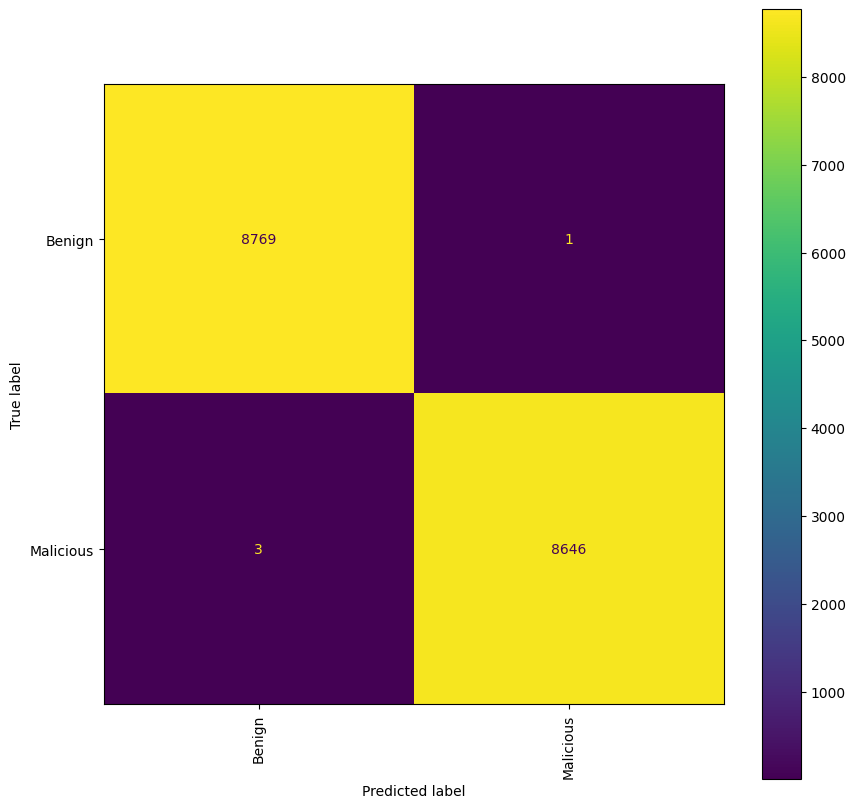

In [262]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(scaled_X_train, y_train)
#ann_test_result = evaluate_model(y_test, ann_y_pred)
mlp_y_pred = mlp.predict(scaled_X_test).round()

mlp_test_result = evaluate_model(y_test, mlp_y_pred)
print(mlp_y_pred)
print(mlp_test_result)
print(classification_report(y_test, mlp_y_pred))
plot_confusion_matrix(y_test, mlp_y_pred, label)

__Display the Top 10 Important Features__

545/545 [==============================] - 3s 6ms/step
Accuracy: 98.23%
Precision: 98.03%
Recall: 98.42%
F1 score: 0.98
[[False]
 [ True]
 [ True]
 ...
 [False]
 [ True]
 [False]]
{'accuracy_score': 0.982318158332855, 'precision_score': 0.9823259881895848, 'recall_score': 0.982318158332855, 'f1_score': 0.9823183307141197}
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8770
           1       0.98      0.98      0.98      8649

    accuracy                           0.98     17419
   macro avg       0.98      0.98      0.98     17419
weighted avg       0.98      0.98      0.98     17419



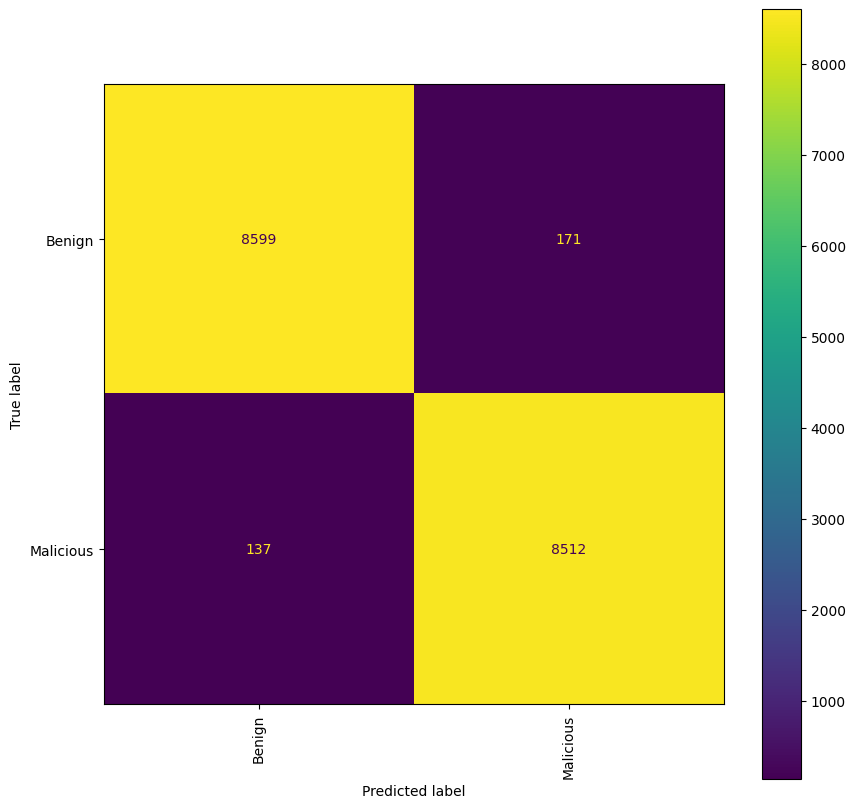

In [263]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# define the model
model = Sequential()
model.add(LSTM(32, input_shape=(52,1)))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# reshape X_train and y_train for model input
scaled_X_train = scaled_X_train.reshape((scaled_X_train.shape[0], scaled_X_train.shape[1], 1))
y_train = y_train.reshape((y_train.shape[0], 1))

# fit the model to the training data
model.fit(scaled_X_train, y_train, epochs=1, batch_size=32)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# make predictions on the test set
y_pred = model.predict(scaled_X_test)
y_pred = (y_pred > 0.5) # threshold the predictions

# calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (acc * 100))

# calculate precision
prec = precision_score(y_test, y_pred)
print("Precision: %.2f%%" % (prec * 100))

# calculate recall
rec = recall_score(y_test, y_pred)
print("Recall: %.2f%%" % (rec * 100))

# calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score: %.2f" % f1)

test_result = evaluate_model(y_test, y_pred)
print(y_pred)
print(test_result)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, label)

In [411]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
scaled_X_train = normalizer.fit_transform(X_train)
scaled_X_test = normalizer.transform(X_test)
display(scaled_X_train)
scaled_X_test
print(scaled_X_train.shape)
print(scaled_X_test.shape)
print(y_test.shape)

array([[0.10502283, 0.140625  , 0.52652083, ..., 0.91666667, 0.        ,
        1.        ],
       [0.03196347, 0.03125   , 0.74592234, ..., 0.97222222, 0.        ,
        1.        ],
       [0.06392694, 0.09375   , 0.57686545, ..., 0.94444444, 0.        ,
        1.        ],
       ...,
       [0.07762557, 0.109375  , 0.53834992, ..., 0.91666667, 0.        ,
        1.        ],
       [0.10502283, 0.140625  , 0.53700929, ..., 0.02777778, 0.        ,
        1.        ],
       [0.09589041, 0.0625    , 0.76785946, ..., 0.97222222, 0.        ,
        1.        ]])

(40643, 52)
(17419, 52)
(17419,)


545/545 [==============================] - 3s 5ms/step
Accuracy: 99.09%
Precision: 98.75%
Recall: 99.42%
F1 score: 0.99
[[False]
 [ True]
 [ True]
 ...
 [False]
 [ True]
 [False]]
{'accuracy_score': 0.9908720362822205, 'precision_score': 0.9908949919070048, 'recall_score': 0.9908720362822205, 'f1_score': 0.990872146328831}
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8770
           1       0.99      0.99      0.99      8649

    accuracy                           0.99     17419
   macro avg       0.99      0.99      0.99     17419
weighted avg       0.99      0.99      0.99     17419



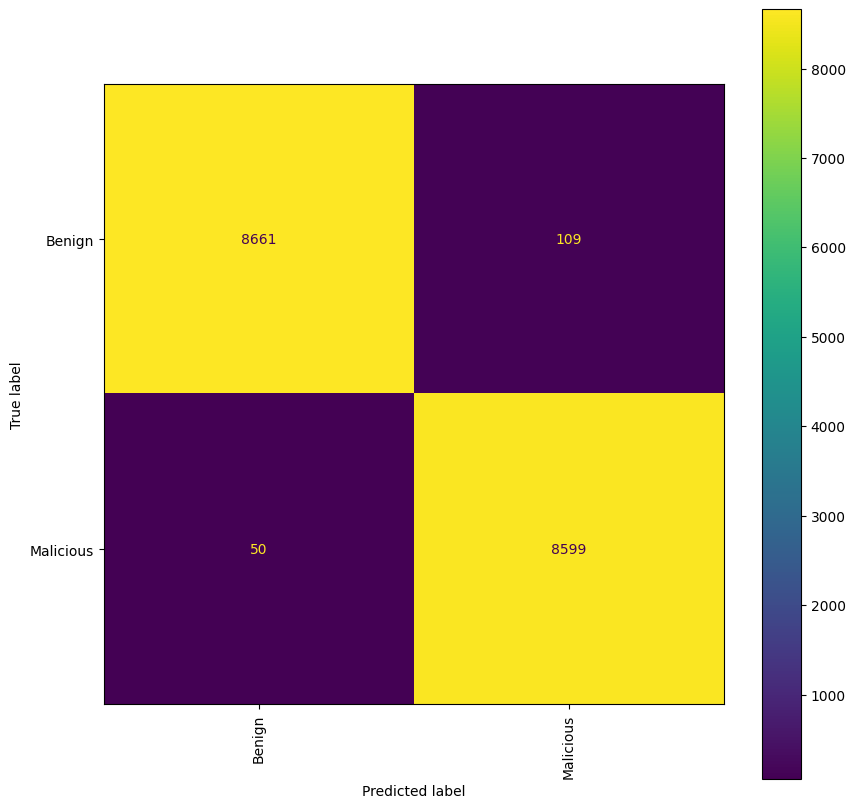

In [267]:
from keras.models import Sequential
from keras.layers import GRU, Dense

# define the model
grumodel = Sequential()
grumodel.add(GRU(32, input_shape=(52,1)))
grumodel.add(Dense(1, activation='sigmoid'))

# compile the model
grumodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# reshape X_train and y_train for model input
scaled_X_train = scaled_X_train.reshape((scaled_X_train.shape[0], scaled_X_train.shape[1], 1))
y_train = y_train.reshape((y_train.shape[0], 1))

# fit the model to the training data
grumodel.fit(scaled_X_train, y_train, epochs=1, batch_size=32)
# make predictions on the test set
y_pred = grumodel.predict(scaled_X_test)
y_pred = (y_pred > 0.5) # threshold the predictions

# calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (acc * 100))

# calculate precision
prec = precision_score(y_test, y_pred)
print("Precision: %.2f%%" % (prec * 100))

# calculate recall
rec = recall_score(y_test, y_pred)
print("Recall: %.2f%%" % (rec * 100))

# calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score: %.2f" % f1)

test_result = evaluate_model(y_test, y_pred)
print(y_pred)
print(test_result)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, label)

545/545 [==============================] - 1s 2ms/step - loss: 0.0188 - accuracy: 0.9952
Test accuracy: 0.995177686214447
545/545 [==============================] - 1s 2ms/step
Accuracy: 99.52%
Precision: 99.62%
Recall: 99.41%
F1 score: 1.00
[[False]
 [ True]
 [ True]
 ...
 [False]
 [ True]
 [False]]
{'accuracy_score': 0.9951776795453241, 'precision_score': 0.9951797255260847, 'recall_score': 0.9951776795453241, 'f1_score': 0.9951776397781628}
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      8770
           1       1.00      0.99      1.00      8649

    accuracy                           1.00     17419
   macro avg       1.00      1.00      1.00     17419
weighted avg       1.00      1.00      1.00     17419



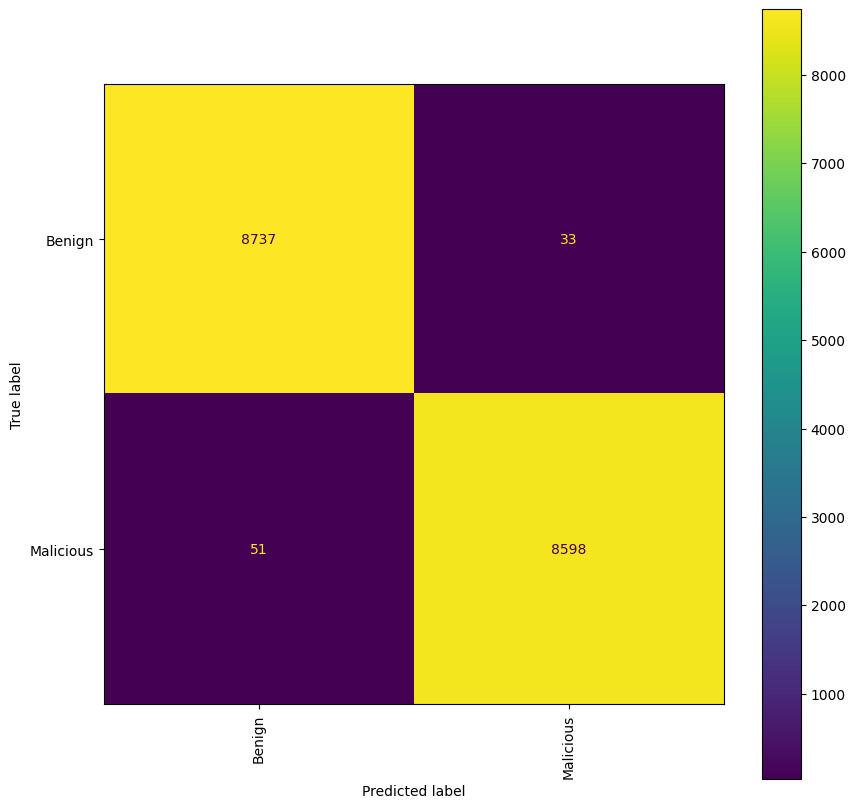

In [303]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten

# Define model architecture
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(52, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit model to training data
model.fit(scaled_X_train, y_train, epochs=1, batch_size=32)

# Evaluate model on test data
test_loss, test_acc = model.evaluate(scaled_X_test, y_test)
print('Test accuracy:', test_acc)

y_pred = model.predict(scaled_X_test)
y_pred = (y_pred > 0.5) # threshold the predictions

# calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (acc * 100))

# calculate precision
prec = precision_score(y_test, y_pred)
print("Precision: %.2f%%" % (prec * 100))

# calculate recall
rec = recall_score(y_test, y_pred)
print("Recall: %.2f%%" % (rec * 100))

# calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score: %.2f" % f1)

test_result = evaluate_model(y_test, y_pred)
print(y_pred)
print(test_result)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, label)

545/545 [==============================] - 2s 3ms/step
Accuracy: 97.32%
Precision: 94.93%
Recall: 99.94%
F1 score: 0.97
[[False]
 [ True]
 [ True]
 ...
 [False]
 [ True]
 [False]]
{'accuracy_score': 0.9731901946150755, 'precision_score': 0.9745055043423366, 'recall_score': 0.9731901946150755, 'f1_score': 0.9731766219753474}
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      8770
           1       0.95      1.00      0.97      8649

    accuracy                           0.97     17419
   macro avg       0.97      0.97      0.97     17419
weighted avg       0.97      0.97      0.97     17419



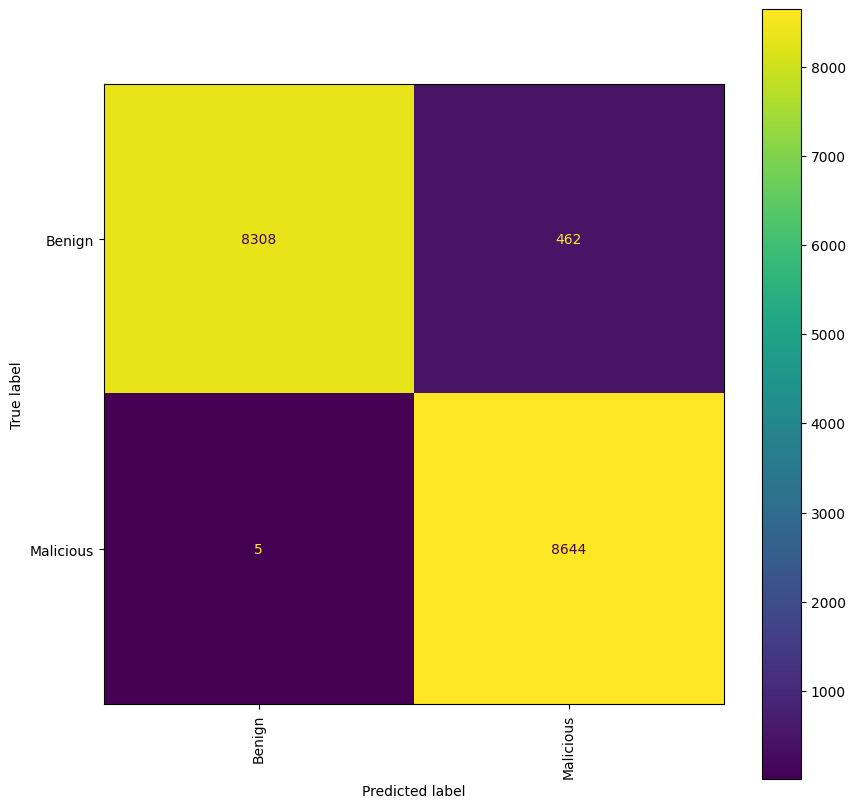

In [412]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# define the model
model = Sequential()
model.add(SimpleRNN(32, input_shape=(52,1)))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# reshape X_train and y_train for model input
scaled_X_train = scaled_X_train.reshape((scaled_X_train.shape[0], scaled_X_train.shape[1], 1))
y_train = y_train.reshape((y_train.shape[0], 1))

# fit the model to the training data
model.fit(scaled_X_train, y_train, epochs=1, batch_size=32)
y_pred = model.predict(scaled_X_test)
y_pred = (y_pred > 0.5) # threshold the predictions

# calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (acc * 100))

# calculate precision
prec = precision_score(y_test, y_pred)
print("Precision: %.2f%%" % (prec * 100))

# calculate recall
rec = recall_score(y_test, y_pred)
print("Recall: %.2f%%" % (rec * 100))

# calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score: %.2f" % f1)

test_result = evaluate_model(y_test, y_pred)
print(y_pred)
print(test_result)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, label)

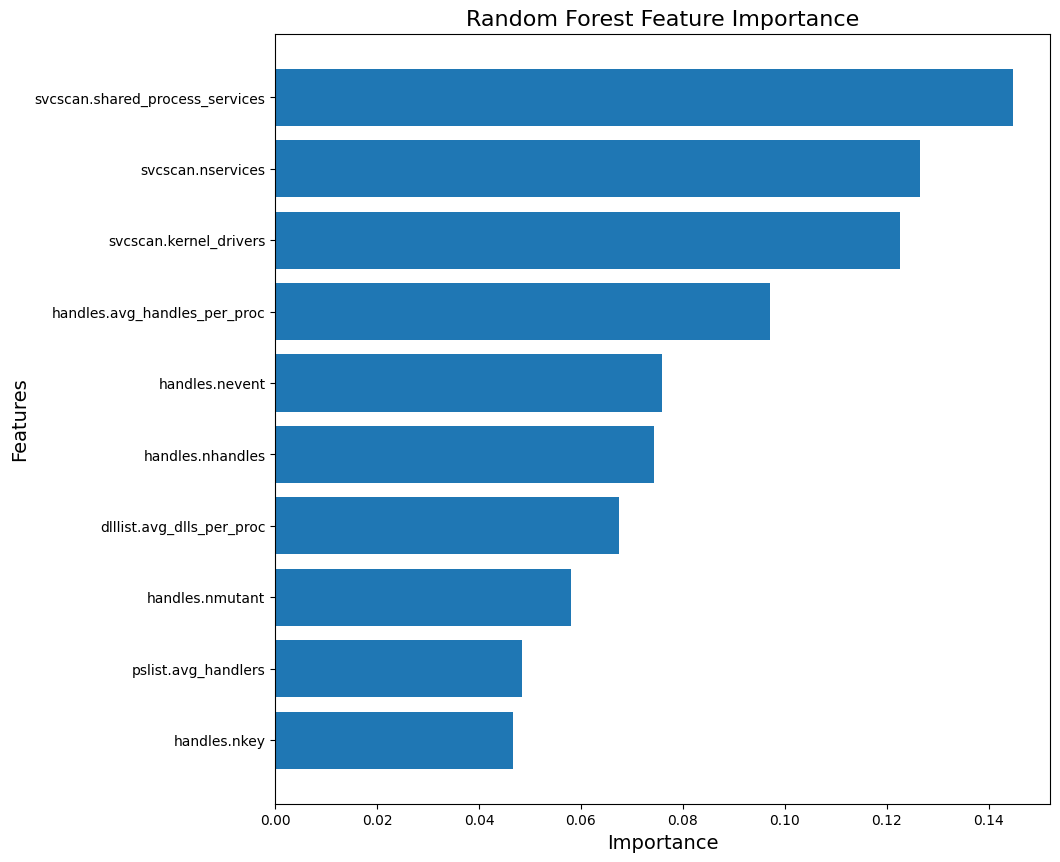

In [122]:
# sort the most important feature based on index
sorted_idx = best_rf_model.feature_importances_.argsort()

fig = plt.figure(figsize=(10, 10))
plt.barh(X_train.columns[sorted_idx][-10:], best_rf_model.feature_importances_[sorted_idx][-10:])
plt.title("Random Forest Feature Importance", fontsize=16)
plt.ylabel("Features", fontsize=14)
plt.xlabel('Importance', fontsize=14);

In [123]:
top_features = list(X_train.columns[sorted_idx][-10:])
top_features.reverse()
print(top_features)

['svcscan.shared_process_services', 'svcscan.nservices', 'svcscan.kernel_drivers', 'handles.avg_handles_per_proc', 'handles.nevent', 'handles.nhandles', 'dlllist.avg_dlls_per_proc', 'handles.nmutant', 'pslist.avg_handlers', 'handles.nkey']


__Visualize the Results__

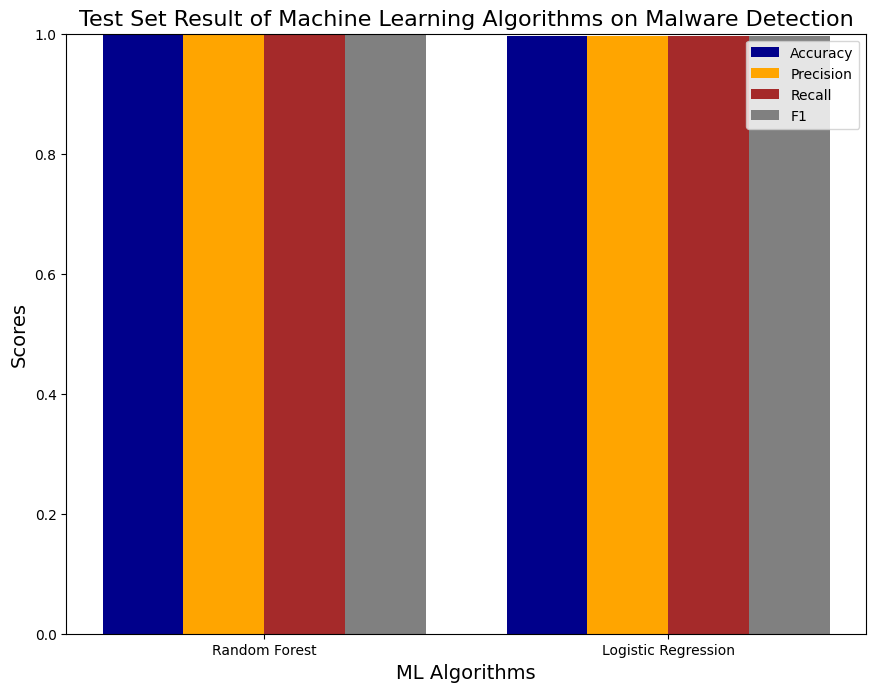

In [124]:
# Create list for accuracy, precision, recall and f1-score of each ml algorithm
accuracy_scores = [rf_test_result['accuracy_score'],
                   lr_test_result['accuracy_score']
                   ]

precision_scores = [rf_test_result['precision_score'],
                    lr_test_result['precision_score']]

recall_scores = [rf_test_result['recall_score'],
                 lr_test_result['recall_score']]

f1_scores = [rf_test_result['f1_score'],
             lr_test_result['f1_score']]

models = ["Random Forest", "Logistic Regression"]

# 3 is the number of models used
X = np.arange(2)
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, accuracy_scores, color = 'darkblue', width = 0.2)
ax.bar(X + 0.20, precision_scores, color = 'orange', width = 0.2)
ax.bar(X + 0.40, recall_scores, color = 'brown', width = 0.2)
ax.bar(X + 0.60, f1_scores, color = 'gray', width = 0.2)
plt.xticks(X+0.30, models)
plt.ylim(0, 1)
plt.xlabel("ML Algorithms", fontsize=14)
plt.ylabel("Scores", fontsize=14)
plt.title('Test Set Result of Machine Learning Algorithms on Malware Detection', fontsize=16)
plt.legend(["Accuracy", "Precision", "Recall", "F1"]);

## Experiment 2: Train Models without Correlated Features

__Drop Correlated Features__

In [125]:
# create empty set for correlated features
correlated_features = set()
correlation_matrix = df.corr()

# get features whose correlation is greater than 0.9
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            corr = correlation_matrix.columns[i]
            correlated_features.add(corr)

print('There are {} correlated features'.format(len(correlated_features)))
print(correlated_features)

C:\Users\Atilim\AppData\Local\Temp\ipykernel_22256\1543330216.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


There are 30 correlated features
{'psxview.not_in_session', 'psxview.not_in_pslist_false_avg', 'handles.avg_handles_per_proc', 'handles.nevent', 'psxview.not_in_csrss_handles', 'svcscan.shared_process_services', 'malfind.protection', 'handles.ntimer', 'Class', 'handles.nhandles', 'psxview.not_in_deskthrd', 'ldrmodules.not_in_mem_avg', 'psxview.not_in_deskthrd_false_avg', 'malfind.uniqueInjections', 'psxview.not_in_pspcid_list', 'psxview.not_in_ethread_pool_false_avg', 'psxview.not_in_pspcid_list_false_avg', 'psxview.not_in_session_false_avg', 'handles.ndirectory', 'ldrmodules.not_in_load', 'ldrmodules.not_in_mem', 'dlllist.avg_dlls_per_proc', 'psxview.not_in_csrss_handles_false_avg', 'handles.nsemaphore', 'ldrmodules.not_in_init_avg', 'ldrmodules.not_in_init', 'handles.nmutant', 'handles.nfile', 'svcscan.fs_drivers', 'handles.nthread'}


In [126]:
print(df2.shape)
df2.drop(correlated_features, axis=1, inplace=True)
# test
df2.shape

(58062, 55)


(58062, 25)

In [127]:
df2.head()

pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.avg_handlers  \
0            45            17           10.555556           202.844444   
1            47            19           11.531915           242.234043   
2            40            14           14.725000           288.225000   
3            32            13           13.500000           264.281250   
4            42            16           11.452381           281.333333   

   dlllist.ndlls  handles.ndesktop  handles.nkey  handles.nsection  \
0           1694                46           716               184   
1           2074                51          1011               337   
2           1932                45           784               369   
3           1445                36           654               186   
4           2067                45          1252               375   

   ldrmodules.not_in_load_avg  malfind.ninjections  malfind.commitCharge  \
0                    0.030372                    5                    21   
1                    0.036167                   12                    77   
2                    0.026114                    5                     6   
3                    0.021483                    2                     2   
4                    0.047820                   12                    77   

   psxview.not_in_pslist  psxview.not_in_eprocess_pool  \
0                      2                             0   
1                      0                             0   
2                      0                             0   
3                      0                             0   
4                      4                             0   

   psxview.not_in_ethread_pool  psxview.not_in_eprocess_pool_false_avg  \
0                            3                                     0.0   
1                            0                                     0.0   
2                            0                                     0.0   
3                            0                                     0.0   
4                            4                                     0.0   

   modules.nmodules  svcscan.nservices  svcscan.kernel_drivers  \
0               138                389                     221   
1               138                392                     222   
2               137                395                     222   
3               138                395                     222   
4               138                392                     222   

   svcscan.process_services  svcscan.nactive  callbacks.ncallbacks  \
0                        24              121                    87   
1                        24              122                    87   
2                        27              120                    88   
3                        27              120                    88   
4                        24              124                    87   

   callbacks.nanonymous  callbacks.ngeneric category_new  type  
0                     0                   8       Benign  None  
1                     0                   8       Benign  None  
2                     0                   8       Benign  None  
3                     0                   8       Benign  None  
4                     0                   8       Benign  None

In [128]:
df2.columns

Index(['pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.avg_handlers', 'dlllist.ndlls', 'handles.ndesktop',
       'handles.nkey', 'handles.nsection', 'ldrmodules.not_in_load_avg',
       'malfind.ninjections', 'malfind.commitCharge', 'psxview.not_in_pslist',
       'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool',
       'psxview.not_in_eprocess_pool_false_avg', 'modules.nmodules',
       'svcscan.nservices', 'svcscan.kernel_drivers',
       'svcscan.process_services', 'svcscan.nactive', 'callbacks.ncallbacks',
       'callbacks.nanonymous', 'callbacks.ngeneric', 'category_new', 'type'],
      dtype='object')

__Separate the features and target variable__

The target variable is the `Class` variable.

In [129]:
X = df2.copy().drop(['category_new', 'type','Class'], axis=1)
y = df2.Class.values

display(X)
y

KeyError: "['Class'] not found in axis"

__Split Data into the training set and test set__

70% of the data will be used for training the models. While 30% will be used to evaluate the models.

In [ ]:
from sklearn.model_selection import train_test_split

SEED = 20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=SEED, stratify=y)

# Check
print("Training set")
print("Training set size", X_train.shape)
display(X_train)
display(y_train)


print("Testing set")
print("Testing set size", X_test.shape)
display(X_test)
display(y_test)

Training set
Training set size (40643, 23)


pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.avg_handlers  \
36982            44            17            9.636364           200.931818   
48875            28            10           12.964286           260.107143   
53467            35            14           10.400000           215.400000   
57183            39            15           10.743590           217.384615   
55768            37            15           10.243243           215.054054   
...             ...           ...                 ...                  ...   
2764             42            12           13.316530           301.911126   
22016            50            18           11.985931           271.454189   
49923            38            15            9.815789           209.447368   
57132            44            17            9.795455           200.659091   
15985            42            12           13.297032           302.387573   

       dlllist.ndlls  handles.ndesktop  handles.nkey  handles.nsection  \
36982           1674                47           699               182   
48875           1258                31           549               135   
53467           1384                37           599               138   
57183           1558                42           655               177   
55768           1446                40           667               161   
...              ...               ...           ...               ...   
2764            2194                46           941               416   
22016           2375                56          1043               461   
49923           1446                40           667               160   
57132           1630                47           682               181   
15985           2177                46           877               414   

       ldrmodules.not_in_load_avg  malfind.ninjections  malfind.commitCharge  \
36982                    0.029582                    4                     4   
48875                    0.022551                    2                     2   
53467                    0.030561                    2                     2   
57183                    0.028696                    3                     3   
55768                    0.029472                    3                     3   
...                           ...                  ...                   ...   
2764                     0.040050                    6                     7   
22016                    0.043621                    8                    10   
49923                    0.029372                    3                     3   
57132                    0.043152                    3                     3   
15985                    0.036532                    5                     6   

       psxview.not_in_pslist  psxview.not_in_eprocess_pool  \
36982                      0                             0   
48875                      0                             0   
53467                      2                             0   
57183                      3                             0   
55768                      0                             0   
...                      ...                           ...   
2764                       0                             0   
22016                      2                             0   
49923                      3                             0   
57132                      0                             0   
15985                      1                             0   

       psxview.not_in_ethread_pool  psxview.not_in_eprocess_pool_false_avg  \
36982                            0                                     0.0   
48875                            0                                     0.0   
53467                            2                                     0.0   
57183                            3                                     0.0   
55768                            0                                     0.0   
...    

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

Testing set
Testing set size (17419, 23)


pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.avg_handlers  \
21543            31            11           13.703655           305.364025   
58064            41            16            9.853659           208.853658   
47128            40            15           10.650000           214.450000   
16592            40            12           13.308599           301.008599   
2763             42            17           11.608303           262.875666   
...             ...           ...                 ...                  ...   
560              40            12           13.725000           302.350000   
22204            66            18           10.938011           247.650504   
15933            40            12           12.700000           292.175287   
57302            44            17            9.590909           196.795455   
13364            40            12           12.731670           288.333983   

       dlllist.ndlls  handles.ndesktop  handles.nkey  handles.nsection  \
21543           1571                33           757               262   
58064           1613                44           675               181   
47128           1575                43           665               179   
16592           2001                44           795               449   
2763            1875                46           909               370   
...              ...               ...           ...               ...   
560             2001                44           795               452   
22204           2911                66          1116               606   
15933           1985                44           803               435   
57302           1619                46           686               183   
13364           1985                44           803               431   

       ldrmodules.not_in_load_avg  malfind.ninjections  malfind.commitCharge  \
21543                    0.036152                    3                     4   
58064                    0.027190                    3                     3   
47128                    0.028395                    3                     3   
16592                    0.032357                    3                     4   
2763                     0.041367                    4                     5   
...                           ...                  ...                   ...   
560                      0.032357                    3                     4   
22204                    0.036042                    9                    47   
15933                    0.033126                    3                     4   
57302                    0.038341                    2                     2   
13364                    0.033126                    3                     4   

       psxview.not_in_pslist  psxview.not_in_eprocess_pool  \
21543                      8                             0   
58064                      4                             0   
47128                      5                             0   
16592                      2                             0   
2763                       9                             0   
...                      ...                           ...   
560                        2                             0   
22204                      0                             0   
15933                      0                             0   
57302                      1                             0   
13364                      0                             0   

       psxview.not_in_ethread_pool  psxview.not_in_eprocess_pool_false_avg  \
21543                            9                                     0.0   
58064                            4                                     0.0   
47128                            5                                     0.0   
16592                            2                                     0.0   
2763                            10                                     0.0   
...    

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

__Feature Scaling__

Apply normalization to the features to keep them on the same scale.

In [ ]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
scaled_X_train = normalizer.fit_transform(X_train)
scaled_X_test = normalizer.transform(X_test)
display(scaled_X_train)
scaled_X_test

array([[0.10502283, 0.140625  , 0.52652083, ..., 0.91666667, 0.        ,
        1.        ],
       [0.03196347, 0.03125   , 0.74592234, ..., 0.97222222, 0.        ,
        1.        ],
       [0.06392694, 0.09375   , 0.57686545, ..., 0.94444444, 0.        ,
        1.        ],
       ...,
       [0.07762557, 0.109375  , 0.53834992, ..., 0.91666667, 0.        ,
        1.        ],
       [0.10502283, 0.140625  , 0.53700929, ..., 0.02777778, 0.        ,
        1.        ],
       [0.09589041, 0.0625    , 0.76785946, ..., 0.97222222, 0.        ,
        1.        ]])

array([[0.0456621 , 0.046875  , 0.79466708, ..., 0.97222222, 0.        ,
        1.        ],
       [0.0913242 , 0.125     , 0.54084653, ..., 0.91666667, 0.        ,
        1.        ],
       [0.08675799, 0.109375  , 0.59334732, ..., 0.94444444, 0.        ,
        1.        ],
       ...,
       [0.08675799, 0.0625    , 0.72849865, ..., 0.97222222, 0.        ,
        1.        ],
       [0.10502283, 0.140625  , 0.52352412, ..., 0.05555556, 0.        ,
        1.        ],
       [0.08675799, 0.0625    , 0.73058654, ..., 0.97222222, 0.        ,
        1.        ]])

__Training Logistic Regression Model__

{'accuracy_score': 0.9946610023537517, 'precision_score': 0.9946612920977461, 'recall_score': 0.9946610023537517, 'f1_score': 0.9946609865869084}
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8770
           1       1.00      0.99      0.99      8649

    accuracy                           0.99     17419
   macro avg       0.99      0.99      0.99     17419
weighted avg       0.99      0.99      0.99     17419



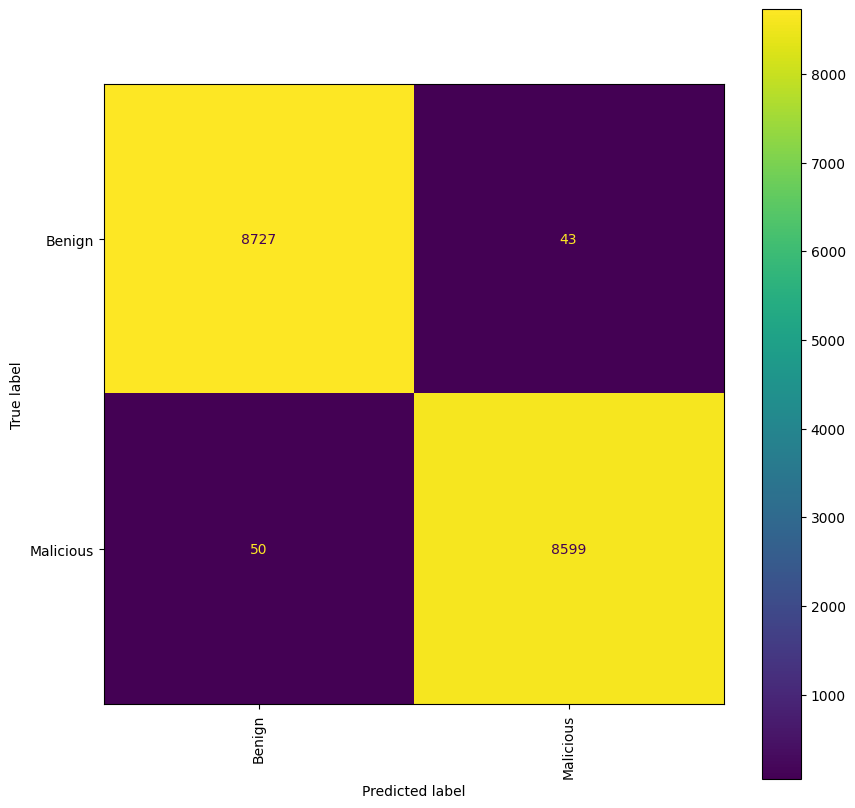

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(scaled_X_train, y_train)

# Evaluate model on the test set
lr_y_pred = lr_model.predict(scaled_X_test)

lr_test_result = evaluate_model(y_test, lr_y_pred)
print(lr_test_result)
print(classification_report(y_test, lr_y_pred))
plot_confusion_matrix(y_test, lr_y_pred, label)

__Training a Random Forest Model__

{'accuracy_score': 1.0, 'precision_score': 1.0, 'recall_score': 1.0, 'f1_score': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8770
           1       1.00      1.00      1.00      8649

    accuracy                           1.00     17419
   macro avg       1.00      1.00      1.00     17419
weighted avg       1.00      1.00      1.00     17419



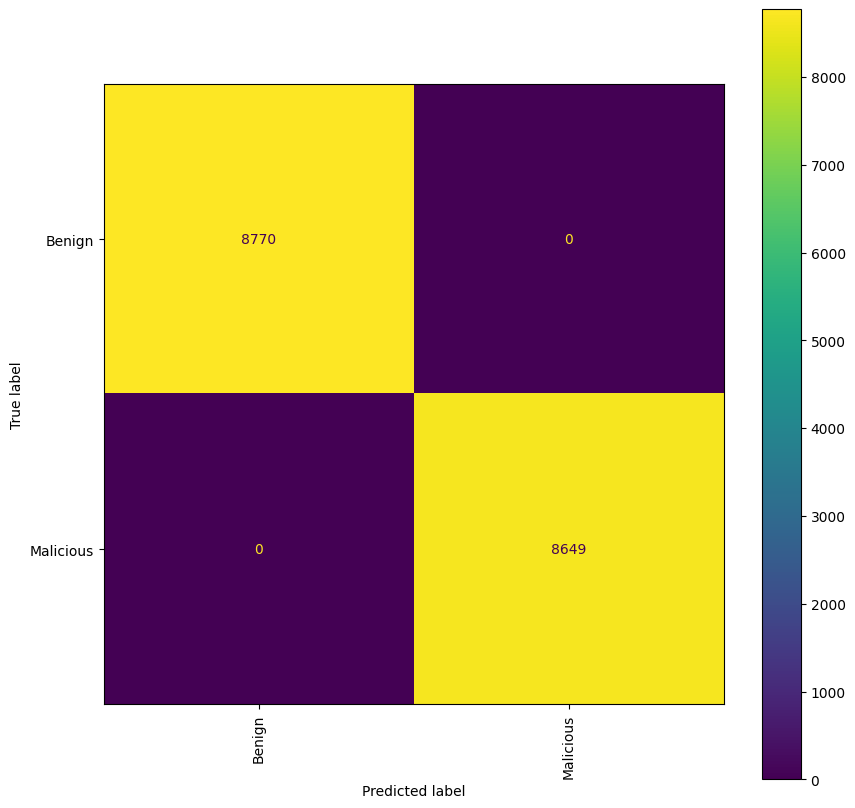

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=SEED)
rf_model.fit(scaled_X_train, y_train)

# Evaluate model on the test set
rf_y_pred = rf_model.predict(scaled_X_test)

rf_test_result = evaluate_model(y_test, rf_y_pred)
print(rf_test_result)
print(classification_report(y_test, rf_y_pred))
plot_confusion_matrix(y_test, rf_y_pred, label)

This model is overfitting. I will fine-tune the model using GridSearchCV to select the best hyperparameters for the random forest model.

Best accuracy score 99.99 %
Best Parameters: {'criterion': 'gini', 'n_estimators': 100}
{'accuracy_score': 1.0, 'precision_score': 1.0, 'recall_score': 1.0, 'f1_score': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8770
           1       1.00      1.00      1.00      8649

    accuracy                           1.00     17419
   macro avg       1.00      1.00      1.00     17419
weighted avg       1.00      1.00      1.00     17419



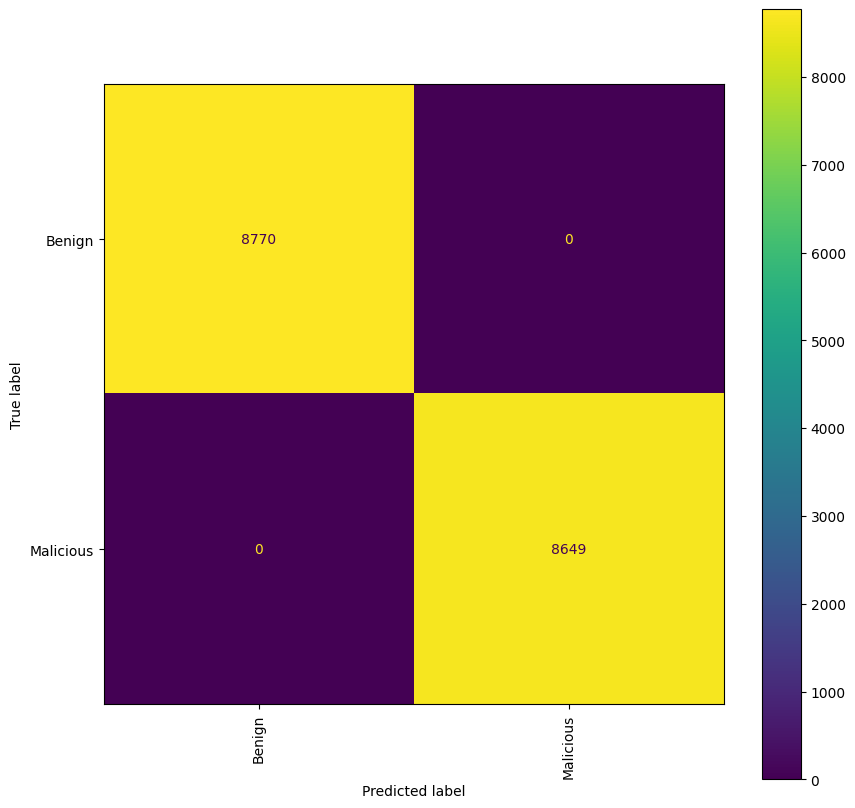

In [ ]:
# Fine-Tune the Model
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestClassifier(random_state=SEED)

# setting different parameter combinations
parameters = [{'criterion': ['gini', 'entropy'],
               'n_estimators': np.arange(100,300,100)}
              ]
# n_jobs=-1 uses all the system's processors             
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(scaled_X_train, y_train)

# get the best accuracy score
best_acc = grid_search.best_score_

# get the parameters that gave the best score
best_parameters = grid_search.best_params_
rf_score = best_acc * 100
print("Best accuracy score {:.2f} %".format(rf_score))
print("Best Parameters:", best_parameters)
# extract the best random forest model
best_rf_model = grid_search.best_estimator_

# Evaluate model on the test set
rf_y_pred = best_rf_model.predict(scaled_X_test)

rf_test_result = evaluate_model(y_test, rf_y_pred)
print(rf_test_result)
print(classification_report(y_test, rf_y_pred))
plot_confusion_matrix(y_test, rf_y_pred, label)

__Display the Top 10 Important Features__

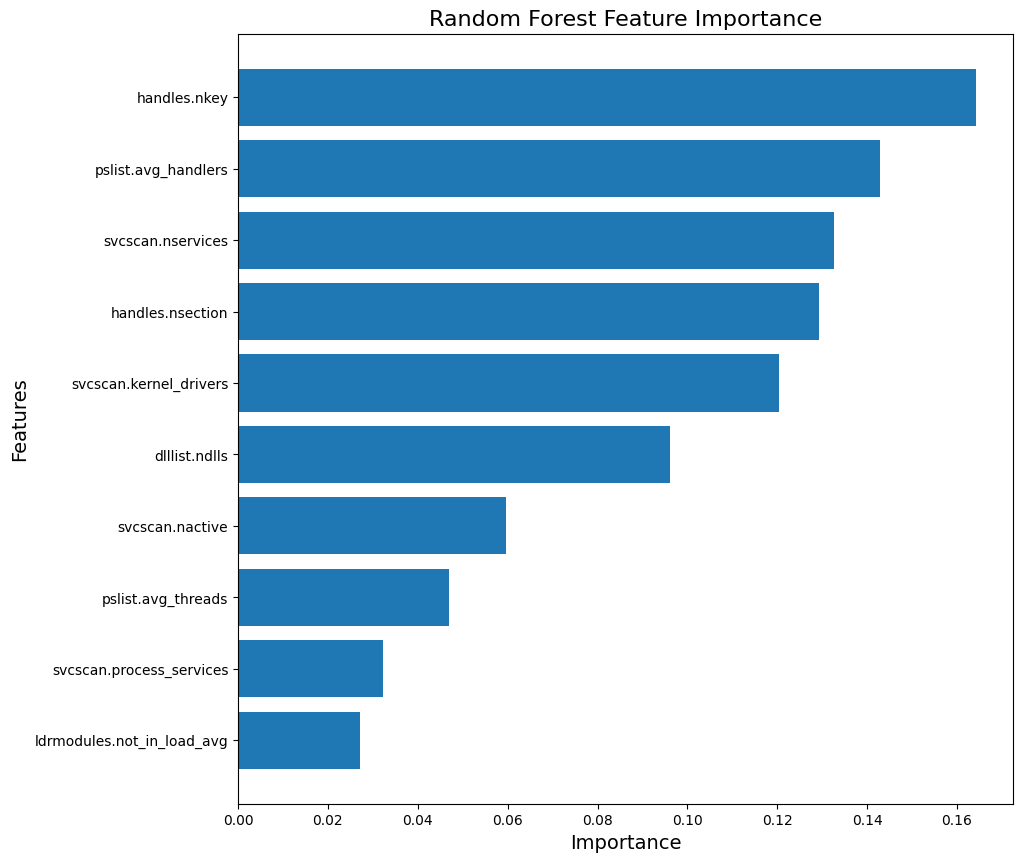

In [ ]:
# sort the most important feature based on index
sorted_idx = best_rf_model.feature_importances_.argsort()

fig = plt.figure(figsize=(10, 10))
plt.barh(X_train.columns[sorted_idx][-10:], best_rf_model.feature_importances_[sorted_idx][-10:])
plt.title("Random Forest Feature Importance", fontsize=16)
plt.ylabel("Features", fontsize=14)
plt.xlabel('Importance', fontsize=14);

In [ ]:
top_features = list(X_train.columns[sorted_idx][-10:])
top_features.reverse()
print(top_features)

['handles.nkey', 'pslist.avg_handlers', 'svcscan.nservices', 'handles.nsection', 'svcscan.kernel_drivers', 'dlllist.ndlls', 'svcscan.nactive', 'pslist.avg_threads', 'svcscan.process_services', 'ldrmodules.not_in_load_avg']


__Visualize the Results__

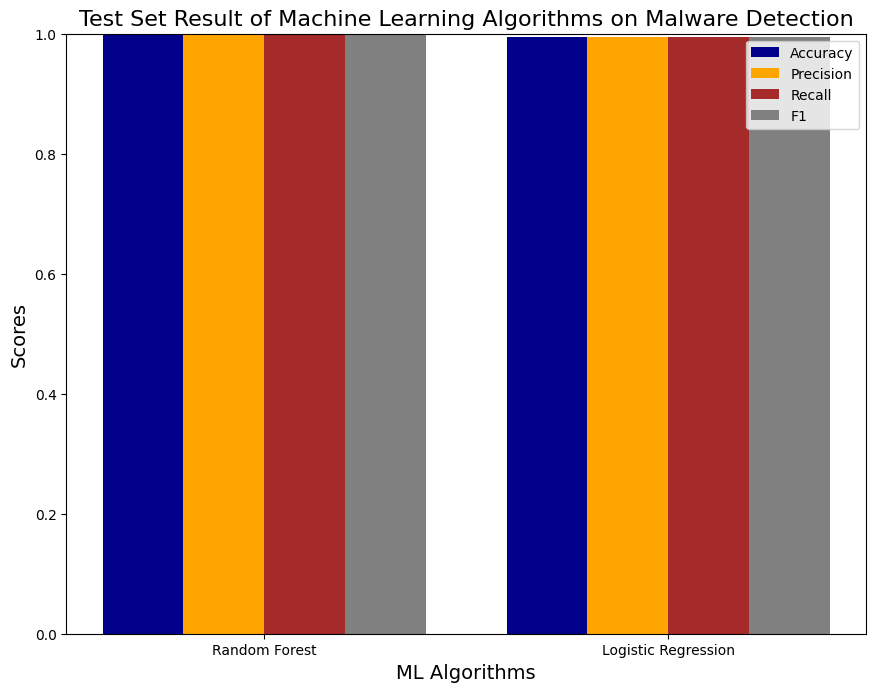

In [ ]:
# Create list for accuracy, precision, recall and f1-score of each ml algorithm
accuracy_scores = [rf_test_result['accuracy_score'],
                   lr_test_result['accuracy_score']
                   ]

precision_scores = [rf_test_result['precision_score'],
                    lr_test_result['precision_score']]

recall_scores = [rf_test_result['recall_score'],
                 lr_test_result['recall_score']]

f1_scores = [rf_test_result['f1_score'],
             lr_test_result['f1_score']]

models = ["Random Forest", "Logistic Regression"]

# 3 is the number of models used
X = np.arange(2)
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, accuracy_scores, color = 'darkblue', width = 0.2)
ax.bar(X + 0.20, precision_scores, color = 'orange', width = 0.2)
ax.bar(X + 0.40, recall_scores, color = 'brown', width = 0.2)
ax.bar(X + 0.60, f1_scores, color = 'gray', width = 0.2)
plt.xticks(X+0.30, models)
plt.ylim(0, 1)
plt.xlabel("ML Algorithms", fontsize=14)
plt.ylabel("Scores", fontsize=14)
plt.title('Test Set Result of Machine Learning Algorithms on Malware Detection', fontsize=16)
plt.legend(["Accuracy", "Precision", "Recall", "F1"]);